##  SWARM Thermosphere Neutral density, Ten Yeas (2014-2023)

#### Downloading the SWARM satellite SAT_C data and analyse the ten year data. Comparing this SWARM observations with the NRLMSIS model. For this  combine 2014 - 2023 original swarm data and apex cdf files. Then calculate MSIS model density and Normalized density at altitude 453.46km

## Data Source

ftp_url = swarm-diss.eo.esa.int

#### Installing the required packages 

In [5]:
import subprocess
import sys

def install_package(package_name):
    try:
        # Check if the package is installed
        subprocess.check_output([sys.executable, '-m', 'pip', 'show', package_name])

    except subprocess.CalledProcessError:
        # If the package is not installed, install it
        subprocess.call([sys.executable, '-m', 'pip', 'install','--user', package_name])

install_package('spacepy')
install_package('pandas')
install_package('numpy==1.26.0')
install_package('matplotlib')
install_package('basemap')
install_package('requests')
install_package('cartopy')
install_package('pymsis')
install_package('spacepy')
install_package('pickle')
install_package('seaborn')
install_package('xarray')
install_package('cdflib')
install_package('apexpy')
install_package('netcdf4')


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


  Using cached apexpy-2.0.1.tar.gz (328 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      + meson setup /tmp/pip-install-r7r3sxvh/apexpy_b72cac93752c46f4a018d81cdebf5e6d /tmp/pip-install-r7r3sxvh/apexpy_b72cac93752c46f4a018d81cdebf5e6d/.mesonpy-50u758uf -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=/tmp/pip-install-r7r3sxvh/apexpy_b72cac93752c46f4a018d81cdebf5e6d/.mesonpy-50u758uf/meson-python-native-file.ini
      The Meson build system
      Version: 1.6.0
      Source dir: /tmp/pip-install-r7r3sxvh/apexpy_b72cac93752c46f4a018d81cdebf5e6d
      Build dir: /tmp/pip-install-r7r3sxvh/apexpy_b72cac93752c46f4a018d81cdebf5e6d/.mesonpy-50u758uf
      Build type: native build
      Project name: apexpy
      Project version: 2.0.1
      
      ../meson.build:1:0: ERROR: Unknown compiler(s): [['cc'], ['gcc'], ['clang'], ['nvc'], ['pgcc'], ['icc'], ['icx']]
      The following exception(s) were encountere

#### External Libraries Import

In [7]:
import os
os.environ["CDF_LIB"] = "C:/Users/jose_ne/Downloads/cdf3.8.0_64bit_VS2015/lib"
from spacepy import pycdf
import pandas as pd
from pymsis import msis
import numpy as np
import spacepy.pycdf as pycdf
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import griddata
from datetime import datetime
import pickle
import seaborn as sns
import xarray as xr
import os.path
from datetime import datetime, timedelta
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
#import apexpy

In [11]:
pip install numpy==1.26.0

Error processing line 2 of /opt/conda/lib/python3.11/site-packages/basemap_data-1.3.2-py2.7-nspkg.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 195, in addpackage
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 570, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 3.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'RECORD'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install --no-binary :apexpy: apexpy

Error processing line 2 of /opt/conda/lib/python3.11/site-packages/basemap_data-1.3.2-py2.7-nspkg.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 195, in addpackage
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 570, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
  Using cached apexpy-2.0.1.tar.gz (328 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [67 lines of output]
      Error processing line 2 of /opt/conda/lib/python3.11/site-packages/basemap_data-1.3.2-py2.7-nspkg.pth:
      
        Traceback (most recent call last):
          File "<frozen site>", line 195, in addpackage
          File "<s

### Functions to read SWARM observation files and apex CDF files from their respective folders, and merge them by date.

In [ ]:
def combine_cdf_files_for_each_year(base_folder_path, start_year, end_year):
    combined_dfs = {}
    
    all_files = os.listdir(base_folder_path)

    # Filter files based on the naming convention and the specified year range
    for year in range(start_year, end_year + 1):
        cdf_files = [
            file for file in all_files
            if file.startswith(f'SW_OPER_DNSCACC_2__{year}') and file.endswith('.cdf')
        ]
        

        combined_df = pd.DataFrame()

        for cdf_filename in cdf_files:
            cdf_file_path = os.path.join(base_folder_path, cdf_filename)
            cdf_file = pycdf.CDF(cdf_file_path)
            
            data_dict = {
                'time': cdf_file['time'][:], 
                'density': cdf_file['density'][:], 
                'altitude': cdf_file['altitude'][:], 
                'latitude': cdf_file['latitude'][:], 
                'longitude': cdf_file['longitude'][:], 
                'local_solar_time': cdf_file['local_solar_time'][:]
            }
            
            df = pd.DataFrame(data_dict)
            combined_df = pd.concat([combined_df, df], ignore_index=True)

        combined_dfs[year] = combined_df

    return combined_dfs

def combine_apex_cdf_files_for_each_year(apex_base_directory, start_year, end_year):
    combined_dfs = {}
    
    for year in range(start_year, end_year + 1):
        apex_cdf_files = []
        year_pattern = f"SW_OPER_DNSCACC_2__{year}"
        for filename in os.listdir(apex_base_directory):
            if filename.startswith(year_pattern) and filename.endswith("_apex.cdf"):
                file_path = os.path.join(apex_base_directory, filename)
                cdf_data = pycdf.CDF(file_path)
                data = {key: cdf_data[key][...] for key in cdf_data.keys()}
                df = pd.DataFrame(data)
                apex_cdf_files.append(df)
                cdf_data.close()

        if apex_cdf_files:
            combined_df = pd.concat(apex_cdf_files, ignore_index=True)
            combined_dfs[year] = combined_df
        else:
            print(f"No APEX CDF files found for year {year}")

    return combined_dfs

def merge_combined_dfs(combined_df_dict, combined_apex_df_dict, start_year, end_year):
    merged_dfs = {}

    for year in range(start_year, end_year + 1):
        combined_df = combined_df_dict.get(year)
        combined_apex_df = combined_apex_df_dict.get(year)

        if combined_df is not None and combined_apex_df is not None:
            merged_df = pd.merge(combined_df, combined_apex_df, on='time', how='inner')
            merged_dfs[year] = merged_df
        else:
            print(f"DataFrame for year {year} is missing in one of the datasets.")

    return merged_dfs

# Example usage:
base_folder_path = '/mnt/sofs01/workcache/SO-MirroredData/SWARM-DISS/DNS/ACC/SAT_C_0201'
apex_base_directory = '/mnt/sofs01/workcache/SO-Shared/SWARM-DISS/DNS/ACC/SAT_C'
start_year = 2014
end_year = 2023

combined_df_dict = combine_cdf_files_for_each_year(base_folder_path, start_year, end_year)
combined_apex_df_dict = combine_apex_cdf_files_for_each_year(apex_base_directory, start_year, end_year)
merged_dfs = merge_combined_dfs(combined_df_dict, combined_apex_df_dict, start_year, end_year)

merged_df_2014 = merged_dfs.get(2014)
print(merged_df_2014)



#### Function to write the merged data into a folder

In [18]:


def save_merged_dfs_as_pickle(merged_dfs,output_file_path):
    os.makedirs(os.path.dirname(output_file_path), exist_ok=True)
    with open(output_file_path, 'wb') as file:
        pickle.dump(merged_dfs, file)

output_file_path = '/mnt/sofs01/workcache/SO-MirroredData/SWARM-DISS/DNS/ACC/merged_dfs.pkl'
save_merged_dfs_as_pickle(merged_dfs, output_file_path)


#### Functions to load the pickle file and Extract data for specific dates

In [7]:
def load_pickle_file(pickle_file_path):
    with open(pickle_file_path, 'rb') as file:
        data = pickle.load(file)
    return data

def extract_data_for_dates(data, dates):
    extracted_data = pd.DataFrame()
    for date in dates:
        year = date.year
        if year in data:
            df = data[year]
            day_data = df[df['time'].dt.date == date]
            extracted_data = pd.concat([extracted_data, day_data], ignore_index=True)
    return extracted_data

pickle_file_path = '/mnt/sofs01/workcache/SO-MirroredData/SWARM-DISS/DNS/ACC/merged_dfs.pkl'
data = load_pickle_file(pickle_file_path)

dates_to_extract = [datetime(2015, 3, 16).date(), datetime(2015, 3, 17).date(), datetime(2015, 3, 18).date()]
extracted_16_17_18_data = extract_data_for_dates(data, dates_to_extract)

print(extracted_16_17_18_data)

                     time       density       altitude   latitude   longitude  \
0     2015-03-16 00:00:00  7.157833e-13  476646.137631 -52.951450  121.485499   
1     2015-03-16 00:00:10  7.090025e-13  476899.649754 -53.587040  121.525684   
2     2015-03-16 00:00:20  7.043682e-13  477150.932780 -54.222473  121.568359   
3     2015-03-16 00:00:30  6.961349e-13  477399.884165 -54.857748  121.613662   
4     2015-03-16 00:00:40  6.912562e-13  477646.401967 -55.492861  121.661740   
...                   ...           ...            ...        ...         ...   
25915 2015-03-18 23:59:10  1.053335e-12  483971.734480 -78.353662  127.073747   
25916 2015-03-18 23:59:20  1.017838e-12  484068.527253 -78.970582  127.788257   
25917 2015-03-18 23:59:30  9.659704e-13  484160.077576 -79.585372  128.591003   
25918 2015-03-18 23:59:40  9.419896e-13  484246.348855 -80.197642  129.498194   
25919 2015-03-18 23:59:50  9.404269e-13  484327.302935 -80.806896  130.530131   

       local_solar_time   a

#### Function to write the extracted 3 days data into a folder

In [11]:
def save_extracted_stormdays_as_pickle(extracted_16_17_18_data,output_file_path):
    os.makedirs(os.path.dirname(output_file_path), exist_ok=True)
    with open(output_file_path, 'wb') as file:
        pickle.dump(extracted_16_17_18_data, file)

output_file_path = '/mnt/sofs01/workcache/SO-MirroredData/SWARM-DISS/DNS/ACC/extracted_stormdays.pkl'
save_extracted_stormdays_as_pickle(extracted_16_17_18_data, output_file_path)


#### Function to load the storm days pickle file

In [13]:
def load_pickle_file(pickle_file_path):
    with open(pickle_file_path, 'rb') as file:
        data = pickle.load(file)
    return data

pickle_file_path= '/mnt/sofs01/workcache/SO-MirroredData/SWARM-DISS/DNS/ACC/extracted_stormdays.pkl'
#loaded_data= load_pickle_file(pickle_file_path)
#print(loaded_data)

In [5]:
pip install h5netcdf

Error processing line 2 of /opt/conda/lib/python3.11/site-packages/basemap_data-1.3.2-py2.7-nspkg.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 195, in addpackage
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 570, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import sys
import datetime
import xarray
import cdflib.xarray
import matplotlib.pyplot as plt
import numpy
import os

sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
import readESASwarm
sys.path.append('/home/jose_ne/Documents/swe_data_processing_routines')
import processESASwarm

tstart=datetime.datetime(2023,1,1,0,0,0)
tend=datetime.datetime(2023,12,31,23,59,59)
sat='SAT_C'
instr='ACC'
hgt=453
mag_model='qd'

dlat=2.5
dslt=2 # hours
fs=int(24*60/90) # 90 minutes sampling

if not os.path.isdir(os.path.join('data',sat)):
    os.mkdir(os.path.join('data',sat))
fp_out=os.path.join('data',sat,'hgt'+str(hgt)+'km')
if not os.path.isdir(fp_out):
    os.mkdir(fp_out)
    
for dx in range((tend-tstart).days+1):
    day=tstart+datetime.timedelta(days=dx)
    #print(day,day.strftime('%Y-%m-%d'))
    fn_out=os.path.join(fp_out,sat+'_'+instr+'_GridData_'+day.strftime('%Y-%m-%d')+'_'+mag_model+'.nc')
    processESASwarm.calculateNormalisedDNS(tstart+datetime.timedelta(days=dx),sat,instr,hgt) 
    xr_dns=readESASwarm.readDNS(day,datetime.datetime(day.year,day.month,day.day,23,59,59),sat,instr,download_missing_data=False)
    xr_mcoord=readESASwarm.readDNS_magCoord(day,datetime.datetime(day.year,day.month,day.day,23,59,59),sat,instr,mag_model=mag_model)
    xr_norm=readESASwarm.readDNS_normalized(day,datetime.datetime(day.year,day.month,day.day,23,59,59),sat,instr,norm_alt=hgt)
    #ds=xarray.merge([xr_dns,xr_mcoord,xr_norm])
    
    ut_out=[numpy.datetime64(day+datetime.timedelta(minutes=int(dt*24*60/fs)),'ns') for dt in range(fs)]
    slt=list(range(0,24,dslt))
    mlat=[x/10 for x in range(-900,901,int(dlat*10))]
    t2,mlat2 = numpy.meshgrid(ut_out,mlat)
    da_obs_sum=xarray.DataArray(numpy.full((len(ut_out),len(mlat),len(slt)),0.),coords={'time':('time',ut_out),mag_model+'_latitude':(mag_model+'_latitude',mlat),'solar_local_time':('solar_local_time',slt)})
    da_model_sum=xarray.DataArray(numpy.full((len(ut_out),len(mlat),len(slt)),0.),coords={'time':('time',ut_out),mag_model+'_latitude':(mag_model+'_latitude',mlat),'solar_local_time':('solar_local_time',slt)})
    da_weight=xarray.DataArray(numpy.full((len(ut_out),len(mlat),len(slt)),0.),coords={'time':('time',ut_out),mag_model+'_latitude':(mag_model+'_latitude',mlat),'solar_local_time':('solar_local_time',slt)})

    if len(list(xr_norm.keys()))>0:
        d_obs=xr_norm['density_hgt'+str(hgt)+'km'].values
        d_model=xr_norm['msis_density_hgt'+str(hgt)+'km'].values
        #print(xr_mcoord)
        mlat=xr_mcoord[mag_model+'_latitude'].values
        slt=xr_dns.local_solar_time.values
        t=xr_norm.time.values
        for x in range(len(d_obs)):
            grid_mlat=numpy.round(mlat[x]/dlat)*dlat
            grid_slt=int(numpy.floor(slt[x]/dslt)*dslt)
            dt=numpy.floor((t[x]-ut_out[0]).astype('timedelta64[ns]')/numpy.timedelta64(1,'ns')*10**-9/(24*60*60)*fs)/fs # [days]
            grid_t=ut_out[0]+numpy.timedelta64(int(dt*24*60),'m').astype('timedelta64[ns]')
            da_obs_sum.loc[grid_t,grid_mlat,grid_slt]+=d_obs[x]
            da_model_sum.loc[grid_t,grid_mlat,grid_slt]+=d_model[x]
            da_weight.loc[grid_t,grid_mlat,grid_slt]+=1
    
        # compute mean density and hand over attributes for observations
        da_obs_mean_density=(da_obs_sum/da_weight).assign_attrs(xr_norm['density_hgt'+str(hgt)+'km'].attrs)
        # compute mean density and hand over attributes for observations
        da_model_mean_density=(da_model_sum/da_weight).assign_attrs(xr_norm['msis_density_hgt'+str(hgt)+'km'].attrs)
        # create dataset
        ds_out=xarray.Dataset({})
        ds_out['density_hgt'+str(hgt)+'km']=da_obs_mean_density
        ds_out['msis_density_hgt'+str(hgt)+'km']=da_model_mean_density
        # assign attributes of coordinates
        ds_out[mag_model+'_latitude'].attrs=xr_mcoord[mag_model+'_latitude'].attrs
        ds_out['solar_local_time'].attrs=xr_dns.local_solar_time.attrs
        # write into netcdf file
        ds_out.to_netcdf(fn_out)


readESASwarm.readDNS read  2023-01-01 00:00:00
2023-01-01 density normalisation complete
readESASwarm.readDNS read  2023-01-01 00:00:00
readESASwarm.readDNS read  2023-01-02 00:00:00
2023-01-02 density normalisation complete
readESASwarm.readDNS read  2023-01-02 00:00:00
readESASwarm.readDNS read  2023-01-03 00:00:00
2023-01-03 density normalisation complete
readESASwarm.readDNS read  2023-01-03 00:00:00
readESASwarm.readDNS read  2023-01-04 00:00:00
2023-01-04 density normalisation complete
readESASwarm.readDNS read  2023-01-04 00:00:00
readESASwarm.readDNS read  2023-01-05 00:00:00
2023-01-05 density normalisation complete
readESASwarm.readDNS read  2023-01-05 00:00:00
readESASwarm.readDNS read  2023-01-06 00:00:00
2023-01-06 density normalisation complete
readESASwarm.readDNS read  2023-01-06 00:00:00
readESASwarm.readDNS read  2023-01-07 00:00:00
2023-01-07 density normalisation complete
readESASwarm.readDNS read  2023-01-07 00:00:00
readESASwarm.readDNS read  2023-01-08 00:00:00
2

In [19]:
 import sys
import datetime
import xarray
import cdflib.xarray
import matplotlib.pyplot as plt
import numpy
import os

sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
import readESASwarm
sys.path.append('/home/jose_ne/Documents/swe_data_processing_routines')
import processESASwarm

tstart = datetime.datetime(2018, 1, 1, 0, 0, 0)
tend = datetime.datetime(2018, 12, 31, 23, 59, 59)
sat = 'SAT_C'
instr = 'ACC'
mag_model = 'qd'

dlat = 2.5
dslt = 2  # hours
fs = int(24 * 60 / 90)  # 90 minutes sampling

if not os.path.isdir(os.path.join('data', sat)):
    os.mkdir(os.path.join('data', sat))
fp_out = os.path.join('data', sat, 'AltitudeGridData')
if not os.path.isdir(fp_out):
    os.mkdir(fp_out)

# Define a range of altitudes for the altitude dimension
altitude_levels = numpy.arange(420, 550, 10)  # Define as needed, e.g., from 200 km to 550 km in steps of 50 km

for dx in range((tend - tstart).days + 1):
    day = tstart + datetime.timedelta(days=dx)
    fn_out = os.path.join(fp_out, f"{sat}_{instr}_GridData_{day.strftime('%Y-%m-%d')}_{mag_model}_Altitude.nc")
    
    # Calculate normalized DNS
    processESASwarm.calculateNormalisedDNS(tstart+datetime.timedelta(days=dx),sat,instr,hgt)
    
    # Read DNS data
    xr_dns = readESASwarm.readDNS(day, datetime.datetime(day.year, day.month, day.day, 23, 59, 59), sat, instr, download_missing_data=False)
    xr_mcoord = readESASwarm.readDNS_magCoord(day, datetime.datetime(day.year, day.month, day.day, 23, 59, 59), sat, instr, mag_model=mag_model)
    xr_norm=readESASwarm.readDNS_normalized(day,datetime.datetime(day.year,day.month,day.day,23,59,59),sat,instr,norm_alt=hgt)

    ut_out=[numpy.datetime64(day+datetime.timedelta(minutes=int(dt*24*60/fs)),'ns') for dt in range(fs)]
    slt=list(range(0,24,dslt))
    mlat=[x/10 for x in range(-900,901,int(dlat*10))]
    
    
    # Create time, latitude, solar local time, and altitude grid
    ut_out = [numpy.datetime64(day + datetime.timedelta(minutes=int(dt * 24 * 60 / fs)), 'ns') for dt in range(fs)]
    slt = list(range(0, 24, dslt))
    mlat = [x / 10 for x in range(-900, 901, int(dlat * 10))]
    t2,mlat2 = numpy.meshgrid(ut_out,mlat)
    da_obs_sum = xarray.DataArray(numpy.full((len(ut_out), len(mlat), len(slt), len(altitude_levels)), 0.0),
                                  coords={'time': ('time', ut_out), 
                                          mag_model + '_latitude': (mag_model + '_latitude', mlat),
                                          'solar_local_time': ('solar_local_time', slt),
                                          'altitude': ('altitude', altitude_levels)})
    da_model_sum=xarray.DataArray(numpy.full((len(ut_out), len(mlat), len(slt), len(altitude_levels)), 0.0),
                                  coords={'time': ('time', ut_out), 
                                          mag_model + '_latitude': (mag_model + '_latitude', mlat),
                                          'solar_local_time': ('solar_local_time', slt),
                                          'altitude': ('altitude', altitude_levels)})
    da_weight=xarray.DataArray(numpy.full((len(ut_out), len(mlat), len(slt), len(altitude_levels)), 0.0),
                                  coords={'time': ('time', ut_out), 
                                          mag_model + '_latitude': (mag_model + '_latitude', mlat),
                                          'solar_local_time': ('solar_local_time', slt),
                                          'altitude': ('altitude', altitude_levels)})

    # Process each data point
    if len(list(xr_norm.keys())) > 0:
        d_obs = xr_norm['density_hgt453km'].values  # Density values
        d_model = xr_norm['msis_density_hgt453km'].values  # Model density values
        mlat = xr_mcoord[mag_model + '_latitude'].values
        slt = xr_dns.local_solar_time.values
        altitudes = xr_dns['altitude'].values  # Altitude values from dataset
        t = xr_norm.time.values

        for x in range(len(d_obs)):
            grid_mlat = numpy.round(mlat[x] / dlat) * dlat
            grid_slt = int(numpy.floor(slt[x] / dslt) * dslt)
            grid_alt = altitude_levels[numpy.abs(altitude_levels - altitudes[x]).argmin()]  # Closest altitude level
            dt = numpy.floor((t[x] - ut_out[0]).astype('timedelta64[ns]') / numpy.timedelta64(1, 'ns') * 10**-9 / (24 * 60 * 60) * fs) / fs
            grid_t = ut_out[0] + numpy.timedelta64(int(dt * 24 * 60), 'm').astype('timedelta64[ns]')
            
            # Sum values for averaging
            da_obs_sum.loc[grid_t, grid_mlat, grid_slt, grid_alt] += d_obs[x]
            da_model_sum.loc[grid_t, grid_mlat, grid_slt, grid_alt] += d_model[x]
            da_weight.loc[grid_t, grid_mlat, grid_slt, grid_alt] += 1

        # Calculate mean density by dividing summed values by weight
        da_obs_mean_density = (da_obs_sum / da_weight).assign_attrs(xr_norm['density_hgt453km'].attrs)
        da_model_mean_density = (da_model_sum / da_weight).assign_attrs(xr_norm['msis_density_hgt453km'].attrs)
        
        # Create dataset and add computed mean densities
        ds_out = xarray.Dataset({})
        ds_out['density'] = da_obs_mean_density
        ds_out['msis_density'] = da_model_mean_density

        # Assign attributes to the coordinates
        ds_out[mag_model + '_latitude'].attrs = xr_mcoord[mag_model + '_latitude'].attrs
        ds_out['solar_local_time'].attrs = xr_dns.local_solar_time.attrs
        ds_out['altitude'].attrs = {'units': 'km', 'description': 'Altitude levels in km'}

        # Write to NetCDF file
        ds_out.to_netcdf(fn_out) 

readESASwarm.readDNS read  2018-01-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-01 density normalisation complete
readESASwarm.readDNS read  2018-01-01 00:00:00
readESASwarm.readDNS read  2018-01-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-02 density normalisation complete
readESASwarm.readDNS read  2018-01-02 00:00:00
readESASwarm.readDNS read  2018-01-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-03 density normalisation complete
readESASwarm.readDNS read  2018-01-03 00:00:00
readESASwarm.readDNS read  2018-01-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-04 density normalisation complete
readESASwarm.readDNS read  2018-01-04 00:00:00
readESASwarm.readDNS read  2018-01-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-05 density normalisation complete
readESASwarm.readDNS read  2018-01-05 00:00:00
readESASwarm.readDNS read  2018-01-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-06 density normalisation complete
readESASwarm.readDNS read  2018-01-06 00:00:00
readESASwarm.readDNS read  2018-01-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-07 density normalisation complete
readESASwarm.readDNS read  2018-01-07 00:00:00
readESASwarm.readDNS read  2018-01-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-08 density normalisation complete
readESASwarm.readDNS read  2018-01-08 00:00:00
readESASwarm.readDNS read  2018-01-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-09 density normalisation complete
readESASwarm.readDNS read  2018-01-09 00:00:00
readESASwarm.readDNS read  2018-01-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-10 density normalisation complete
readESASwarm.readDNS read  2018-01-10 00:00:00
readESASwarm.readDNS read  2018-01-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-11 density normalisation complete
readESASwarm.readDNS read  2018-01-11 00:00:00
readESASwarm.readDNS read  2018-01-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-12 density normalisation complete
readESASwarm.readDNS read  2018-01-12 00:00:00
readESASwarm.readDNS read  2018-01-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-13 density normalisation complete
readESASwarm.readDNS read  2018-01-13 00:00:00
readESASwarm.readDNS read  2018-01-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-14 density normalisation complete
readESASwarm.readDNS read  2018-01-14 00:00:00
readESASwarm.readDNS read  2018-01-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-15 density normalisation complete
readESASwarm.readDNS read  2018-01-15 00:00:00
readESASwarm.readDNS read  2018-01-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-16 density normalisation complete
readESASwarm.readDNS read  2018-01-16 00:00:00
readESASwarm.readDNS read  2018-01-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-17 density normalisation complete
readESASwarm.readDNS read  2018-01-17 00:00:00
readESASwarm.readDNS read  2018-01-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-18 density normalisation complete
readESASwarm.readDNS read  2018-01-18 00:00:00
readESASwarm.readDNS read  2018-01-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-19 density normalisation complete
readESASwarm.readDNS read  2018-01-19 00:00:00
readESASwarm.readDNS read  2018-01-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-20 density normalisation complete
readESASwarm.readDNS read  2018-01-20 00:00:00
readESASwarm.readDNS read  2018-01-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-21 density normalisation complete
readESASwarm.readDNS read  2018-01-21 00:00:00
readESASwarm.readDNS read  2018-01-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-22 density normalisation complete
readESASwarm.readDNS read  2018-01-22 00:00:00
readESASwarm.readDNS read  2018-01-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-23 density normalisation complete
readESASwarm.readDNS read  2018-01-23 00:00:00
readESASwarm.readDNS read  2018-01-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-24 density normalisation complete
readESASwarm.readDNS read  2018-01-24 00:00:00
readESASwarm.readDNS read  2018-01-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-25 density normalisation complete
readESASwarm.readDNS read  2018-01-25 00:00:00
readESASwarm.readDNS read  2018-01-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-26 density normalisation complete
readESASwarm.readDNS read  2018-01-26 00:00:00
readESASwarm.readDNS read  2018-01-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-27 density normalisation complete
readESASwarm.readDNS read  2018-01-27 00:00:00
readESASwarm.readDNS read  2018-01-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-28 density normalisation complete
readESASwarm.readDNS read  2018-01-28 00:00:00
readESASwarm.readDNS read  2018-01-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-29 density normalisation complete
readESASwarm.readDNS read  2018-01-29 00:00:00
readESASwarm.readDNS read  2018-01-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-30 density normalisation complete
readESASwarm.readDNS read  2018-01-30 00:00:00
readESASwarm.readDNS read  2018-01-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-01-31 density normalisation complete
readESASwarm.readDNS read  2018-01-31 00:00:00
readESASwarm.readDNS read  2018-02-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-01 density normalisation complete
readESASwarm.readDNS read  2018-02-01 00:00:00
readESASwarm.readDNS read  2018-02-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-02 density normalisation complete
readESASwarm.readDNS read  2018-02-02 00:00:00
readESASwarm.readDNS read  2018-02-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-03 density normalisation complete
readESASwarm.readDNS read  2018-02-03 00:00:00
readESASwarm.readDNS read  2018-02-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-04 density normalisation complete
readESASwarm.readDNS read  2018-02-04 00:00:00
readESASwarm.readDNS read  2018-02-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-05 density normalisation complete
readESASwarm.readDNS read  2018-02-05 00:00:00
readESASwarm.readDNS read  2018-02-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-06 density normalisation complete
readESASwarm.readDNS read  2018-02-06 00:00:00
readESASwarm.readDNS read  2018-02-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-07 density normalisation complete
readESASwarm.readDNS read  2018-02-07 00:00:00
readESASwarm.readDNS read  2018-02-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-08 density normalisation complete
readESASwarm.readDNS read  2018-02-08 00:00:00
readESASwarm.readDNS read  2018-02-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-09 density normalisation complete
readESASwarm.readDNS read  2018-02-09 00:00:00
readESASwarm.readDNS read  2018-02-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-10 density normalisation complete
readESASwarm.readDNS read  2018-02-10 00:00:00
readESASwarm.readDNS read  2018-02-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-11 density normalisation complete
readESASwarm.readDNS read  2018-02-11 00:00:00
readESASwarm.readDNS read  2018-02-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-12 density normalisation complete
readESASwarm.readDNS read  2018-02-12 00:00:00
readESASwarm.readDNS read  2018-02-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-13 density normalisation complete
readESASwarm.readDNS read  2018-02-13 00:00:00
readESASwarm.readDNS read  2018-02-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-14 density normalisation complete
readESASwarm.readDNS read  2018-02-14 00:00:00
readESASwarm.readDNS read  2018-02-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-15 density normalisation complete
readESASwarm.readDNS read  2018-02-15 00:00:00
readESASwarm.readDNS read  2018-02-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-16 density normalisation complete
readESASwarm.readDNS read  2018-02-16 00:00:00
readESASwarm.readDNS read  2018-02-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-17 density normalisation complete
readESASwarm.readDNS read  2018-02-17 00:00:00
readESASwarm.readDNS read  2018-02-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-18 density normalisation complete
readESASwarm.readDNS read  2018-02-18 00:00:00
readESASwarm.readDNS read  2018-02-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-19 density normalisation complete
readESASwarm.readDNS read  2018-02-19 00:00:00
readESASwarm.readDNS read  2018-02-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-20 density normalisation complete
readESASwarm.readDNS read  2018-02-20 00:00:00
readESASwarm.readDNS read  2018-02-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-21 density normalisation complete
readESASwarm.readDNS read  2018-02-21 00:00:00
readESASwarm.readDNS read  2018-02-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-22 density normalisation complete
readESASwarm.readDNS read  2018-02-22 00:00:00
readESASwarm.readDNS read  2018-02-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-23 density normalisation complete
readESASwarm.readDNS read  2018-02-23 00:00:00
readESASwarm.readDNS read  2018-02-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-24 density normalisation complete
readESASwarm.readDNS read  2018-02-24 00:00:00
readESASwarm.readDNS read  2018-02-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-25 density normalisation complete
readESASwarm.readDNS read  2018-02-25 00:00:00
readESASwarm.readDNS read  2018-02-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-26 density normalisation complete
readESASwarm.readDNS read  2018-02-26 00:00:00
readESASwarm.readDNS read  2018-02-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-27 density normalisation complete
readESASwarm.readDNS read  2018-02-27 00:00:00
readESASwarm.readDNS read  2018-02-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-02-28 density normalisation complete
readESASwarm.readDNS read  2018-02-28 00:00:00
readESASwarm.readDNS read  2018-03-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-01 density normalisation complete
readESASwarm.readDNS read  2018-03-01 00:00:00
readESASwarm.readDNS read  2018-03-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-02 density normalisation complete
readESASwarm.readDNS read  2018-03-02 00:00:00
readESASwarm.readDNS read  2018-03-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-03 density normalisation complete
readESASwarm.readDNS read  2018-03-03 00:00:00
readESASwarm.readDNS read  2018-03-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-04 density normalisation complete
readESASwarm.readDNS read  2018-03-04 00:00:00
readESASwarm.readDNS read  2018-03-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-05 density normalisation complete
readESASwarm.readDNS read  2018-03-05 00:00:00
readESASwarm.readDNS read  2018-03-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-06 density normalisation complete
readESASwarm.readDNS read  2018-03-06 00:00:00
readESASwarm.readDNS read  2018-03-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-07 density normalisation complete
readESASwarm.readDNS read  2018-03-07 00:00:00
readESASwarm.readDNS read  2018-03-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-08 density normalisation complete
readESASwarm.readDNS read  2018-03-08 00:00:00
readESASwarm.readDNS read  2018-03-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-09 density normalisation complete
readESASwarm.readDNS read  2018-03-09 00:00:00
readESASwarm.readDNS read  2018-03-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-10 density normalisation complete
readESASwarm.readDNS read  2018-03-10 00:00:00
readESASwarm.readDNS read  2018-03-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-11 density normalisation complete
readESASwarm.readDNS read  2018-03-11 00:00:00
readESASwarm.readDNS read  2018-03-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-12 density normalisation complete
readESASwarm.readDNS read  2018-03-12 00:00:00
readESASwarm.readDNS read  2018-03-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-13 density normalisation complete
readESASwarm.readDNS read  2018-03-13 00:00:00
readESASwarm.readDNS read  2018-03-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-14 density normalisation complete
readESASwarm.readDNS read  2018-03-14 00:00:00
readESASwarm.readDNS read  2018-03-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-15 density normalisation complete
readESASwarm.readDNS read  2018-03-15 00:00:00
readESASwarm.readDNS read  2018-03-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-16 density normalisation complete
readESASwarm.readDNS read  2018-03-16 00:00:00
readESASwarm.readDNS read  2018-03-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-17 density normalisation complete
readESASwarm.readDNS read  2018-03-17 00:00:00
readESASwarm.readDNS read  2018-03-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-18 density normalisation complete
readESASwarm.readDNS read  2018-03-18 00:00:00
readESASwarm.readDNS read  2018-03-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-19 density normalisation complete
readESASwarm.readDNS read  2018-03-19 00:00:00
readESASwarm.readDNS read  2018-03-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-20 density normalisation complete
readESASwarm.readDNS read  2018-03-20 00:00:00
readESASwarm.readDNS read  2018-03-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-21 density normalisation complete
readESASwarm.readDNS read  2018-03-21 00:00:00
readESASwarm.readDNS read  2018-03-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-22 density normalisation complete
readESASwarm.readDNS read  2018-03-22 00:00:00
readESASwarm.readDNS read  2018-03-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-23 density normalisation complete
readESASwarm.readDNS read  2018-03-23 00:00:00
readESASwarm.readDNS read  2018-03-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-24 density normalisation complete
readESASwarm.readDNS read  2018-03-24 00:00:00
readESASwarm.readDNS read  2018-03-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-25 density normalisation complete
readESASwarm.readDNS read  2018-03-25 00:00:00
readESASwarm.readDNS read  2018-03-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-26 density normalisation complete
readESASwarm.readDNS read  2018-03-26 00:00:00
readESASwarm.readDNS read  2018-03-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-27 density normalisation complete
readESASwarm.readDNS read  2018-03-27 00:00:00
readESASwarm.readDNS read  2018-03-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-28 density normalisation complete
readESASwarm.readDNS read  2018-03-28 00:00:00
readESASwarm.readDNS read  2018-03-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-29 density normalisation complete
readESASwarm.readDNS read  2018-03-29 00:00:00
readESASwarm.readDNS read  2018-03-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-30 density normalisation complete
readESASwarm.readDNS read  2018-03-30 00:00:00
readESASwarm.readDNS read  2018-03-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-03-31 density normalisation complete
readESASwarm.readDNS read  2018-03-31 00:00:00
readESASwarm.readDNS read  2018-04-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-01 density normalisation complete
readESASwarm.readDNS read  2018-04-01 00:00:00
readESASwarm.readDNS read  2018-04-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-02 density normalisation complete
readESASwarm.readDNS read  2018-04-02 00:00:00
readESASwarm.readDNS read  2018-04-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-03 density normalisation complete
readESASwarm.readDNS read  2018-04-03 00:00:00
readESASwarm.readDNS read  2018-04-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-04 density normalisation complete
readESASwarm.readDNS read  2018-04-04 00:00:00
readESASwarm.readDNS read  2018-04-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-05 density normalisation complete
readESASwarm.readDNS read  2018-04-05 00:00:00
readESASwarm.readDNS read  2018-04-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-06 density normalisation complete
readESASwarm.readDNS read  2018-04-06 00:00:00
readESASwarm.readDNS read  2018-04-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-07 density normalisation complete
readESASwarm.readDNS read  2018-04-07 00:00:00
readESASwarm.readDNS read  2018-04-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-08 density normalisation complete
readESASwarm.readDNS read  2018-04-08 00:00:00
readESASwarm.readDNS read  2018-04-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-09 density normalisation complete
readESASwarm.readDNS read  2018-04-09 00:00:00
readESASwarm.readDNS read  2018-04-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-10 density normalisation complete
readESASwarm.readDNS read  2018-04-10 00:00:00
readESASwarm.readDNS read  2018-04-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-11 density normalisation complete
readESASwarm.readDNS read  2018-04-11 00:00:00
readESASwarm.readDNS read  2018-04-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-12 density normalisation complete
readESASwarm.readDNS read  2018-04-12 00:00:00
readESASwarm.readDNS read  2018-04-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-13 density normalisation complete
readESASwarm.readDNS read  2018-04-13 00:00:00
readESASwarm.readDNS read  2018-04-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-14 density normalisation complete
readESASwarm.readDNS read  2018-04-14 00:00:00
readESASwarm.readDNS read  2018-04-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-15 density normalisation complete
readESASwarm.readDNS read  2018-04-15 00:00:00
readESASwarm.readDNS read  2018-04-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-16 density normalisation complete
readESASwarm.readDNS read  2018-04-16 00:00:00
readESASwarm.readDNS read  2018-04-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-17 density normalisation complete
readESASwarm.readDNS read  2018-04-17 00:00:00
readESASwarm.readDNS read  2018-04-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-18 density normalisation complete
readESASwarm.readDNS read  2018-04-18 00:00:00
readESASwarm.readDNS read  2018-04-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-19 density normalisation complete
readESASwarm.readDNS read  2018-04-19 00:00:00
readESASwarm.readDNS read  2018-04-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-20 density normalisation complete
readESASwarm.readDNS read  2018-04-20 00:00:00
readESASwarm.readDNS read  2018-04-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-21 density normalisation complete
readESASwarm.readDNS read  2018-04-21 00:00:00
readESASwarm.readDNS read  2018-04-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-22 density normalisation complete
readESASwarm.readDNS read  2018-04-22 00:00:00
readESASwarm.readDNS read  2018-04-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-23 density normalisation complete
readESASwarm.readDNS read  2018-04-23 00:00:00
readESASwarm.readDNS read  2018-04-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-24 density normalisation complete
readESASwarm.readDNS read  2018-04-24 00:00:00
readESASwarm.readDNS read  2018-04-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-25 density normalisation complete
readESASwarm.readDNS read  2018-04-25 00:00:00
readESASwarm.readDNS read  2018-04-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-26 density normalisation complete
readESASwarm.readDNS read  2018-04-26 00:00:00
readESASwarm.readDNS read  2018-04-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-27 density normalisation complete
readESASwarm.readDNS read  2018-04-27 00:00:00
readESASwarm.readDNS read  2018-04-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-28 density normalisation complete
readESASwarm.readDNS read  2018-04-28 00:00:00
readESASwarm.readDNS read  2018-04-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-29 density normalisation complete
readESASwarm.readDNS read  2018-04-29 00:00:00
readESASwarm.readDNS read  2018-04-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-04-30 density normalisation complete
readESASwarm.readDNS read  2018-04-30 00:00:00
readESASwarm.readDNS read  2018-05-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-01 density normalisation complete
readESASwarm.readDNS read  2018-05-01 00:00:00
readESASwarm.readDNS read  2018-05-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-02 density normalisation complete
readESASwarm.readDNS read  2018-05-02 00:00:00
readESASwarm.readDNS read  2018-05-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-03 density normalisation complete
readESASwarm.readDNS read  2018-05-03 00:00:00
readESASwarm.readDNS read  2018-05-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-04 density normalisation complete
readESASwarm.readDNS read  2018-05-04 00:00:00
readESASwarm.readDNS read  2018-05-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-05 density normalisation complete
readESASwarm.readDNS read  2018-05-05 00:00:00
readESASwarm.readDNS read  2018-05-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-06 density normalisation complete
readESASwarm.readDNS read  2018-05-06 00:00:00
readESASwarm.readDNS read  2018-05-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-07 density normalisation complete
readESASwarm.readDNS read  2018-05-07 00:00:00
readESASwarm.readDNS read  2018-05-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-08 density normalisation complete
readESASwarm.readDNS read  2018-05-08 00:00:00
readESASwarm.readDNS read  2018-05-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-09 density normalisation complete
readESASwarm.readDNS read  2018-05-09 00:00:00
readESASwarm.readDNS read  2018-05-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-10 density normalisation complete
readESASwarm.readDNS read  2018-05-10 00:00:00
readESASwarm.readDNS read  2018-05-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-11 density normalisation complete
readESASwarm.readDNS read  2018-05-11 00:00:00
readESASwarm.readDNS read  2018-05-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-12 density normalisation complete
readESASwarm.readDNS read  2018-05-12 00:00:00
readESASwarm.readDNS read  2018-05-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-13 density normalisation complete
readESASwarm.readDNS read  2018-05-13 00:00:00
readESASwarm.readDNS read  2018-05-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-14 density normalisation complete
readESASwarm.readDNS read  2018-05-14 00:00:00
readESASwarm.readDNS read  2018-05-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-15 density normalisation complete
readESASwarm.readDNS read  2018-05-15 00:00:00
readESASwarm.readDNS read  2018-05-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-16 density normalisation complete
readESASwarm.readDNS read  2018-05-16 00:00:00
readESASwarm.readDNS read  2018-05-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-17 density normalisation complete
readESASwarm.readDNS read  2018-05-17 00:00:00
readESASwarm.readDNS read  2018-05-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-18 density normalisation complete
readESASwarm.readDNS read  2018-05-18 00:00:00
readESASwarm.readDNS read  2018-05-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-19 density normalisation complete
readESASwarm.readDNS read  2018-05-19 00:00:00
readESASwarm.readDNS read  2018-05-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-20 density normalisation complete
readESASwarm.readDNS read  2018-05-20 00:00:00
readESASwarm.readDNS read  2018-05-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-21 density normalisation complete
readESASwarm.readDNS read  2018-05-21 00:00:00
readESASwarm.readDNS read  2018-05-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-22 density normalisation complete
readESASwarm.readDNS read  2018-05-22 00:00:00
readESASwarm.readDNS read  2018-05-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-23 density normalisation complete
readESASwarm.readDNS read  2018-05-23 00:00:00
readESASwarm.readDNS read  2018-05-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-24 density normalisation complete
readESASwarm.readDNS read  2018-05-24 00:00:00
readESASwarm.readDNS read  2018-05-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-25 density normalisation complete
readESASwarm.readDNS read  2018-05-25 00:00:00
readESASwarm.readDNS read  2018-05-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-26 density normalisation complete
readESASwarm.readDNS read  2018-05-26 00:00:00
readESASwarm.readDNS read  2018-05-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-27 density normalisation complete
readESASwarm.readDNS read  2018-05-27 00:00:00
readESASwarm.readDNS read  2018-05-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-28 density normalisation complete
readESASwarm.readDNS read  2018-05-28 00:00:00
readESASwarm.readDNS read  2018-05-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-29 density normalisation complete
readESASwarm.readDNS read  2018-05-29 00:00:00
readESASwarm.readDNS read  2018-05-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-30 density normalisation complete
readESASwarm.readDNS read  2018-05-30 00:00:00
readESASwarm.readDNS read  2018-05-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-05-31 density normalisation complete
readESASwarm.readDNS read  2018-05-31 00:00:00
readESASwarm.readDNS read  2018-06-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-01 density normalisation complete
readESASwarm.readDNS read  2018-06-01 00:00:00
readESASwarm.readDNS read  2018-06-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-02 density normalisation complete
readESASwarm.readDNS read  2018-06-02 00:00:00
readESASwarm.readDNS read  2018-06-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-03 density normalisation complete
readESASwarm.readDNS read  2018-06-03 00:00:00
readESASwarm.readDNS read  2018-06-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-04 density normalisation complete
readESASwarm.readDNS read  2018-06-04 00:00:00
readESASwarm.readDNS read  2018-06-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-05 density normalisation complete
readESASwarm.readDNS read  2018-06-05 00:00:00
readESASwarm.readDNS read  2018-06-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-06 density normalisation complete
readESASwarm.readDNS read  2018-06-06 00:00:00
readESASwarm.readDNS read  2018-06-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-07 density normalisation complete
readESASwarm.readDNS read  2018-06-07 00:00:00
readESASwarm.readDNS read  2018-06-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-08 density normalisation complete
readESASwarm.readDNS read  2018-06-08 00:00:00
readESASwarm.readDNS read  2018-06-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-09 density normalisation complete
readESASwarm.readDNS read  2018-06-09 00:00:00
readESASwarm.readDNS read  2018-06-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-10 density normalisation complete
readESASwarm.readDNS read  2018-06-10 00:00:00
readESASwarm.readDNS read  2018-06-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-11 density normalisation complete
readESASwarm.readDNS read  2018-06-11 00:00:00
readESASwarm.readDNS read  2018-06-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-12 density normalisation complete
readESASwarm.readDNS read  2018-06-12 00:00:00
readESASwarm.readDNS read  2018-06-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-13 density normalisation complete
readESASwarm.readDNS read  2018-06-13 00:00:00
readESASwarm.readDNS read  2018-06-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-14 density normalisation complete
readESASwarm.readDNS read  2018-06-14 00:00:00
readESASwarm.readDNS read  2018-06-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-15 density normalisation complete
readESASwarm.readDNS read  2018-06-15 00:00:00
readESASwarm.readDNS read  2018-06-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-16 density normalisation complete
readESASwarm.readDNS read  2018-06-16 00:00:00
readESASwarm.readDNS read  2018-06-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-17 density normalisation complete
readESASwarm.readDNS read  2018-06-17 00:00:00
readESASwarm.readDNS read  2018-06-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-18 density normalisation complete
readESASwarm.readDNS read  2018-06-18 00:00:00
readESASwarm.readDNS read  2018-06-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-19 density normalisation complete
readESASwarm.readDNS read  2018-06-19 00:00:00
readESASwarm.readDNS read  2018-06-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-20 density normalisation complete
readESASwarm.readDNS read  2018-06-20 00:00:00
readESASwarm.readDNS read  2018-06-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-21 density normalisation complete
readESASwarm.readDNS read  2018-06-21 00:00:00
readESASwarm.readDNS read  2018-06-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-22 density normalisation complete
readESASwarm.readDNS read  2018-06-22 00:00:00
readESASwarm.readDNS read  2018-06-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-23 density normalisation complete
readESASwarm.readDNS read  2018-06-23 00:00:00
readESASwarm.readDNS read  2018-06-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-24 density normalisation complete
readESASwarm.readDNS read  2018-06-24 00:00:00
readESASwarm.readDNS read  2018-06-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-25 density normalisation complete
readESASwarm.readDNS read  2018-06-25 00:00:00
readESASwarm.readDNS read  2018-06-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-26 density normalisation complete
readESASwarm.readDNS read  2018-06-26 00:00:00
readESASwarm.readDNS read  2018-06-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-27 density normalisation complete
readESASwarm.readDNS read  2018-06-27 00:00:00
readESASwarm.readDNS read  2018-06-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-28 density normalisation complete
readESASwarm.readDNS read  2018-06-28 00:00:00
readESASwarm.readDNS read  2018-06-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-29 density normalisation complete
readESASwarm.readDNS read  2018-06-29 00:00:00
readESASwarm.readDNS read  2018-06-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-06-30 density normalisation complete
readESASwarm.readDNS read  2018-06-30 00:00:00
readESASwarm.readDNS read  2018-07-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-01 density normalisation complete
readESASwarm.readDNS read  2018-07-01 00:00:00
readESASwarm.readDNS read  2018-07-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-02 density normalisation complete
readESASwarm.readDNS read  2018-07-02 00:00:00
readESASwarm.readDNS read  2018-07-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-03 density normalisation complete
readESASwarm.readDNS read  2018-07-03 00:00:00
readESASwarm.readDNS read  2018-07-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-04 density normalisation complete
readESASwarm.readDNS read  2018-07-04 00:00:00
readESASwarm.readDNS read  2018-07-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-05 density normalisation complete
readESASwarm.readDNS read  2018-07-05 00:00:00
readESASwarm.readDNS read  2018-07-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-06 density normalisation complete
readESASwarm.readDNS read  2018-07-06 00:00:00
readESASwarm.readDNS read  2018-07-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-07 density normalisation complete
readESASwarm.readDNS read  2018-07-07 00:00:00
readESASwarm.readDNS read  2018-07-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-08 density normalisation complete
readESASwarm.readDNS read  2018-07-08 00:00:00
readESASwarm.readDNS read  2018-07-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-09 density normalisation complete
readESASwarm.readDNS read  2018-07-09 00:00:00
readESASwarm.readDNS read  2018-07-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-10 density normalisation complete
readESASwarm.readDNS read  2018-07-10 00:00:00
readESASwarm.readDNS read  2018-07-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-11 density normalisation complete
readESASwarm.readDNS read  2018-07-11 00:00:00
readESASwarm.readDNS read  2018-07-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-12 density normalisation complete
readESASwarm.readDNS read  2018-07-12 00:00:00
readESASwarm.readDNS read  2018-07-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-13 density normalisation complete
readESASwarm.readDNS read  2018-07-13 00:00:00
readESASwarm.readDNS read  2018-07-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-14 density normalisation complete
readESASwarm.readDNS read  2018-07-14 00:00:00
readESASwarm.readDNS read  2018-07-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-15 density normalisation complete
readESASwarm.readDNS read  2018-07-15 00:00:00
readESASwarm.readDNS read  2018-07-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-16 density normalisation complete
readESASwarm.readDNS read  2018-07-16 00:00:00
readESASwarm.readDNS read  2018-07-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-17 density normalisation complete
readESASwarm.readDNS read  2018-07-17 00:00:00
readESASwarm.readDNS read  2018-07-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-18 density normalisation complete
readESASwarm.readDNS read  2018-07-18 00:00:00
readESASwarm.readDNS read  2018-07-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-19 density normalisation complete
readESASwarm.readDNS read  2018-07-19 00:00:00
readESASwarm.readDNS read  2018-07-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-20 density normalisation complete
readESASwarm.readDNS read  2018-07-20 00:00:00
readESASwarm.readDNS read  2018-07-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-21 density normalisation complete
readESASwarm.readDNS read  2018-07-21 00:00:00
readESASwarm.readDNS read  2018-07-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-22 density normalisation complete
readESASwarm.readDNS read  2018-07-22 00:00:00
readESASwarm.readDNS read  2018-07-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-23 density normalisation complete
readESASwarm.readDNS read  2018-07-23 00:00:00
readESASwarm.readDNS read  2018-07-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-24 density normalisation complete
readESASwarm.readDNS read  2018-07-24 00:00:00
readESASwarm.readDNS read  2018-07-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-25 density normalisation complete
readESASwarm.readDNS read  2018-07-25 00:00:00
readESASwarm.readDNS read  2018-07-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-26 density normalisation complete
readESASwarm.readDNS read  2018-07-26 00:00:00
readESASwarm.readDNS read  2018-07-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-27 density normalisation complete
readESASwarm.readDNS read  2018-07-27 00:00:00
readESASwarm.readDNS read  2018-07-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-28 density normalisation complete
readESASwarm.readDNS read  2018-07-28 00:00:00
readESASwarm.readDNS read  2018-07-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-29 density normalisation complete
readESASwarm.readDNS read  2018-07-29 00:00:00
readESASwarm.readDNS read  2018-07-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-30 density normalisation complete
readESASwarm.readDNS read  2018-07-30 00:00:00
readESASwarm.readDNS read  2018-07-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-07-31 density normalisation complete
readESASwarm.readDNS read  2018-07-31 00:00:00
readESASwarm.readDNS read  2018-08-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-01 density normalisation complete
readESASwarm.readDNS read  2018-08-01 00:00:00
readESASwarm.readDNS read  2018-08-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-02 density normalisation complete
readESASwarm.readDNS read  2018-08-02 00:00:00
readESASwarm.readDNS read  2018-08-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-03 density normalisation complete
readESASwarm.readDNS read  2018-08-03 00:00:00
readESASwarm.readDNS read  2018-08-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-04 density normalisation complete
readESASwarm.readDNS read  2018-08-04 00:00:00
readESASwarm.readDNS read  2018-08-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-05 density normalisation complete
readESASwarm.readDNS read  2018-08-05 00:00:00
readESASwarm.readDNS read  2018-08-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-06 density normalisation complete
readESASwarm.readDNS read  2018-08-06 00:00:00
readESASwarm.readDNS read  2018-08-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-07 density normalisation complete
readESASwarm.readDNS read  2018-08-07 00:00:00
readESASwarm.readDNS read  2018-08-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-08 density normalisation complete
readESASwarm.readDNS read  2018-08-08 00:00:00
readESASwarm.readDNS read  2018-08-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-09 density normalisation complete
readESASwarm.readDNS read  2018-08-09 00:00:00
readESASwarm.readDNS read  2018-08-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-10 density normalisation complete
readESASwarm.readDNS read  2018-08-10 00:00:00
readESASwarm.readDNS read  2018-08-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-11 density normalisation complete
readESASwarm.readDNS read  2018-08-11 00:00:00
readESASwarm.readDNS read  2018-08-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-12 density normalisation complete
readESASwarm.readDNS read  2018-08-12 00:00:00
readESASwarm.readDNS read  2018-08-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-13 density normalisation complete
readESASwarm.readDNS read  2018-08-13 00:00:00
readESASwarm.readDNS read  2018-08-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-14 density normalisation complete
readESASwarm.readDNS read  2018-08-14 00:00:00
readESASwarm.readDNS read  2018-08-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-15 density normalisation complete
readESASwarm.readDNS read  2018-08-15 00:00:00
readESASwarm.readDNS read  2018-08-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-16 density normalisation complete
readESASwarm.readDNS read  2018-08-16 00:00:00
readESASwarm.readDNS read  2018-08-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-17 density normalisation complete
readESASwarm.readDNS read  2018-08-17 00:00:00
readESASwarm.readDNS read  2018-08-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-18 density normalisation complete
readESASwarm.readDNS read  2018-08-18 00:00:00
readESASwarm.readDNS read  2018-08-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-19 density normalisation complete
readESASwarm.readDNS read  2018-08-19 00:00:00
readESASwarm.readDNS read  2018-08-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-20 density normalisation complete
readESASwarm.readDNS read  2018-08-20 00:00:00
readESASwarm.readDNS read  2018-08-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-21 density normalisation complete
readESASwarm.readDNS read  2018-08-21 00:00:00
readESASwarm.readDNS read  2018-08-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-22 density normalisation complete
readESASwarm.readDNS read  2018-08-22 00:00:00
readESASwarm.readDNS read  2018-08-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-23 density normalisation complete
readESASwarm.readDNS read  2018-08-23 00:00:00
readESASwarm.readDNS read  2018-08-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-24 density normalisation complete
readESASwarm.readDNS read  2018-08-24 00:00:00
readESASwarm.readDNS read  2018-08-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-25 density normalisation complete
readESASwarm.readDNS read  2018-08-25 00:00:00
readESASwarm.readDNS read  2018-08-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-26 density normalisation complete
readESASwarm.readDNS read  2018-08-26 00:00:00
readESASwarm.readDNS read  2018-08-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-27 density normalisation complete
readESASwarm.readDNS read  2018-08-27 00:00:00
readESASwarm.readDNS read  2018-08-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-28 density normalisation complete
readESASwarm.readDNS read  2018-08-28 00:00:00
readESASwarm.readDNS read  2018-08-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-29 density normalisation complete
readESASwarm.readDNS read  2018-08-29 00:00:00
readESASwarm.readDNS read  2018-08-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-30 density normalisation complete
readESASwarm.readDNS read  2018-08-30 00:00:00
readESASwarm.readDNS read  2018-08-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-08-31 density normalisation complete
readESASwarm.readDNS read  2018-08-31 00:00:00
readESASwarm.readDNS read  2018-09-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-01 density normalisation complete
readESASwarm.readDNS read  2018-09-01 00:00:00
readESASwarm.readDNS read  2018-09-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-02 density normalisation complete
readESASwarm.readDNS read  2018-09-02 00:00:00
readESASwarm.readDNS read  2018-09-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-03 density normalisation complete
readESASwarm.readDNS read  2018-09-03 00:00:00
readESASwarm.readDNS read  2018-09-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-04 density normalisation complete
readESASwarm.readDNS read  2018-09-04 00:00:00
readESASwarm.readDNS read  2018-09-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-05 density normalisation complete
readESASwarm.readDNS read  2018-09-05 00:00:00
readESASwarm.readDNS read  2018-09-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-06 density normalisation complete
readESASwarm.readDNS read  2018-09-06 00:00:00
readESASwarm.readDNS read  2018-09-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-07 density normalisation complete
readESASwarm.readDNS read  2018-09-07 00:00:00
readESASwarm.readDNS read  2018-09-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-08 density normalisation complete
readESASwarm.readDNS read  2018-09-08 00:00:00
readESASwarm.readDNS read  2018-09-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-09 density normalisation complete
readESASwarm.readDNS read  2018-09-09 00:00:00
readESASwarm.readDNS read  2018-09-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-10 density normalisation complete
readESASwarm.readDNS read  2018-09-10 00:00:00
readESASwarm.readDNS read  2018-09-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-11 density normalisation complete
readESASwarm.readDNS read  2018-09-11 00:00:00
readESASwarm.readDNS read  2018-09-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-12 density normalisation complete
readESASwarm.readDNS read  2018-09-12 00:00:00
readESASwarm.readDNS read  2018-09-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-13 density normalisation complete
readESASwarm.readDNS read  2018-09-13 00:00:00
readESASwarm.readDNS read  2018-09-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-14 density normalisation complete
readESASwarm.readDNS read  2018-09-14 00:00:00
readESASwarm.readDNS read  2018-09-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-15 density normalisation complete
readESASwarm.readDNS read  2018-09-15 00:00:00
readESASwarm.readDNS read  2018-09-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-16 density normalisation complete
readESASwarm.readDNS read  2018-09-16 00:00:00
readESASwarm.readDNS read  2018-09-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-17 density normalisation complete
readESASwarm.readDNS read  2018-09-17 00:00:00
readESASwarm.readDNS read  2018-09-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-18 density normalisation complete
readESASwarm.readDNS read  2018-09-18 00:00:00
readESASwarm.readDNS read  2018-09-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-19 density normalisation complete
readESASwarm.readDNS read  2018-09-19 00:00:00
readESASwarm.readDNS read  2018-09-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-20 density normalisation complete
readESASwarm.readDNS read  2018-09-20 00:00:00
readESASwarm.readDNS read  2018-09-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-21 density normalisation complete
readESASwarm.readDNS read  2018-09-21 00:00:00
readESASwarm.readDNS read  2018-09-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-22 density normalisation complete
readESASwarm.readDNS read  2018-09-22 00:00:00
readESASwarm.readDNS read  2018-09-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-23 density normalisation complete
readESASwarm.readDNS read  2018-09-23 00:00:00
readESASwarm.readDNS read  2018-09-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-24 density normalisation complete
readESASwarm.readDNS read  2018-09-24 00:00:00
readESASwarm.readDNS read  2018-09-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-25 density normalisation complete
readESASwarm.readDNS read  2018-09-25 00:00:00
readESASwarm.readDNS read  2018-09-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-26 density normalisation complete
readESASwarm.readDNS read  2018-09-26 00:00:00
readESASwarm.readDNS read  2018-09-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-27 density normalisation complete
readESASwarm.readDNS read  2018-09-27 00:00:00
readESASwarm.readDNS read  2018-09-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-28 density normalisation complete
readESASwarm.readDNS read  2018-09-28 00:00:00
readESASwarm.readDNS read  2018-09-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-29 density normalisation complete
readESASwarm.readDNS read  2018-09-29 00:00:00
readESASwarm.readDNS read  2018-09-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-09-30 density normalisation complete
readESASwarm.readDNS read  2018-09-30 00:00:00
readESASwarm.readDNS read  2018-10-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-01 density normalisation complete
readESASwarm.readDNS read  2018-10-01 00:00:00
readESASwarm.readDNS read  2018-10-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-02 density normalisation complete
readESASwarm.readDNS read  2018-10-02 00:00:00
readESASwarm.readDNS read  2018-10-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-03 density normalisation complete
readESASwarm.readDNS read  2018-10-03 00:00:00
readESASwarm.readDNS read  2018-10-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-04 density normalisation complete
readESASwarm.readDNS read  2018-10-04 00:00:00
readESASwarm.readDNS read  2018-10-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-05 density normalisation complete
readESASwarm.readDNS read  2018-10-05 00:00:00
readESASwarm.readDNS read  2018-10-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-06 density normalisation complete
readESASwarm.readDNS read  2018-10-06 00:00:00
readESASwarm.readDNS read  2018-10-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-07 density normalisation complete
readESASwarm.readDNS read  2018-10-07 00:00:00
readESASwarm.readDNS read  2018-10-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-08 density normalisation complete
readESASwarm.readDNS read  2018-10-08 00:00:00
readESASwarm.readDNS read  2018-10-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-09 density normalisation complete
readESASwarm.readDNS read  2018-10-09 00:00:00
readESASwarm.readDNS read  2018-10-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-10 density normalisation complete
readESASwarm.readDNS read  2018-10-10 00:00:00
readESASwarm.readDNS read  2018-10-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-11 density normalisation complete
readESASwarm.readDNS read  2018-10-11 00:00:00
readESASwarm.readDNS read  2018-10-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-12 density normalisation complete
readESASwarm.readDNS read  2018-10-12 00:00:00
readESASwarm.readDNS read  2018-10-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-13 density normalisation complete
readESASwarm.readDNS read  2018-10-13 00:00:00
readESASwarm.readDNS read  2018-10-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-14 density normalisation complete
readESASwarm.readDNS read  2018-10-14 00:00:00
readESASwarm.readDNS read  2018-10-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-15 density normalisation complete
readESASwarm.readDNS read  2018-10-15 00:00:00
readESASwarm.readDNS read  2018-10-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-16 density normalisation complete
readESASwarm.readDNS read  2018-10-16 00:00:00
readESASwarm.readDNS read  2018-10-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-17 density normalisation complete
readESASwarm.readDNS read  2018-10-17 00:00:00
readESASwarm.readDNS read  2018-10-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-18 density normalisation complete
readESASwarm.readDNS read  2018-10-18 00:00:00
readESASwarm.readDNS read  2018-10-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-19 density normalisation complete
readESASwarm.readDNS read  2018-10-19 00:00:00
readESASwarm.readDNS read  2018-10-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-20 density normalisation complete
readESASwarm.readDNS read  2018-10-20 00:00:00
readESASwarm.readDNS read  2018-10-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-21 density normalisation complete
readESASwarm.readDNS read  2018-10-21 00:00:00
readESASwarm.readDNS read  2018-10-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-22 density normalisation complete
readESASwarm.readDNS read  2018-10-22 00:00:00
readESASwarm.readDNS read  2018-10-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-23 density normalisation complete
readESASwarm.readDNS read  2018-10-23 00:00:00
readESASwarm.readDNS read  2018-10-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-24 density normalisation complete
readESASwarm.readDNS read  2018-10-24 00:00:00
readESASwarm.readDNS read  2018-10-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-25 density normalisation complete
readESASwarm.readDNS read  2018-10-25 00:00:00
readESASwarm.readDNS read  2018-10-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-26 density normalisation complete
readESASwarm.readDNS read  2018-10-26 00:00:00
readESASwarm.readDNS read  2018-10-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-27 density normalisation complete
readESASwarm.readDNS read  2018-10-27 00:00:00
readESASwarm.readDNS read  2018-10-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-28 density normalisation complete
readESASwarm.readDNS read  2018-10-28 00:00:00
readESASwarm.readDNS read  2018-10-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-29 density normalisation complete
readESASwarm.readDNS read  2018-10-29 00:00:00
readESASwarm.readDNS read  2018-10-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-30 density normalisation complete
readESASwarm.readDNS read  2018-10-30 00:00:00
readESASwarm.readDNS read  2018-10-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-10-31 density normalisation complete
readESASwarm.readDNS read  2018-10-31 00:00:00
readESASwarm.readDNS read  2018-11-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-01 density normalisation complete
readESASwarm.readDNS read  2018-11-01 00:00:00
readESASwarm.readDNS read  2018-11-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-02 density normalisation complete
readESASwarm.readDNS read  2018-11-02 00:00:00
readESASwarm.readDNS read  2018-11-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-03 density normalisation complete
readESASwarm.readDNS read  2018-11-03 00:00:00
readESASwarm.readDNS read  2018-11-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-04 density normalisation complete
readESASwarm.readDNS read  2018-11-04 00:00:00
readESASwarm.readDNS read  2018-11-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-05 density normalisation complete
readESASwarm.readDNS read  2018-11-05 00:00:00
readESASwarm.readDNS read  2018-11-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-06 density normalisation complete
readESASwarm.readDNS read  2018-11-06 00:00:00
readESASwarm.readDNS read  2018-11-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-07 density normalisation complete
readESASwarm.readDNS read  2018-11-07 00:00:00
readESASwarm.readDNS read  2018-11-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-08 density normalisation complete
readESASwarm.readDNS read  2018-11-08 00:00:00
readESASwarm.readDNS read  2018-11-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-09 density normalisation complete
readESASwarm.readDNS read  2018-11-09 00:00:00
readESASwarm.readDNS read  2018-11-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-10 density normalisation complete
readESASwarm.readDNS read  2018-11-10 00:00:00
readESASwarm.readDNS read  2018-11-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-11 density normalisation complete
readESASwarm.readDNS read  2018-11-11 00:00:00
readESASwarm.readDNS read  2018-11-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-12 density normalisation complete
readESASwarm.readDNS read  2018-11-12 00:00:00
readESASwarm.readDNS read  2018-11-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-13 density normalisation complete
readESASwarm.readDNS read  2018-11-13 00:00:00
readESASwarm.readDNS read  2018-11-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-14 density normalisation complete
readESASwarm.readDNS read  2018-11-14 00:00:00
readESASwarm.readDNS read  2018-11-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-15 density normalisation complete
readESASwarm.readDNS read  2018-11-15 00:00:00
readESASwarm.readDNS read  2018-11-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-16 density normalisation complete
readESASwarm.readDNS read  2018-11-16 00:00:00
readESASwarm.readDNS read  2018-11-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-17 density normalisation complete
readESASwarm.readDNS read  2018-11-17 00:00:00
readESASwarm.readDNS read  2018-11-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-18 density normalisation complete
readESASwarm.readDNS read  2018-11-18 00:00:00
readESASwarm.readDNS read  2018-11-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-19 density normalisation complete
readESASwarm.readDNS read  2018-11-19 00:00:00
readESASwarm.readDNS read  2018-11-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-20 density normalisation complete
readESASwarm.readDNS read  2018-11-20 00:00:00
readESASwarm.readDNS read  2018-11-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-21 density normalisation complete
readESASwarm.readDNS read  2018-11-21 00:00:00
readESASwarm.readDNS read  2018-11-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-11-22 density normalisation complete
readESASwarm.readDNS read  2018-11-22 00:00:00
readESASwarm.readDNS read  2018-11-23 00:00:00
readESASwarm.readDNS missing file  2018-11-23 00:00:00
2018-11-23 empty
readESASwarm.readDNS read  2018-11-23 00:00:00
readESASwarm.readDNS missing file  2018-11-23 00:00:00
ERROR readESASwarm.readDNS_magCoord: no files found
ERROR readESASwarm.readDNS_normalized: no files found
readESASwarm.readDNS read  2018-11-24 00:00:00
readESASwarm.readDNS missing file  2018-11-24 00:00:00
2018-11-24 empty
readESASwarm.readDNS read  2018-11-24 00:00:00
readESASwarm.readDNS missing file  2018-11-24 00:00:00
ERROR readESASwarm.readDNS_magCoord: no files found
ERROR readESASwarm.readDNS_normalized: no files found
readESASwarm.readDNS read  2018-11-25 00:00:00
readESASwarm.readDNS missing file  2018-11-25 00:00:00
2018-11-25 empty
readESASwarm.readDNS read  2018-11-25 00:00:00
readESASwarm.readDNS missing file  2018-11-25 00:00:00
ERROR readESASwarm.readDNS_magCoord:

/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-03 density normalisation complete
readESASwarm.readDNS read  2018-12-03 00:00:00
readESASwarm.readDNS read  2018-12-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-04 density normalisation complete
readESASwarm.readDNS read  2018-12-04 00:00:00
readESASwarm.readDNS read  2018-12-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-05 density normalisation complete
readESASwarm.readDNS read  2018-12-05 00:00:00
readESASwarm.readDNS read  2018-12-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-06 density normalisation complete
readESASwarm.readDNS read  2018-12-06 00:00:00
readESASwarm.readDNS read  2018-12-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-07 density normalisation complete
readESASwarm.readDNS read  2018-12-07 00:00:00
readESASwarm.readDNS read  2018-12-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-08 density normalisation complete
readESASwarm.readDNS read  2018-12-08 00:00:00
readESASwarm.readDNS read  2018-12-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-09 density normalisation complete
readESASwarm.readDNS read  2018-12-09 00:00:00
readESASwarm.readDNS read  2018-12-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-10 density normalisation complete
readESASwarm.readDNS read  2018-12-10 00:00:00
readESASwarm.readDNS read  2018-12-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-11 density normalisation complete
readESASwarm.readDNS read  2018-12-11 00:00:00
readESASwarm.readDNS read  2018-12-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-12 density normalisation complete
readESASwarm.readDNS read  2018-12-12 00:00:00
readESASwarm.readDNS read  2018-12-13 00:00:00
readESASwarm.readDNS missing file  2018-12-13 00:00:00
2018-12-13 empty
readESASwarm.readDNS read  2018-12-13 00:00:00
readESASwarm.readDNS missing file  2018-12-13 00:00:00
ERROR readESASwarm.readDNS_magCoord: no files found
ERROR readESASwarm.readDNS_normalized: no files found
readESASwarm.readDNS read  2018-12-14 00:00:00
readESASwarm.readDNS missing file  2018-12-14 00:00:00
2018-12-14 empty
readESASwarm.readDNS read  2018-12-14 00:00:00
readESASwarm.readDNS missing file  2018-12-14 00:00:00
ERROR readESASwarm.readDNS_magCoord: no files found
ERROR readESASwarm.readDNS_normalized: no files found
readESASwarm.readDNS read  2018-12-15 00:00:00
readESASwarm.readDNS missing file  2018-12-15 00:00:00
2018-12-15 empty
readESASwarm.readDNS read  2018-12-15 00:00:00
readESASwarm.readDNS missing file  2018-12-15 00:00:00
ERROR readESASwarm.readDNS_magCoord:

/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:133: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2018-12-28 density normalisation complete
readESASwarm.readDNS read  2018-12-28 00:00:00
readESASwarm.readDNS read  2018-12-29 00:00:00
readESASwarm.readDNS missing file  2018-12-29 00:00:00
2018-12-29 empty
readESASwarm.readDNS read  2018-12-29 00:00:00
readESASwarm.readDNS missing file  2018-12-29 00:00:00
ERROR readESASwarm.readDNS_magCoord: no files found
ERROR readESASwarm.readDNS_normalized: no files found
readESASwarm.readDNS read  2018-12-30 00:00:00
readESASwarm.readDNS missing file  2018-12-30 00:00:00
2018-12-30 empty
readESASwarm.readDNS read  2018-12-30 00:00:00
readESASwarm.readDNS missing file  2018-12-30 00:00:00
ERROR readESASwarm.readDNS_magCoord: no files found
ERROR readESASwarm.readDNS_normalized: no files found
readESASwarm.readDNS read  2018-12-31 00:00:00
readESASwarm.readDNS missing file  2018-12-31 00:00:00
2018-12-31 empty
readESASwarm.readDNS read  2018-12-31 00:00:00
readESASwarm.readDNS missing file  2018-12-31 00:00:00
ERROR readESASwarm.readDNS_magCoord:

In [10]:
print(f"Latitude values shape: {latitudes_vals.shape}")
print(f"Solar local time shape: {slt_vals.shape}")
print(f"Density data shape: {density_data.shape}")


Latitude values shape: (73,)
Solar local time shape: (12,)
Density data shape: (73, 12)


In [21]:
 import sys
import datetime
import xarray
import cdflib.xarray
import matplotlib.pyplot as plt
import numpy
import os
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
import readESASwarm
sys.path.append('/home/jose_ne/Documents/swe_data_processing_routines')
import processESASwarm

tstart = datetime.datetime(2023, 1, 1, 0, 0, 0)
tend = datetime.datetime(2023, 12, 31, 23, 59, 59)
sat = 'SAT_C'
instr = 'ACC'
mag_model = 'qd'

dlat = 2.5
dslt = 2  # hours
hgt=453
fs = int(24 * 60 / 90)  # 90 minutes sampling

if not os.path.isdir(os.path.join('data', sat)):
    os.mkdir(os.path.join('data', sat))
fp_out = os.path.join('data', sat, 'CorrectedGridData')
if not os.path.isdir(fp_out):
    os.mkdir(fp_out)

# Define a range of altitudes for the altitude dimension
altitude_levels = numpy.arange(420, 550, 10)  # Define as needed, e.g., from 200 km to 550 km in steps of 50 km

for dx in range((tend - tstart).days + 1):
    day = tstart + datetime.timedelta(days=dx)
    fn_out = os.path.join(fp_out, f"{sat}_{instr}_GridData_{day.strftime('%Y-%m-%d')}_{mag_model}_Altitude.nc")
    
    # Calculate normalized DNS
    processESASwarm.calculateNormalisedDNS(tstart+datetime.timedelta(days=dx),sat,instr,hgt)
    
    # Read DNS data
    xr_dns = readESASwarm.readDNS(day, datetime.datetime(day.year, day.month, day.day, 23, 59, 59), sat, instr, download_missing_data=False)
    xr_mcoord = readESASwarm.readDNS_magCoord(day, datetime.datetime(day.year, day.month, day.day, 23, 59, 59), sat, instr, mag_model=mag_model)
    xr_norm=readESASwarm.readDNS_normalized(day,datetime.datetime(day.year,day.month,day.day,23,59,59),sat,instr,norm_alt=hgt)

    ut_out=[numpy.datetime64(day+datetime.timedelta(minutes=int(dt*24*60/fs)),'ns') for dt in range(fs)]
    slt=list(range(0,24,dslt))
    mlat=[x/10 for x in range(-900,901,int(dlat*10))]
    
    
    # Create time, latitude, solar local time, and altitude grid
    ut_out = [numpy.datetime64(day + datetime.timedelta(minutes=int(dt * 24 * 60 / fs)), 'ns') for dt in range(fs)]
    slt = list(range(0, 24, dslt))
    mlat = [x / 10 for x in range(-900, 901, int(dlat * 10))]
    t2,mlat2 = numpy.meshgrid(ut_out,mlat)
    da_obs_sum = xarray.DataArray(numpy.full((len(ut_out), len(mlat), len(slt), len(altitude_levels)), 0.0),
                                  coords={'time': ('time', ut_out), 
                                          mag_model + '_latitude': (mag_model + '_latitude', mlat),
                                          'solar_local_time': ('solar_local_time', slt),
                                          'altitude': ('altitude', altitude_levels)})
    da_model_sum=xarray.DataArray(numpy.full((len(ut_out), len(mlat), len(slt), len(altitude_levels)), 0.0),
                                  coords={'time': ('time', ut_out), 
                                          mag_model + '_latitude': (mag_model + '_latitude', mlat),
                                          'solar_local_time': ('solar_local_time', slt),
                                          'altitude': ('altitude', altitude_levels)})
    da_weight=xarray.DataArray(numpy.full((len(ut_out), len(mlat), len(slt), len(altitude_levels)), 0.0),
                                  coords={'time': ('time', ut_out), 
                                          mag_model + '_latitude': (mag_model + '_latitude', mlat),
                                          'solar_local_time': ('solar_local_time', slt),
                                          'altitude': ('altitude', altitude_levels)})

    # Process each data point
    if len(list(xr_norm.keys())) > 0:
        d_obs = xr_norm['density_hgt453km'].values  # Density values
        d_model = xr_norm['msis_density_hgt453km'].values  # Model density values
        mlat = xr_mcoord[mag_model + '_latitude'].values
        slt = xr_dns.local_solar_time.values
        altitudes = xr_dns['altitude'].values  # Altitude values from dataset
        t = xr_norm.time.values

        for x in range(len(d_obs)):
            grid_mlat = numpy.round(mlat[x] / dlat) * dlat
            grid_slt = int(numpy.floor(slt[x] / dslt) * dslt)
            grid_alt = altitude_levels[numpy.abs(altitude_levels - altitudes[x]).argmin()]  # Closest altitude level
            dt = numpy.floor((t[x] - ut_out[0]).astype('timedelta64[ns]') / numpy.timedelta64(1, 'ns') * 10**-9 / (24 * 60 * 60) * fs) / fs
            grid_t = ut_out[0] + numpy.timedelta64(int(dt * 24 * 60), 'm').astype('timedelta64[ns]')
            
            # Sum values for averaging
            da_obs_sum.loc[grid_t, grid_mlat, grid_slt, grid_alt] += d_obs[x]
            da_model_sum.loc[grid_t, grid_mlat, grid_slt, grid_alt] += d_model[x]
            da_weight.loc[grid_t, grid_mlat, grid_slt, grid_alt] += 1

        # Calculate mean density by dividing summed values by weight
        da_obs_mean_density = (da_obs_sum / da_weight).assign_attrs(xr_norm['density_hgt453km'].attrs)
        da_model_mean_density = (da_model_sum / da_weight).assign_attrs(xr_norm['msis_density_hgt453km'].attrs)
        
        # Create dataset and add computed mean densities
        ds_out = xarray.Dataset({})
        ds_out['density'] = da_obs_mean_density
        ds_out['msis_density'] = da_model_mean_density

        # Assign attributes to the coordinates
        ds_out[mag_model + '_latitude'].attrs = xr_mcoord[mag_model + '_latitude'].attrs
        ds_out['solar_local_time'].attrs = xr_dns.local_solar_time.attrs
        ds_out['altitude'].attrs = {'units': 'km', 'description': 'Altitude levels in km'}

        # Write to NetCDF file
        ds_out.to_netcdf(fn_out) 

readESASwarm.readDNS read  2023-01-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-01 density normalisation complete
readESASwarm.readDNS read  2023-01-01 00:00:00
readESASwarm.readDNS read  2023-01-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-02 density normalisation complete
readESASwarm.readDNS read  2023-01-02 00:00:00
readESASwarm.readDNS read  2023-01-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-03 density normalisation complete
readESASwarm.readDNS read  2023-01-03 00:00:00
readESASwarm.readDNS read  2023-01-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-04 density normalisation complete
readESASwarm.readDNS read  2023-01-04 00:00:00
readESASwarm.readDNS read  2023-01-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-05 density normalisation complete
readESASwarm.readDNS read  2023-01-05 00:00:00
readESASwarm.readDNS read  2023-01-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-06 density normalisation complete
readESASwarm.readDNS read  2023-01-06 00:00:00
readESASwarm.readDNS read  2023-01-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-07 density normalisation complete
readESASwarm.readDNS read  2023-01-07 00:00:00
readESASwarm.readDNS read  2023-01-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-08 density normalisation complete
readESASwarm.readDNS read  2023-01-08 00:00:00
readESASwarm.readDNS read  2023-01-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-09 density normalisation complete
readESASwarm.readDNS read  2023-01-09 00:00:00
readESASwarm.readDNS read  2023-01-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-10 density normalisation complete
readESASwarm.readDNS read  2023-01-10 00:00:00
readESASwarm.readDNS read  2023-01-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-11 density normalisation complete
readESASwarm.readDNS read  2023-01-11 00:00:00
readESASwarm.readDNS read  2023-01-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-12 density normalisation complete
readESASwarm.readDNS read  2023-01-12 00:00:00
readESASwarm.readDNS read  2023-01-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-13 density normalisation complete
readESASwarm.readDNS read  2023-01-13 00:00:00
readESASwarm.readDNS read  2023-01-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-14 density normalisation complete
readESASwarm.readDNS read  2023-01-14 00:00:00
readESASwarm.readDNS read  2023-01-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-15 density normalisation complete
readESASwarm.readDNS read  2023-01-15 00:00:00
readESASwarm.readDNS read  2023-01-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-16 density normalisation complete
readESASwarm.readDNS read  2023-01-16 00:00:00
readESASwarm.readDNS read  2023-01-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-17 density normalisation complete
readESASwarm.readDNS read  2023-01-17 00:00:00
readESASwarm.readDNS read  2023-01-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-18 density normalisation complete
readESASwarm.readDNS read  2023-01-18 00:00:00
readESASwarm.readDNS read  2023-01-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-19 density normalisation complete
readESASwarm.readDNS read  2023-01-19 00:00:00
readESASwarm.readDNS read  2023-01-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-20 density normalisation complete
readESASwarm.readDNS read  2023-01-20 00:00:00
readESASwarm.readDNS read  2023-01-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-21 density normalisation complete
readESASwarm.readDNS read  2023-01-21 00:00:00
readESASwarm.readDNS read  2023-01-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-22 density normalisation complete
readESASwarm.readDNS read  2023-01-22 00:00:00
readESASwarm.readDNS read  2023-01-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-23 density normalisation complete
readESASwarm.readDNS read  2023-01-23 00:00:00
readESASwarm.readDNS read  2023-01-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-24 density normalisation complete
readESASwarm.readDNS read  2023-01-24 00:00:00
readESASwarm.readDNS read  2023-01-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-25 density normalisation complete
readESASwarm.readDNS read  2023-01-25 00:00:00
readESASwarm.readDNS read  2023-01-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-26 density normalisation complete
readESASwarm.readDNS read  2023-01-26 00:00:00
readESASwarm.readDNS read  2023-01-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-27 density normalisation complete
readESASwarm.readDNS read  2023-01-27 00:00:00
readESASwarm.readDNS read  2023-01-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-28 density normalisation complete
readESASwarm.readDNS read  2023-01-28 00:00:00
readESASwarm.readDNS read  2023-01-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-29 density normalisation complete
readESASwarm.readDNS read  2023-01-29 00:00:00
readESASwarm.readDNS read  2023-01-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-30 density normalisation complete
readESASwarm.readDNS read  2023-01-30 00:00:00
readESASwarm.readDNS read  2023-01-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-01-31 density normalisation complete
readESASwarm.readDNS read  2023-01-31 00:00:00
readESASwarm.readDNS read  2023-02-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-01 density normalisation complete
readESASwarm.readDNS read  2023-02-01 00:00:00
readESASwarm.readDNS read  2023-02-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-02 density normalisation complete
readESASwarm.readDNS read  2023-02-02 00:00:00
readESASwarm.readDNS read  2023-02-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-03 density normalisation complete
readESASwarm.readDNS read  2023-02-03 00:00:00
readESASwarm.readDNS read  2023-02-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-04 density normalisation complete
readESASwarm.readDNS read  2023-02-04 00:00:00
readESASwarm.readDNS read  2023-02-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-05 density normalisation complete
readESASwarm.readDNS read  2023-02-05 00:00:00
readESASwarm.readDNS read  2023-02-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-06 density normalisation complete
readESASwarm.readDNS read  2023-02-06 00:00:00
readESASwarm.readDNS read  2023-02-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-07 density normalisation complete
readESASwarm.readDNS read  2023-02-07 00:00:00
readESASwarm.readDNS read  2023-02-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-08 density normalisation complete
readESASwarm.readDNS read  2023-02-08 00:00:00
readESASwarm.readDNS read  2023-02-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-09 density normalisation complete
readESASwarm.readDNS read  2023-02-09 00:00:00
readESASwarm.readDNS read  2023-02-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-10 density normalisation complete
readESASwarm.readDNS read  2023-02-10 00:00:00
readESASwarm.readDNS read  2023-02-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-11 density normalisation complete
readESASwarm.readDNS read  2023-02-11 00:00:00
readESASwarm.readDNS read  2023-02-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-12 density normalisation complete
readESASwarm.readDNS read  2023-02-12 00:00:00
readESASwarm.readDNS read  2023-02-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-13 density normalisation complete
readESASwarm.readDNS read  2023-02-13 00:00:00
readESASwarm.readDNS read  2023-02-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-14 density normalisation complete
readESASwarm.readDNS read  2023-02-14 00:00:00
readESASwarm.readDNS read  2023-02-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-15 density normalisation complete
readESASwarm.readDNS read  2023-02-15 00:00:00
readESASwarm.readDNS read  2023-02-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-16 density normalisation complete
readESASwarm.readDNS read  2023-02-16 00:00:00
readESASwarm.readDNS read  2023-02-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-17 density normalisation complete
readESASwarm.readDNS read  2023-02-17 00:00:00
readESASwarm.readDNS read  2023-02-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-18 density normalisation complete
readESASwarm.readDNS read  2023-02-18 00:00:00
readESASwarm.readDNS read  2023-02-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-19 density normalisation complete
readESASwarm.readDNS read  2023-02-19 00:00:00
readESASwarm.readDNS read  2023-02-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-20 density normalisation complete
readESASwarm.readDNS read  2023-02-20 00:00:00
readESASwarm.readDNS read  2023-02-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-21 density normalisation complete
readESASwarm.readDNS read  2023-02-21 00:00:00
readESASwarm.readDNS read  2023-02-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-22 density normalisation complete
readESASwarm.readDNS read  2023-02-22 00:00:00
readESASwarm.readDNS read  2023-02-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-23 density normalisation complete
readESASwarm.readDNS read  2023-02-23 00:00:00
readESASwarm.readDNS read  2023-02-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-24 density normalisation complete
readESASwarm.readDNS read  2023-02-24 00:00:00
readESASwarm.readDNS read  2023-02-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-25 density normalisation complete
readESASwarm.readDNS read  2023-02-25 00:00:00
readESASwarm.readDNS read  2023-02-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-26 density normalisation complete
readESASwarm.readDNS read  2023-02-26 00:00:00
readESASwarm.readDNS read  2023-02-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-27 density normalisation complete
readESASwarm.readDNS read  2023-02-27 00:00:00
readESASwarm.readDNS read  2023-02-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-02-28 density normalisation complete
readESASwarm.readDNS read  2023-02-28 00:00:00
readESASwarm.readDNS read  2023-03-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-01 density normalisation complete
readESASwarm.readDNS read  2023-03-01 00:00:00
readESASwarm.readDNS read  2023-03-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-02 density normalisation complete
readESASwarm.readDNS read  2023-03-02 00:00:00
readESASwarm.readDNS read  2023-03-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-03 density normalisation complete
readESASwarm.readDNS read  2023-03-03 00:00:00
readESASwarm.readDNS read  2023-03-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-04 density normalisation complete
readESASwarm.readDNS read  2023-03-04 00:00:00
readESASwarm.readDNS read  2023-03-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-05 density normalisation complete
readESASwarm.readDNS read  2023-03-05 00:00:00
readESASwarm.readDNS read  2023-03-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-06 density normalisation complete
readESASwarm.readDNS read  2023-03-06 00:00:00
readESASwarm.readDNS read  2023-03-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-07 density normalisation complete
readESASwarm.readDNS read  2023-03-07 00:00:00
readESASwarm.readDNS read  2023-03-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-08 density normalisation complete
readESASwarm.readDNS read  2023-03-08 00:00:00
readESASwarm.readDNS read  2023-03-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-09 density normalisation complete
readESASwarm.readDNS read  2023-03-09 00:00:00
readESASwarm.readDNS read  2023-03-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-10 density normalisation complete
readESASwarm.readDNS read  2023-03-10 00:00:00
readESASwarm.readDNS read  2023-03-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-11 density normalisation complete
readESASwarm.readDNS read  2023-03-11 00:00:00
readESASwarm.readDNS read  2023-03-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-12 density normalisation complete
readESASwarm.readDNS read  2023-03-12 00:00:00
readESASwarm.readDNS read  2023-03-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-13 density normalisation complete
readESASwarm.readDNS read  2023-03-13 00:00:00
readESASwarm.readDNS read  2023-03-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-14 density normalisation complete
readESASwarm.readDNS read  2023-03-14 00:00:00
readESASwarm.readDNS read  2023-03-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-15 density normalisation complete
readESASwarm.readDNS read  2023-03-15 00:00:00
readESASwarm.readDNS read  2023-03-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-16 density normalisation complete
readESASwarm.readDNS read  2023-03-16 00:00:00
readESASwarm.readDNS read  2023-03-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-17 density normalisation complete
readESASwarm.readDNS read  2023-03-17 00:00:00
readESASwarm.readDNS read  2023-03-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-18 density normalisation complete
readESASwarm.readDNS read  2023-03-18 00:00:00
readESASwarm.readDNS read  2023-03-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-19 density normalisation complete
readESASwarm.readDNS read  2023-03-19 00:00:00
readESASwarm.readDNS read  2023-03-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-20 density normalisation complete
readESASwarm.readDNS read  2023-03-20 00:00:00
readESASwarm.readDNS read  2023-03-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-21 density normalisation complete
readESASwarm.readDNS read  2023-03-21 00:00:00
readESASwarm.readDNS read  2023-03-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-22 density normalisation complete
readESASwarm.readDNS read  2023-03-22 00:00:00
readESASwarm.readDNS read  2023-03-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-23 density normalisation complete
readESASwarm.readDNS read  2023-03-23 00:00:00
readESASwarm.readDNS read  2023-03-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-24 density normalisation complete
readESASwarm.readDNS read  2023-03-24 00:00:00
readESASwarm.readDNS read  2023-03-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-25 density normalisation complete
readESASwarm.readDNS read  2023-03-25 00:00:00
readESASwarm.readDNS read  2023-03-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-26 density normalisation complete
readESASwarm.readDNS read  2023-03-26 00:00:00
readESASwarm.readDNS read  2023-03-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-27 density normalisation complete
readESASwarm.readDNS read  2023-03-27 00:00:00
readESASwarm.readDNS read  2023-03-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-28 density normalisation complete
readESASwarm.readDNS read  2023-03-28 00:00:00
readESASwarm.readDNS read  2023-03-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-29 density normalisation complete
readESASwarm.readDNS read  2023-03-29 00:00:00
readESASwarm.readDNS read  2023-03-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-30 density normalisation complete
readESASwarm.readDNS read  2023-03-30 00:00:00
readESASwarm.readDNS read  2023-03-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-03-31 density normalisation complete
readESASwarm.readDNS read  2023-03-31 00:00:00
readESASwarm.readDNS read  2023-04-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-01 density normalisation complete
readESASwarm.readDNS read  2023-04-01 00:00:00
readESASwarm.readDNS read  2023-04-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-02 density normalisation complete
readESASwarm.readDNS read  2023-04-02 00:00:00
readESASwarm.readDNS read  2023-04-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-03 density normalisation complete
readESASwarm.readDNS read  2023-04-03 00:00:00
readESASwarm.readDNS read  2023-04-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-04 density normalisation complete
readESASwarm.readDNS read  2023-04-04 00:00:00
readESASwarm.readDNS read  2023-04-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-05 density normalisation complete
readESASwarm.readDNS read  2023-04-05 00:00:00
readESASwarm.readDNS read  2023-04-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-06 density normalisation complete
readESASwarm.readDNS read  2023-04-06 00:00:00
readESASwarm.readDNS read  2023-04-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-07 density normalisation complete
readESASwarm.readDNS read  2023-04-07 00:00:00
readESASwarm.readDNS read  2023-04-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-08 density normalisation complete
readESASwarm.readDNS read  2023-04-08 00:00:00
readESASwarm.readDNS read  2023-04-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-09 density normalisation complete
readESASwarm.readDNS read  2023-04-09 00:00:00
readESASwarm.readDNS read  2023-04-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-10 density normalisation complete
readESASwarm.readDNS read  2023-04-10 00:00:00
readESASwarm.readDNS read  2023-04-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-11 density normalisation complete
readESASwarm.readDNS read  2023-04-11 00:00:00
readESASwarm.readDNS read  2023-04-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-12 density normalisation complete
readESASwarm.readDNS read  2023-04-12 00:00:00
readESASwarm.readDNS read  2023-04-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-13 density normalisation complete
readESASwarm.readDNS read  2023-04-13 00:00:00
readESASwarm.readDNS read  2023-04-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-14 density normalisation complete
readESASwarm.readDNS read  2023-04-14 00:00:00
readESASwarm.readDNS read  2023-04-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-15 density normalisation complete
readESASwarm.readDNS read  2023-04-15 00:00:00
readESASwarm.readDNS read  2023-04-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-16 density normalisation complete
readESASwarm.readDNS read  2023-04-16 00:00:00
readESASwarm.readDNS read  2023-04-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-17 density normalisation complete
readESASwarm.readDNS read  2023-04-17 00:00:00
readESASwarm.readDNS read  2023-04-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-18 density normalisation complete
readESASwarm.readDNS read  2023-04-18 00:00:00
readESASwarm.readDNS read  2023-04-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-19 density normalisation complete
readESASwarm.readDNS read  2023-04-19 00:00:00
readESASwarm.readDNS read  2023-04-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-20 density normalisation complete
readESASwarm.readDNS read  2023-04-20 00:00:00
readESASwarm.readDNS read  2023-04-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-21 density normalisation complete
readESASwarm.readDNS read  2023-04-21 00:00:00
readESASwarm.readDNS read  2023-04-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-22 density normalisation complete
readESASwarm.readDNS read  2023-04-22 00:00:00
readESASwarm.readDNS read  2023-04-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-23 density normalisation complete
readESASwarm.readDNS read  2023-04-23 00:00:00
readESASwarm.readDNS read  2023-04-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-24 density normalisation complete
readESASwarm.readDNS read  2023-04-24 00:00:00
readESASwarm.readDNS read  2023-04-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-25 density normalisation complete
readESASwarm.readDNS read  2023-04-25 00:00:00
readESASwarm.readDNS read  2023-04-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-26 density normalisation complete
readESASwarm.readDNS read  2023-04-26 00:00:00
readESASwarm.readDNS read  2023-04-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-27 density normalisation complete
readESASwarm.readDNS read  2023-04-27 00:00:00
readESASwarm.readDNS read  2023-04-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-28 density normalisation complete
readESASwarm.readDNS read  2023-04-28 00:00:00
readESASwarm.readDNS read  2023-04-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-29 density normalisation complete
readESASwarm.readDNS read  2023-04-29 00:00:00
readESASwarm.readDNS read  2023-04-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-04-30 density normalisation complete
readESASwarm.readDNS read  2023-04-30 00:00:00
readESASwarm.readDNS read  2023-05-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-01 density normalisation complete
readESASwarm.readDNS read  2023-05-01 00:00:00
readESASwarm.readDNS read  2023-05-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-02 density normalisation complete
readESASwarm.readDNS read  2023-05-02 00:00:00
readESASwarm.readDNS read  2023-05-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-03 density normalisation complete
readESASwarm.readDNS read  2023-05-03 00:00:00
readESASwarm.readDNS read  2023-05-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-04 density normalisation complete
readESASwarm.readDNS read  2023-05-04 00:00:00
readESASwarm.readDNS read  2023-05-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-05 density normalisation complete
readESASwarm.readDNS read  2023-05-05 00:00:00
readESASwarm.readDNS read  2023-05-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-06 density normalisation complete
readESASwarm.readDNS read  2023-05-06 00:00:00
readESASwarm.readDNS read  2023-05-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-07 density normalisation complete
readESASwarm.readDNS read  2023-05-07 00:00:00
readESASwarm.readDNS read  2023-05-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-08 density normalisation complete
readESASwarm.readDNS read  2023-05-08 00:00:00
readESASwarm.readDNS read  2023-05-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-09 density normalisation complete
readESASwarm.readDNS read  2023-05-09 00:00:00
readESASwarm.readDNS read  2023-05-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-10 density normalisation complete
readESASwarm.readDNS read  2023-05-10 00:00:00
readESASwarm.readDNS read  2023-05-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-11 density normalisation complete
readESASwarm.readDNS read  2023-05-11 00:00:00
readESASwarm.readDNS read  2023-05-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-12 density normalisation complete
readESASwarm.readDNS read  2023-05-12 00:00:00
readESASwarm.readDNS read  2023-05-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-13 density normalisation complete
readESASwarm.readDNS read  2023-05-13 00:00:00
readESASwarm.readDNS read  2023-05-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-14 density normalisation complete
readESASwarm.readDNS read  2023-05-14 00:00:00
readESASwarm.readDNS read  2023-05-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-15 density normalisation complete
readESASwarm.readDNS read  2023-05-15 00:00:00
readESASwarm.readDNS read  2023-05-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-16 density normalisation complete
readESASwarm.readDNS read  2023-05-16 00:00:00
readESASwarm.readDNS read  2023-05-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-17 density normalisation complete
readESASwarm.readDNS read  2023-05-17 00:00:00
readESASwarm.readDNS read  2023-05-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-18 density normalisation complete
readESASwarm.readDNS read  2023-05-18 00:00:00
readESASwarm.readDNS read  2023-05-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-19 density normalisation complete
readESASwarm.readDNS read  2023-05-19 00:00:00
readESASwarm.readDNS read  2023-05-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-20 density normalisation complete
readESASwarm.readDNS read  2023-05-20 00:00:00
readESASwarm.readDNS read  2023-05-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-21 density normalisation complete
readESASwarm.readDNS read  2023-05-21 00:00:00
readESASwarm.readDNS read  2023-05-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-22 density normalisation complete
readESASwarm.readDNS read  2023-05-22 00:00:00
readESASwarm.readDNS read  2023-05-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-23 density normalisation complete
readESASwarm.readDNS read  2023-05-23 00:00:00
readESASwarm.readDNS read  2023-05-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-24 density normalisation complete
readESASwarm.readDNS read  2023-05-24 00:00:00
readESASwarm.readDNS read  2023-05-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-25 density normalisation complete
readESASwarm.readDNS read  2023-05-25 00:00:00
readESASwarm.readDNS read  2023-05-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-26 density normalisation complete
readESASwarm.readDNS read  2023-05-26 00:00:00
readESASwarm.readDNS read  2023-05-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-27 density normalisation complete
readESASwarm.readDNS read  2023-05-27 00:00:00
readESASwarm.readDNS read  2023-05-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-28 density normalisation complete
readESASwarm.readDNS read  2023-05-28 00:00:00
readESASwarm.readDNS read  2023-05-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-29 density normalisation complete
readESASwarm.readDNS read  2023-05-29 00:00:00
readESASwarm.readDNS read  2023-05-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-30 density normalisation complete
readESASwarm.readDNS read  2023-05-30 00:00:00
readESASwarm.readDNS read  2023-05-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-05-31 density normalisation complete
readESASwarm.readDNS read  2023-05-31 00:00:00
readESASwarm.readDNS read  2023-06-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-01 density normalisation complete
readESASwarm.readDNS read  2023-06-01 00:00:00
readESASwarm.readDNS read  2023-06-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-02 density normalisation complete
readESASwarm.readDNS read  2023-06-02 00:00:00
readESASwarm.readDNS read  2023-06-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-03 density normalisation complete
readESASwarm.readDNS read  2023-06-03 00:00:00
readESASwarm.readDNS read  2023-06-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-04 density normalisation complete
readESASwarm.readDNS read  2023-06-04 00:00:00
readESASwarm.readDNS read  2023-06-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-05 density normalisation complete
readESASwarm.readDNS read  2023-06-05 00:00:00
readESASwarm.readDNS read  2023-06-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-06 density normalisation complete
readESASwarm.readDNS read  2023-06-06 00:00:00
readESASwarm.readDNS read  2023-06-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-07 density normalisation complete
readESASwarm.readDNS read  2023-06-07 00:00:00
readESASwarm.readDNS read  2023-06-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-08 density normalisation complete
readESASwarm.readDNS read  2023-06-08 00:00:00
readESASwarm.readDNS read  2023-06-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-09 density normalisation complete
readESASwarm.readDNS read  2023-06-09 00:00:00
readESASwarm.readDNS read  2023-06-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-10 density normalisation complete
readESASwarm.readDNS read  2023-06-10 00:00:00
readESASwarm.readDNS read  2023-06-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-11 density normalisation complete
readESASwarm.readDNS read  2023-06-11 00:00:00
readESASwarm.readDNS read  2023-06-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-12 density normalisation complete
readESASwarm.readDNS read  2023-06-12 00:00:00
readESASwarm.readDNS read  2023-06-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-13 density normalisation complete
readESASwarm.readDNS read  2023-06-13 00:00:00
readESASwarm.readDNS read  2023-06-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-14 density normalisation complete
readESASwarm.readDNS read  2023-06-14 00:00:00
readESASwarm.readDNS read  2023-06-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-15 density normalisation complete
readESASwarm.readDNS read  2023-06-15 00:00:00
readESASwarm.readDNS read  2023-06-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-16 density normalisation complete
readESASwarm.readDNS read  2023-06-16 00:00:00
readESASwarm.readDNS read  2023-06-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-17 density normalisation complete
readESASwarm.readDNS read  2023-06-17 00:00:00
readESASwarm.readDNS read  2023-06-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-18 density normalisation complete
readESASwarm.readDNS read  2023-06-18 00:00:00
readESASwarm.readDNS read  2023-06-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-19 density normalisation complete
readESASwarm.readDNS read  2023-06-19 00:00:00
readESASwarm.readDNS read  2023-06-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-20 density normalisation complete
readESASwarm.readDNS read  2023-06-20 00:00:00
readESASwarm.readDNS read  2023-06-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-21 density normalisation complete
readESASwarm.readDNS read  2023-06-21 00:00:00
readESASwarm.readDNS read  2023-06-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-22 density normalisation complete
readESASwarm.readDNS read  2023-06-22 00:00:00
readESASwarm.readDNS read  2023-06-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-23 density normalisation complete
readESASwarm.readDNS read  2023-06-23 00:00:00
readESASwarm.readDNS read  2023-06-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-24 density normalisation complete
readESASwarm.readDNS read  2023-06-24 00:00:00
readESASwarm.readDNS read  2023-06-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-25 density normalisation complete
readESASwarm.readDNS read  2023-06-25 00:00:00
readESASwarm.readDNS read  2023-06-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-26 density normalisation complete
readESASwarm.readDNS read  2023-06-26 00:00:00
readESASwarm.readDNS read  2023-06-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-27 density normalisation complete
readESASwarm.readDNS read  2023-06-27 00:00:00
readESASwarm.readDNS read  2023-06-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-28 density normalisation complete
readESASwarm.readDNS read  2023-06-28 00:00:00
readESASwarm.readDNS read  2023-06-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-29 density normalisation complete
readESASwarm.readDNS read  2023-06-29 00:00:00
readESASwarm.readDNS read  2023-06-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-06-30 density normalisation complete
readESASwarm.readDNS read  2023-06-30 00:00:00
readESASwarm.readDNS read  2023-07-01 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-01 density normalisation complete
readESASwarm.readDNS read  2023-07-01 00:00:00
readESASwarm.readDNS read  2023-07-02 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-02 density normalisation complete
readESASwarm.readDNS read  2023-07-02 00:00:00
readESASwarm.readDNS read  2023-07-03 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-03 density normalisation complete
readESASwarm.readDNS read  2023-07-03 00:00:00
readESASwarm.readDNS read  2023-07-04 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-04 density normalisation complete
readESASwarm.readDNS read  2023-07-04 00:00:00
readESASwarm.readDNS read  2023-07-05 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-05 density normalisation complete
readESASwarm.readDNS read  2023-07-05 00:00:00
readESASwarm.readDNS read  2023-07-06 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-06 density normalisation complete
readESASwarm.readDNS read  2023-07-06 00:00:00
readESASwarm.readDNS read  2023-07-07 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-07 density normalisation complete
readESASwarm.readDNS read  2023-07-07 00:00:00
readESASwarm.readDNS read  2023-07-08 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-08 density normalisation complete
readESASwarm.readDNS read  2023-07-08 00:00:00
readESASwarm.readDNS read  2023-07-09 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-09 density normalisation complete
readESASwarm.readDNS read  2023-07-09 00:00:00
readESASwarm.readDNS read  2023-07-10 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-10 density normalisation complete
readESASwarm.readDNS read  2023-07-10 00:00:00
readESASwarm.readDNS read  2023-07-11 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-11 density normalisation complete
readESASwarm.readDNS read  2023-07-11 00:00:00
readESASwarm.readDNS read  2023-07-12 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-12 density normalisation complete
readESASwarm.readDNS read  2023-07-12 00:00:00
readESASwarm.readDNS read  2023-07-13 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-13 density normalisation complete
readESASwarm.readDNS read  2023-07-13 00:00:00
readESASwarm.readDNS read  2023-07-14 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-14 density normalisation complete
readESASwarm.readDNS read  2023-07-14 00:00:00
readESASwarm.readDNS read  2023-07-15 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-15 density normalisation complete
readESASwarm.readDNS read  2023-07-15 00:00:00
readESASwarm.readDNS read  2023-07-16 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-16 density normalisation complete
readESASwarm.readDNS read  2023-07-16 00:00:00
readESASwarm.readDNS read  2023-07-17 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-17 density normalisation complete
readESASwarm.readDNS read  2023-07-17 00:00:00
readESASwarm.readDNS read  2023-07-18 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-18 density normalisation complete
readESASwarm.readDNS read  2023-07-18 00:00:00
readESASwarm.readDNS read  2023-07-19 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-19 density normalisation complete
readESASwarm.readDNS read  2023-07-19 00:00:00
readESASwarm.readDNS read  2023-07-20 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-20 density normalisation complete
readESASwarm.readDNS read  2023-07-20 00:00:00
readESASwarm.readDNS read  2023-07-21 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-21 density normalisation complete
readESASwarm.readDNS read  2023-07-21 00:00:00
readESASwarm.readDNS read  2023-07-22 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-22 density normalisation complete
readESASwarm.readDNS read  2023-07-22 00:00:00
readESASwarm.readDNS read  2023-07-23 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-23 density normalisation complete
readESASwarm.readDNS read  2023-07-23 00:00:00
readESASwarm.readDNS read  2023-07-24 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-24 density normalisation complete
readESASwarm.readDNS read  2023-07-24 00:00:00
readESASwarm.readDNS read  2023-07-25 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-25 density normalisation complete
readESASwarm.readDNS read  2023-07-25 00:00:00
readESASwarm.readDNS read  2023-07-26 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-26 density normalisation complete
readESASwarm.readDNS read  2023-07-26 00:00:00
readESASwarm.readDNS read  2023-07-27 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-27 density normalisation complete
readESASwarm.readDNS read  2023-07-27 00:00:00
readESASwarm.readDNS read  2023-07-28 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-28 density normalisation complete
readESASwarm.readDNS read  2023-07-28 00:00:00
readESASwarm.readDNS read  2023-07-29 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-29 density normalisation complete
readESASwarm.readDNS read  2023-07-29 00:00:00
readESASwarm.readDNS read  2023-07-30 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-30 density normalisation complete
readESASwarm.readDNS read  2023-07-30 00:00:00
readESASwarm.readDNS read  2023-07-31 00:00:00


/home/jose_ne/Documents/swe_data_processing_routines/processESASwarm.py:129: UserWarning: no explicit representation of timezones available for np.datetime64
  ts = (time[tx] - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')


2023-07-31 density normalisation complete
readESASwarm.readDNS read  2023-07-31 00:00:00
readESASwarm.readDNS read  2023-08-01 00:00:00
readESASwarm.readDNS missing file  2023-08-01 00:00:00
2023-08-01 empty
readESASwarm.readDNS read  2023-08-01 00:00:00
readESASwarm.readDNS missing file  2023-08-01 00:00:00
ERROR readESASwarm.readDNS_magCoord: no files found
ERROR readESASwarm.readDNS_normalized: no files found
readESASwarm.readDNS read  2023-08-02 00:00:00
readESASwarm.readDNS missing file  2023-08-02 00:00:00
2023-08-02 empty
readESASwarm.readDNS read  2023-08-02 00:00:00
readESASwarm.readDNS missing file  2023-08-02 00:00:00
ERROR readESASwarm.readDNS_magCoord: no files found
ERROR readESASwarm.readDNS_normalized: no files found
readESASwarm.readDNS read  2023-08-03 00:00:00
readESASwarm.readDNS missing file  2023-08-03 00:00:00
2023-08-03 empty
readESASwarm.readDNS read  2023-08-03 00:00:00
readESASwarm.readDNS missing file  2023-08-03 00:00:00
ERROR readESASwarm.readDNS_magCoord:

Latitude values shape: (73,)
Solar local time shape: (12,)
Density data shape: (73, 12)


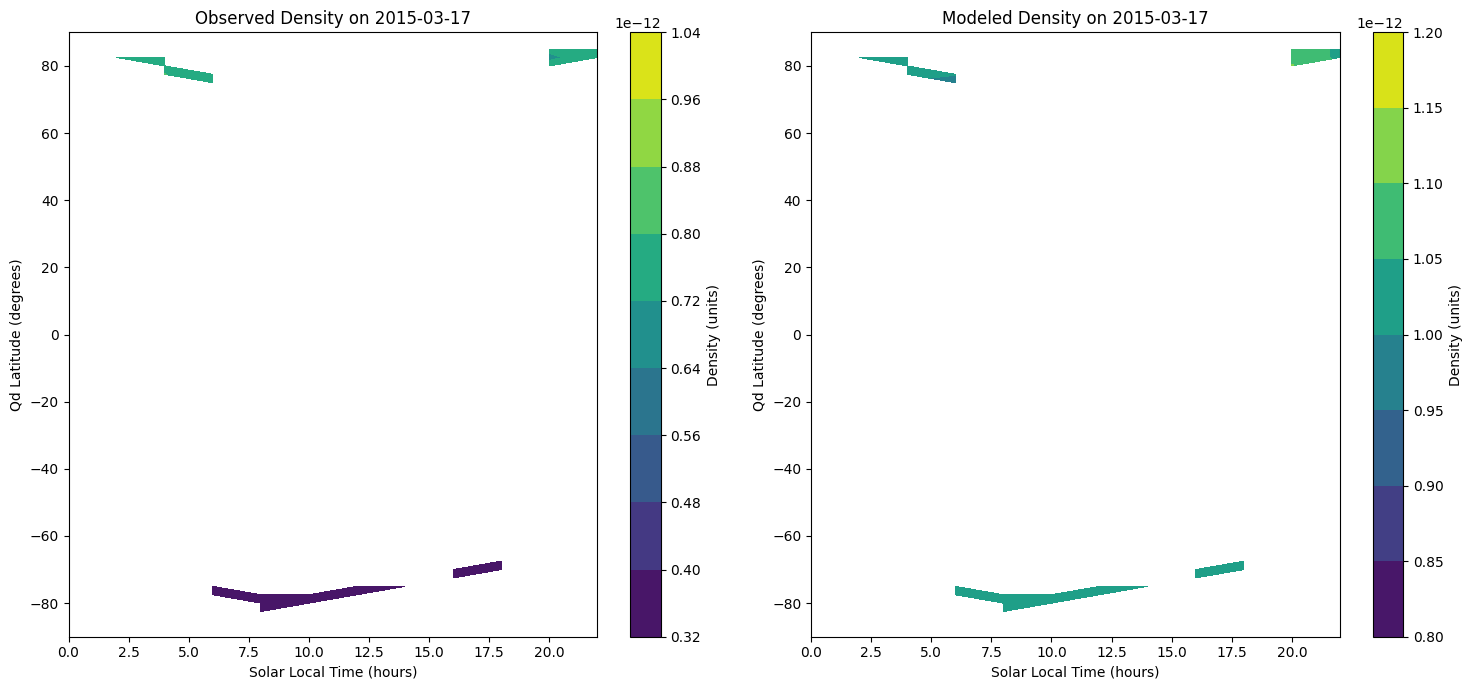

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Define the date for which you want to visualize the data
date_to_plot = datetime.datetime(2015, 3, 17)

# Define the file path based on the date
sat = 'SAT_C'
instr = 'ACC'
hgt = 453
mag_model = 'qd'
file_path = f'data/{sat}/hgt{hgt}km/{sat}_{instr}_GridData_{date_to_plot.strftime("%Y-%m-%d")}_{mag_model}.nc'

# Load the NetCDF file
ds = xr.open_dataset(file_path)

# Extract relevant variables
density = ds['density_hgt' + str(hgt) + 'km']
msis_density = ds['msis_density_hgt' + str(hgt) + 'km']
latitudes = ds[mag_model + '_latitude']
solar_local_time = ds['solar_local_time']

# Select a specific time if needed (e.g., the first time step)
time_index = 0
density_data = density.isel(time=time_index).values
msis_density_data = msis_density.isel(time=time_index).values

# Prepare data for plotting
latitudes_vals = latitudes.values
slt_vals = solar_local_time.values

# Check if dimensions match
print(f"Latitude values shape: {latitudes_vals.shape}")
print(f"Solar local time shape: {slt_vals.shape}")
print(f"Density data shape: {density_data.shape}")

# Ensure coordinate arrays are reshaped to match the data dimensions if necessary
# Create matching arrays (for demonstration)
latitudes_vals = np.linspace(np.min(latitudes_vals), np.max(latitudes_vals), 73)
slt_vals = np.linspace(np.min(slt_vals), np.max(slt_vals), 12)

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot observed density
c1 = axs[0].contourf(slt_vals, latitudes_vals, density_data, cmap='viridis')
axs[0].set_title(f'Observed Density on {date_to_plot.strftime("%Y-%m-%d")}')
axs[0].set_xlabel('Solar Local Time (hours)')
axs[0].set_ylabel(f'{mag_model.capitalize()} Latitude (degrees)')
fig.colorbar(c1, ax=axs[0], label='Density (units)')

# Plot modeled density
c2 = axs[1].contourf(slt_vals, latitudes_vals, msis_density_data, cmap='viridis')
axs[1].set_title(f'Modeled Density on {date_to_plot.strftime("%Y-%m-%d")}')
axs[1].set_xlabel('Solar Local Time (hours)')
axs[1].set_ylabel(f'{mag_model.capitalize()} Latitude (degrees)')
fig.colorbar(c2, ax=axs[1], label='Density (units)')

plt.tight_layout()
plt.show()


Latitude values shape: (73,)
Solar local time shape: (12,)
Density data shape: (73, 12)
Latitude values shape: (73,)
Solar local time shape: (12,)
Density data shape: (73, 12)
Latitude values shape: (73,)
Solar local time shape: (12,)
Density data shape: (73, 12)


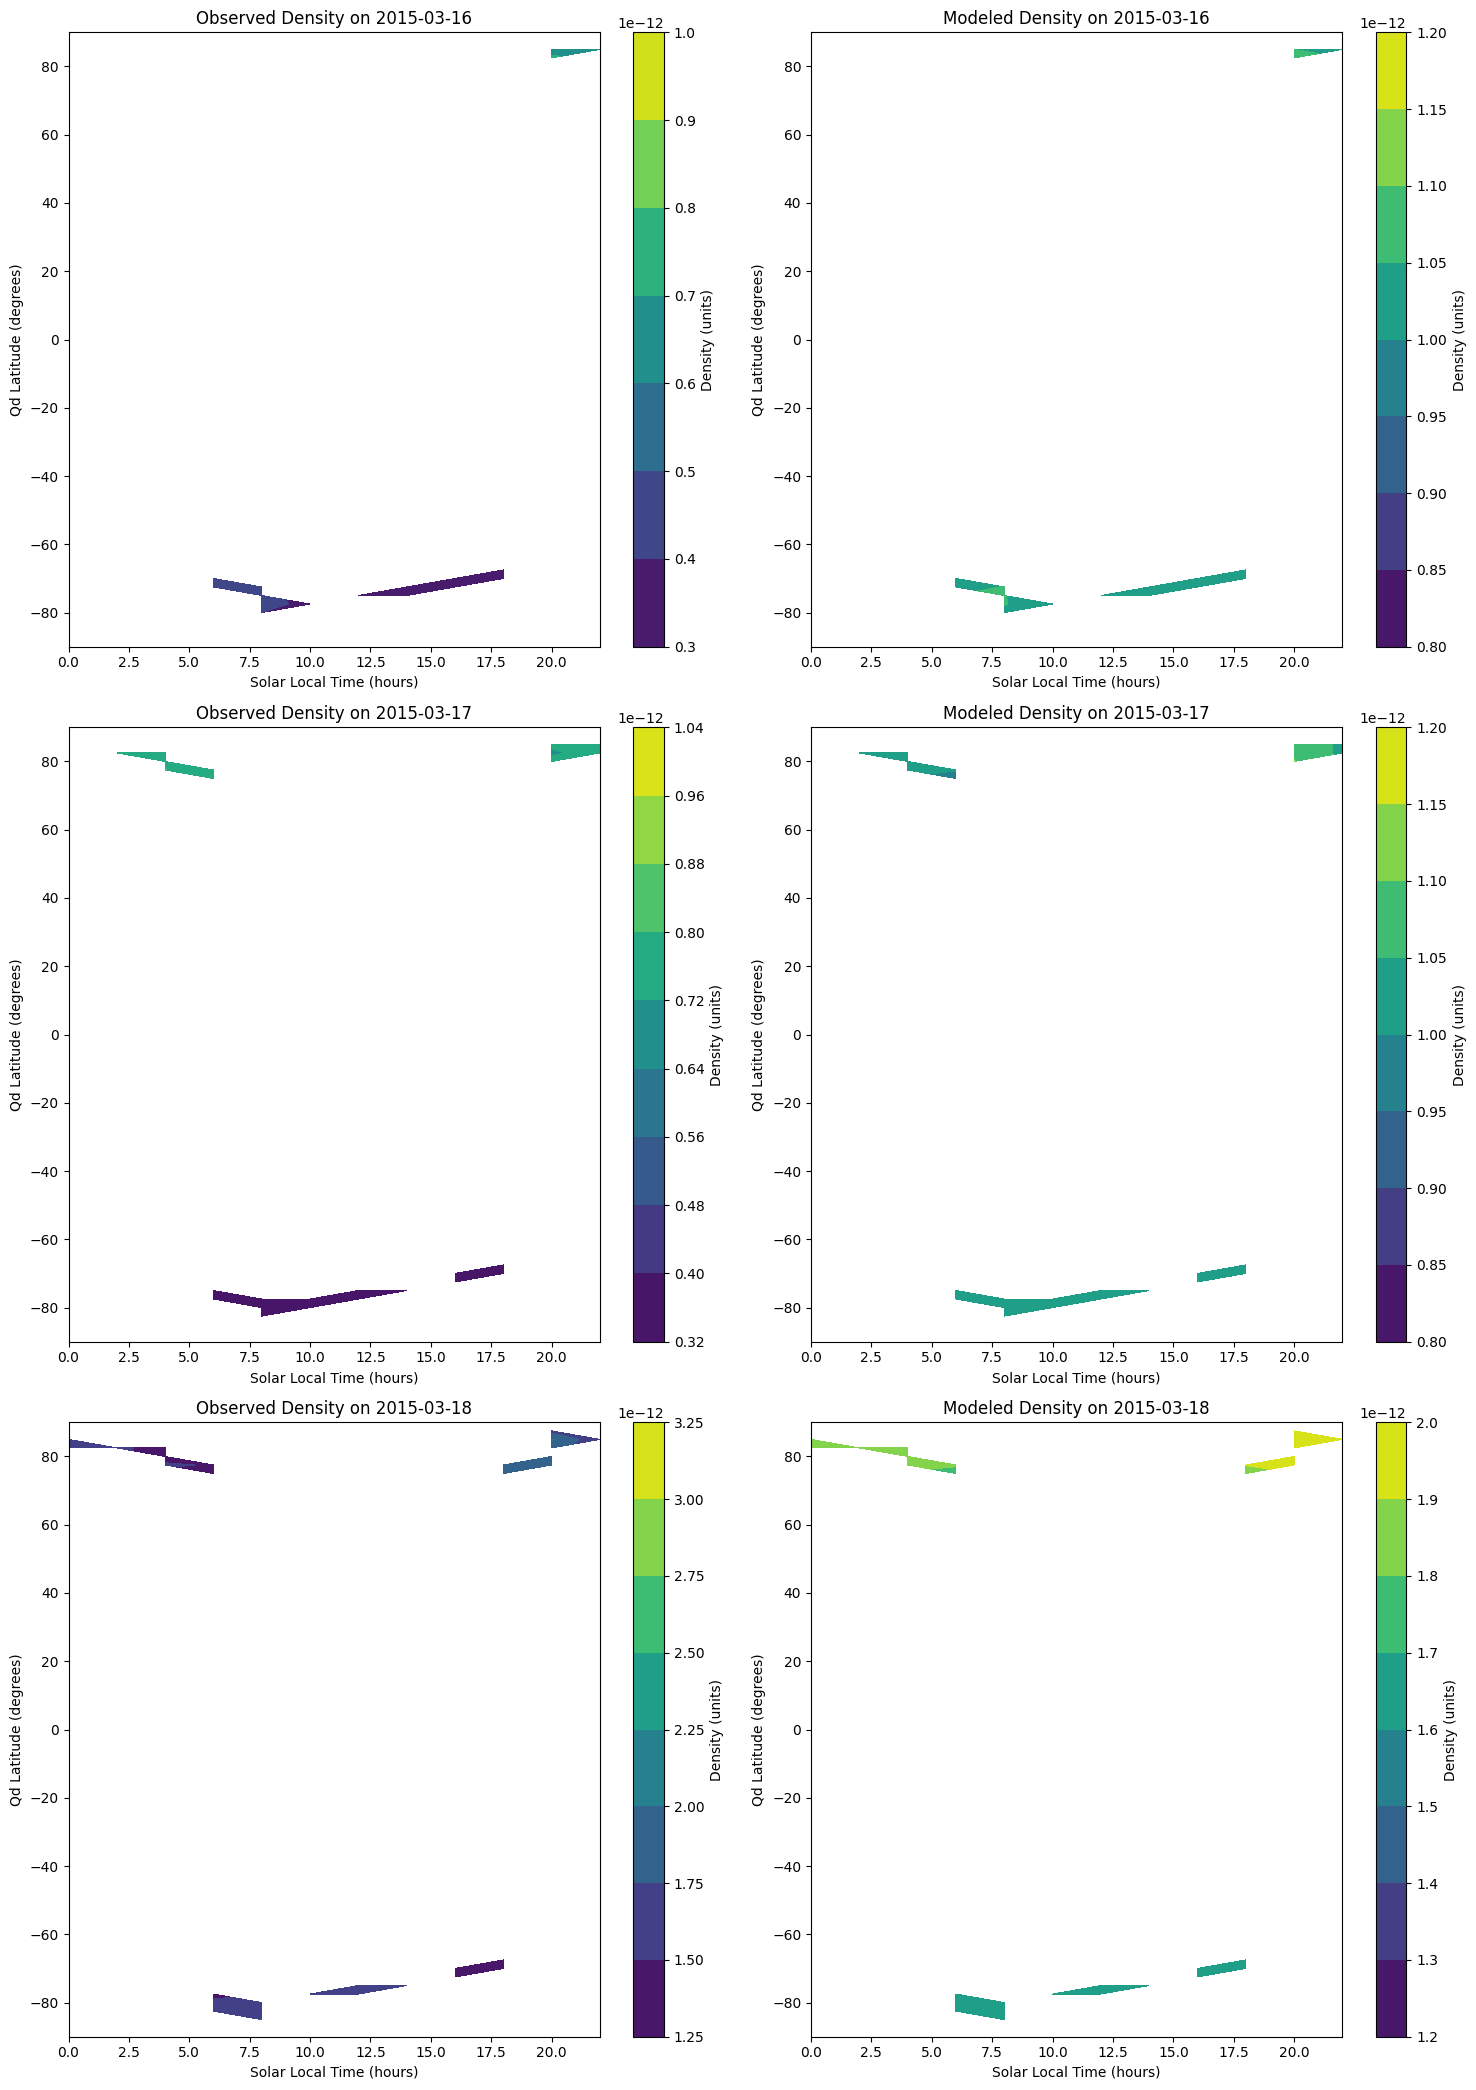

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Define the range of dates you want to visualize
dates_to_plot = [datetime.datetime(2015, 3, 16), datetime.datetime(2015, 3, 17), datetime.datetime(2015, 3, 18)]

# Define constants
sat = 'SAT_C'
instr = 'ACC'
hgt = 453
mag_model = 'qd'

# Create a figure with subplots for each day
fig, axs = plt.subplots(len(dates_to_plot), 2, figsize=(15, len(dates_to_plot) * 7))

# Loop through each date
for i, date_to_plot in enumerate(dates_to_plot):
    # Define the file path based on the date
    file_path = f'data/{sat}/hgt{hgt}km/{sat}_{instr}_GridData_{date_to_plot.strftime("%Y-%m-%d")}_{mag_model}.nc'
    
    # Load the NetCDF file
    ds = xr.open_dataset(file_path)
    
    # Extract relevant variables
    density = ds['density_hgt' + str(hgt) + 'km']
    msis_density = ds['msis_density_hgt' + str(hgt) + 'km']
    latitudes = ds[mag_model + '_latitude']
    solar_local_time = ds['solar_local_time']
    
    # Select a specific time if needed (e.g., the first time step)
    time_index = 0
    density_data = density.isel(time=time_index).values
    msis_density_data = msis_density.isel(time=time_index).values
    
    # Prepare data for plotting
    latitudes_vals = latitudes.values
    slt_vals = solar_local_time.values

    # Check if dimensions match
    print(f"Latitude values shape: {latitudes_vals.shape}")
    print(f"Solar local time shape: {slt_vals.shape}")
    print(f"Density data shape: {density_data.shape}")

    # Ensure coordinate arrays are reshaped to match the data dimensions if necessary
    # Create matching arrays (for demonstration)
    if len(latitudes_vals) != 73:
        latitudes_vals = np.linspace(np.min(latitudes_vals), np.max(latitudes_vals), 73)
    if len(slt_vals) != 12:
        slt_vals = np.linspace(np.min(slt_vals), np.max(slt_vals), 12)

    # Plot observed density
    c1 = axs[i, 0].contourf(slt_vals, latitudes_vals, density_data, cmap='viridis')
    axs[i, 0].set_title(f'Observed Density on {date_to_plot.strftime("%Y-%m-%d")}')
    axs[i, 0].set_xlabel('Solar Local Time (hours)')
    axs[i, 0].set_ylabel(f'{mag_model.capitalize()} Latitude (degrees)')
    fig.colorbar(c1, ax=axs[i, 0], label='Density (units)')
    
    # Plot modeled density
    c2 = axs[i, 1].contourf(slt_vals, latitudes_vals, msis_density_data, cmap='viridis')
    axs[i, 1].set_title(f'Modeled Density on {date_to_plot.strftime("%Y-%m-%d")}')
    axs[i, 1].set_xlabel('Solar Local Time (hours)')
    axs[i, 1].set_ylabel(f'{mag_model.capitalize()} Latitude (degrees)')
    fig.colorbar(c2, ax=axs[i, 1], label='Density (units)')

plt.tight_layout()
plt.show()


In [5]:
import os

# Determine the root folder and print it
root_folder = os.getcwd()  # Get the current working directory
print(f"Root folder: {root_folder}")

# Construct the output directory and print it
fp_out = os.path.join('data', sat, 'hgt' + str(hgt) + 'km')
print(f"Output directory: {os.path.abspath(fp_out)}")

# Inside your loop, before saving the file, print the file path
fn_out = os.path.join(fp_out, sat + '_' + instr + '_GridData_' + day.strftime('%Y-%m-%d') + '_' + mag_model + '.nc')
print(f"Saving NetCDF file to: {os.path.abspath(fn_out)}")


Root folder: /home/jose_ne/Documents/thermosphere
Output directory: /home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km
Saving NetCDF file to: /home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km/SAT_C_ACC_GridData_2021-12-31_qd.nc


In [ ]:
plt.figure(figsize=(12, 6))
ds_out['density_hgt' + str(hgt) + 'km'].mean(dim='solar_local_time').plot(
    x='time', 
    y=mag_model + '_latitude', 
    cmap='viridis', 
    robust=True
)
plt.title(f'Gridded Observed Density at {hgt} km - {tstart.strftime("%Y-%m-%d")} to {tend.strftime("%Y-%m-%d")}')
plt.xlabel('Time')
plt.ylabel('Magnetic Latitude')
plt.show()

In [ ]:
import sys
import datetime
import xarray as xr
import cdflib.xarray
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.stats import zscore

sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
import readESASwarm
sys.path.append('/home/jose_ne/Documents/swe_data_processing_routines')
import processESASwarm

def remove_outliers(data, zscore_threshold=3, rolling_window=10, rolling_threshold=3):
    # Remove outliers using z-score
    z_scores = zscore(data)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = abs_z_scores < zscore_threshold
    data = data[filtered_entries]

    # Remove outliers using rolling median and std
    data_series = pd.Series(data)
    rolling_median = data_series.rolling(window=rolling_window, center=True).median()
    rolling_std = data_series.rolling(window=rolling_window, center=True).std()
    diff = np.abs(data_series - rolling_median)
    outliers = diff > (rolling_threshold * rolling_std)
    data = data_series[~outliers].values

    return data

tstart = datetime.datetime(2015, 1, 1, 0, 0, 0)
tend = datetime.datetime(2015, 12, 31, 23, 59, 59)
sat = 'SAT_C'
instr = 'ACC'
hgt = 453
mag_model = 'qd'

dlat = 2.5
dslt = 2  # hours
fs = int(24 * 60 / 90)  # 90 minutes sampling

ut_out = [np.datetime64(tstart + datetime.timedelta(minutes=int(dt * 24 * 60 / fs)), 'ns') for dt in range(fs)]
slt = list(range(0, 24, dslt))
mlat = [x / 10 for x in range(-900, 901, int(dlat * 10))]

da_obs_sum = xr.DataArray(np.full((len(ut_out), len(mlat), len(slt)), 0.), 
                          coords={'time': ('time', ut_out), mag_model + '_latitude': (mag_model + '_latitude', mlat), 
                                  'solar_local_time': ('solar_local_time', slt)})
da_model_sum = xr.DataArray(np.full((len(ut_out), len(mlat), len(slt)), 0.), 
                            coords={'time': ('time', ut_out), mag_model + '_latitude': (mag_model + '_latitude', mlat), 
                                    'solar_local_time': ('solar_local_time', slt)})
da_weight = xr.DataArray(np.full((len(ut_out), len(mlat), len(slt)), 0.), 
                         coords={'time': ('time', ut_out), mag_model + '_latitude': (mag_model + '_latitude', mlat), 
                                 'solar_local_time': ('solar_local_time', slt)})

for dx in range((tend - tstart).days + 1):
    day = tstart + datetime.timedelta(days=dx)
    processESASwarm.calculateNormalisedDNS(day, sat, instr, hgt)
    xr_dns = readESASwarm.readDNS(day, datetime.datetime(day.year, day.month, day.day, 23, 59, 59), sat, instr, download_missing_data=False)
    xr_mcoord = readESASwarm.readDNS_magCoord(day, datetime.datetime(day.year, day.month, day.day, 23, 59, 59), sat, instr, mag_model=mag_model)
    xr_norm = readESASwarm.readDNS_normalized(day, datetime.datetime(day.year, day.month, day.day, 23, 59, 59), sat, instr, norm_alt=hgt)

    if len(list(xr_norm.keys())) > 0:
        # Remove outliers using the combined function
        d_obs = remove_outliers(xr_norm['density_hgt' + str(hgt) + 'km'].values)
        d_model = remove_outliers(xr_norm['msis_density_hgt' + str(hgt) + 'km'].values)

        mlat = xr_mcoord[mag_model + '_latitude'].values
        slt = xr_dns.local_solar_time.values
        t = xr_norm.time.values

        for x in range(len(d_obs)):
            grid_mlat = np.round(mlat[x] / dlat) * dlat
            grid_slt = int(np.floor(slt[x] / dslt) * dslt)
            dt = np.floor((t[x] - ut_out[0]).astype('timedelta64[ns]') / np.timedelta64(1, 'ns') * 10 ** -9 / (24 * 60 * 60) * fs) / fs  # [days]
            grid_t = ut_out[0] + np.timedelta64(int(dt * 24 * 60), 'm').astype('timedelta64[ns]')
            da_obs_sum.loc[grid_t, grid_mlat, grid_slt] += d_obs[x]
            da_model_sum.loc[grid_t, grid_mlat, grid_slt] += d_model[x]
            da_weight.loc[grid_t, grid_mlat, grid_slt] += 1

da_obs_mean_density = (da_obs_sum / da_weight).assign_attrs(xr_norm['density_hgt' + str(hgt) + 'km'].attrs)
da_model_mean_density = (da_model_sum / da_weight).assign_attrs(xr_norm['msis_density_hgt' + str(hgt) + 'km'].attrs)
ds_out = xr.Dataset({})
ds_out['density_hgt' + str(hgt) + 'km'] = da_obs_mean_density
ds_out['msis_density_hgt' + str(hgt) + 'km'] = da_model_mean_density
ds_out[mag_model + '_latitude'].attrs = xr_mcoord[mag_model + '_latitude'].attrs
ds_out['solar_local_time'].attrs = xr_dns.local_solar_time.attrs

# Commented out writing the files to the folder
# ds_out.to_netcdf(fn_out)

# Plotting the gridded observational data
plt.figure(figsize=(12, 6))
ds_out['density_hgt' + str(hgt) + 'km'].mean(dim='solar_local_time').plot(
    x='time', 
    y=mag_model + '_latitude', 
    cmap='viridis', 
    robust=True
)
plt.title(f'Gridded Observed Density at {hgt} km - {tstart.strftime("%Y-%m-%d")} to {tend.strftime("%Y-%m-%d")}')
plt.xlabel('Time')
plt.ylabel('Magnetic Latitude')
plt.show()


In [ ]:
import xarray as xr

# Define the path to your NetCDF file
filename = '/mnt/sofs01/workcache/SO-MirroredData/SWARM-DISS/DNS/ACC/SAT_C/SW_OPER_DNSCACC_2__20230731T000000_20230731T235950_normalt_453km.nc'

# Open the NetCDF file as an xarray Dataset
ds = xr.open_dataset(filename)

# Display information about the dataset (optional)
print(ds)



In [2]:
import xarray as xr

# Define the path to your NetCDF file
filename = 'data/SAT_C/hgt453km/SAT_C_ACC_GridData_2014-02-01_qd.nc'


ds = xr.open_dataset(filename, decode_times=True, decode_coords=True)

# Convert the Dataset into a DataArray
da = ds.to_array()

# Optionally, print information about the DataArray
print(da)



<xarray.DataArray (variable: 2, time: 16, qd_latitude: 73, solar_local_time: 12)> Size: 224kB
array([[[[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
          1.38030096e-13,            nan,            nan],
         [           nan,            nan,            nan, ...,
          1.25118569e-13,            nan,            nan],
         [           nan,            nan,            nan, ...,
          1.25673844e-13,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,           

In [ ]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS

# Directory where your NetCDF data files are located
data_dir = 'data/SAT_C/hgt453km'

# Initialize an empty list to store file paths
nc_file_paths = []

# Collect NetCDF files
for file in os.listdir(data_dir):
    if file.endswith('.nc'):
        nc_file_paths.append(os.path.join(data_dir, file))

# Load and concatenate all NetCDF datasets into a single xarray Dataset
datasets = [xr.open_dataset(file) for file in nc_file_paths]
combined_ds = xr.concat(datasets, dim='time')

# Select the data for a specific Solar Local Time (12 PM) and latitude (40 degrees North)
target_slt = 12  # Solar Local Time (12 PM)
target_latitude = 40  # Latitude (40 degrees North)

# Select the relevant data based on SLT and latitude
selected_data = combined_ds.sel(solar_local_time=target_slt, method='nearest').sel(qd_latitude=target_latitude, method='nearest')

# Convert the time values from the NetCDF data to a pandas datetime index
time_values = pd.to_datetime(selected_data['time'].values)

# Ensure the time index has 90-minute resolution
time_series = pd.date_range(start=time_values.min(), end=time_values.max(), freq='90T')

# Reindex the selected_data to include the 90-minute frequency
selected_data = selected_data.reindex(time=time_series, method='nearest')

# Initialize an empty list to store aligned F10.7 values
f107_values_aligned = []

# Loop through each time point and get the corresponding F10.7 value
for time_point in time_series:
    day = time_point.to_pydatetime()  # Convert to a Python datetime object
    # Get F10.7 value using your function
    xr_f107_all = readSolarFluxCLS(day - datetime.timedelta(days=40), day + datetime.timedelta(days=40), 'adjusted', 'f10.7')
    
    try:
        f107_day = xr_f107_all['f10.7_c'].sel(time=np.datetime64(day, 'D')).values
        f107_values_aligned.append(f107_day)
    except KeyError:
        # Handle missing data
        f107_values_aligned.append(np.nan)

# Convert the aligned F10.7 values list to a numpy array
f107_values_aligned = np.array(f107_values_aligned)

# Ensure the F10.7 array has the same length as the time array
if len(f107_values_aligned) != len(selected_data['density_hgt453km'].values):
    raise ValueError("The F10.7 values and density values arrays have different lengths.")

# Add the aligned F10.7 values as a new variable in the xarray Dataset
selected_data = selected_data.assign_coords(F10_7=('time', f107_values_aligned))

# Filter out any NaN values from both the density and F10.7 arrays
valid_indices = ~np.isnan(selected_data['F10_7'].values) & ~np.isnan(selected_data['density_hgt453km'].values)

density_values = selected_data['density_hgt453km'].values[valid_indices]
f107_values_filtered = selected_data['F10_7'].values[valid_indices]

# Plot the observed density versus F10.7 index
plt.figure(figsize=(12, 6))
plt.plot(f107_values_filtered, density_values, 'o-', alpha=0.5)  # Plot with markers and lines
plt.title('Observed Density vs F10.7 Index at 12 PM SLT, 40° N Latitude')
plt.xlabel('F10.7 Index')
plt.ylabel('Observed Density')
plt.grid(True)
plt.show()



/tmp/ipykernel_125/2720759087.py:37: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_series = pd.date_range(start=time_values.min(), end=time_values.max(), freq='90T')


In [4]:
import xarray as xr
import datetime

# Define the range of dates you want to visualize
dates_to_plot = [datetime.datetime(2015, 3, 16), datetime.datetime(2015, 3, 17), datetime.datetime(2015, 3, 18)]

# Define constants
sat = 'SAT_C'
instr = 'ACC'
hgt = 453
mag_model = 'qd'

# Initialize an empty list to store the datasets for each day
datasets = []

# Loop through each date and load the corresponding NetCDF file
for date_to_plot in dates_to_plot:
    # Define the file path based on the date
    file_path = f'data/{sat}/hgt{hgt}km/{sat}_{instr}_GridData_{date_to_plot.strftime("%Y-%m-%d")}_{mag_model}.nc'
    
    # Load the NetCDF file
    ds = xr.open_dataset(file_path)
    
    # Append the dataset to the list
    datasets.append(ds)

# Concatenate datasets along the time dimension
combined_ds = xr.concat(datasets, dim='time')
print(combined_ds)

# Extract the solar local time variable
solar_local_time = combined_ds['solar_local_time']

# Find the unique solar local times in the dataset
unique_slt = solar_local_time.values.flatten()  # Flatten in case SLT is multidimensional
unique_slt = np.unique(unique_slt)  # Get unique SLT values

# Print the unique solar local times
print("Unique Solar Local Times in the Dataset:")
print(unique_slt)


<xarray.Dataset> Size: 674kB
Dimensions:                (time: 48, qd_latitude: 73, solar_local_time: 12)
Coordinates:
  * time                   (time) datetime64[ns] 384B 2015-03-16 ... 2015-03-...
  * qd_latitude            (qd_latitude) float64 584B -90.0 -87.5 ... 87.5 90.0
  * solar_local_time       (solar_local_time) int64 96B 0 2 4 6 ... 16 18 20 22
Data variables:
    density_hgt453km       (time, qd_latitude, solar_local_time) float64 336kB ...
    msis_density_hgt453km  (time, qd_latitude, solar_local_time) float64 336kB ...
Unique Solar Local Times in the Dataset:
[ 0  2  4  6  8 10 12 14 16 18 20 22]


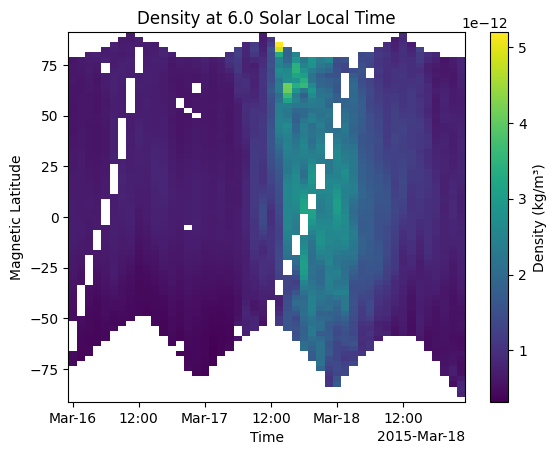

In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Define the range of dates you want to visualize
dates_to_plot = [datetime.datetime(2015, 3, 16), datetime.datetime(2015, 3, 17), datetime.datetime(2015, 3, 18)]

# Define constants
sat = 'SAT_C'
instr = 'ACC'
hgt = 453
mag_model = 'qd'

# Initialize an empty list to store the datasets for each day
datasets = []

# Loop through each date and load the corresponding NetCDF file
for date_to_plot in dates_to_plot:
    # Define the file path based on the date
    file_path = f'data/{sat}/hgt{hgt}km/{sat}_{instr}_GridData_{date_to_plot.strftime("%Y-%m-%d")}_{mag_model}.nc'
    
    # Load the NetCDF file
    ds = xr.open_dataset(file_path)
    
    # Append the dataset to the list
    datasets.append(ds)

# Concatenate datasets along the time dimension
combined_ds = xr.concat(datasets, dim='time')

# Extract relevant variables in xarray format
density = combined_ds['density_hgt' + str(hgt) + 'km']
latitudes = combined_ds[mag_model + '_latitude']
solar_local_time = combined_ds['solar_local_time']

# Specify the solar local time you want to plot
target_slt = 6.0  # Example: 6 AM local time

# Find the closest solar local time
slt_index = np.abs(solar_local_time - target_slt).argmin(dim='solar_local_time')

# Extract data for the closest solar local time
density_slt = density.isel(solar_local_time=slt_index)

# Plotting using xarray's built-in plot function
density_slt.plot(x='time', y=mag_model + '_latitude', cmap='viridis', cbar_kwargs={'label': 'Density (kg/m³)'})
plt.title(f'Density at {target_slt:.1f} Solar Local Time')
plt.xlabel('Time')
plt.ylabel('Magnetic Latitude')
plt.show()



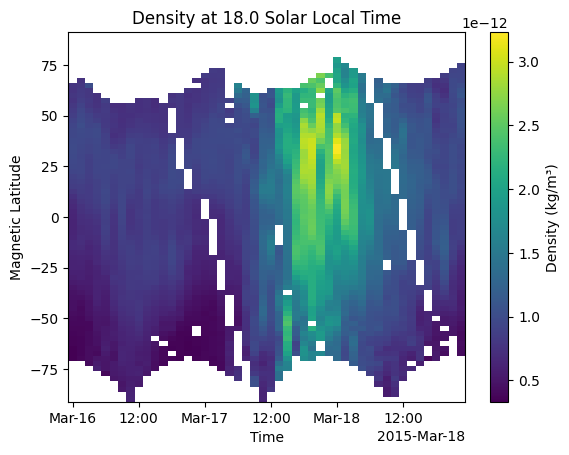

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Define the range of dates you want to visualize
dates_to_plot = [datetime.datetime(2015, 3, 16), datetime.datetime(2015, 3, 17), datetime.datetime(2015, 3, 18)]

# Define constants
sat = 'SAT_C'
instr = 'ACC'
hgt = 453
mag_model = 'qd'

# Initialize an empty list to store the datasets for each day
datasets = []

# Loop through each date and load the corresponding NetCDF file
for date_to_plot in dates_to_plot:
    # Define the file path based on the date
    file_path = f'data/{sat}/hgt{hgt}km/{sat}_{instr}_GridData_{date_to_plot.strftime("%Y-%m-%d")}_{mag_model}.nc'
    
    # Load the NetCDF file
    ds = xr.open_dataset(file_path)
    
    # Append the dataset to the list
    datasets.append(ds)

# Concatenate datasets along the time dimension
combined_ds = xr.concat(datasets, dim='time')

# Extract relevant variables in xarray format
density = combined_ds['density_hgt' + str(hgt) + 'km']
latitudes = combined_ds[mag_model + '_latitude']
solar_local_time = combined_ds['solar_local_time']

# Specify the solar local time want to plot 
target_slt = 18.0

# Find the closest solar local time
slt_index = np.abs(solar_local_time - target_slt).argmin(dim='solar_local_time')

# Extract data for the closest solar local time
density_slt = density.isel(solar_local_time=slt_index)

# Plotting using xarray's built-in plot function
density_slt.plot(x='time', y=mag_model + '_latitude', cmap='viridis', cbar_kwargs={'label': 'Density (kg/m³)'})
plt.title(f'Density at {target_slt:.1f} Solar Local Time')
plt.xlabel('Time')
plt.ylabel('Magnetic Latitude')
plt.show()


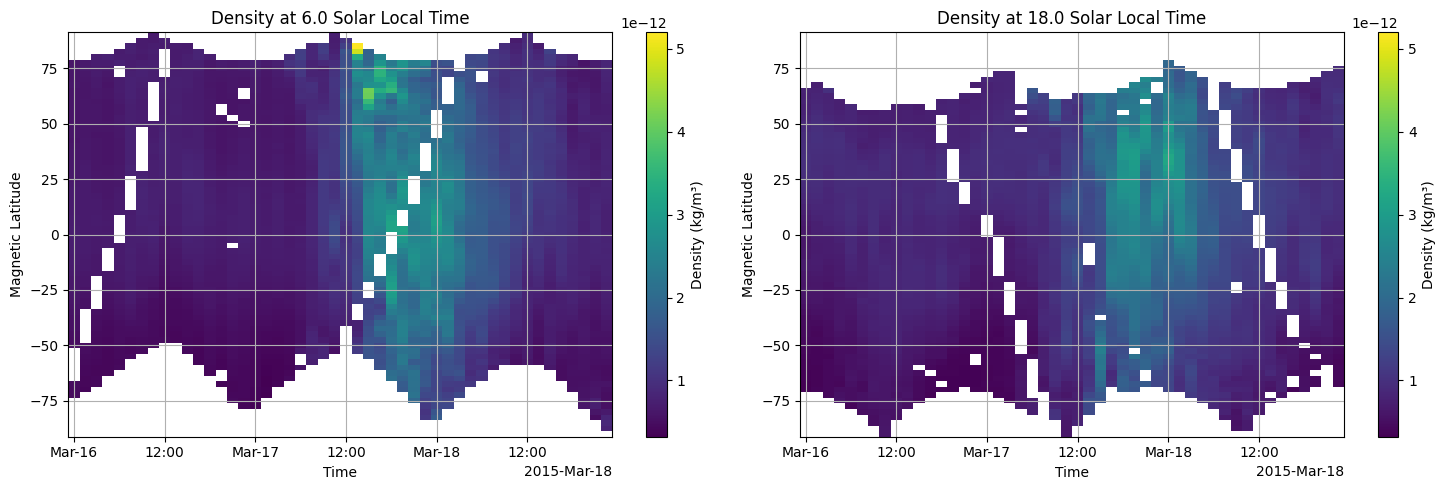

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Define the range of dates you want to visualize
dates_to_plot = [datetime.datetime(2015, 3, 16), datetime.datetime(2015, 3, 17), datetime.datetime(2015, 3, 18)]

# Define constants
sat = 'SAT_C'
instr = 'ACC'
hgt = 453
mag_model = 'qd'

# Initialize an empty list to store the datasets for each day
datasets = []

# Loop through each date and load the corresponding NetCDF file
for date_to_plot in dates_to_plot:
    # Define the file path based on the date
    file_path = f'data/{sat}/hgt{hgt}km/{sat}_{instr}_GridData_{date_to_plot.strftime("%Y-%m-%d")}_{mag_model}.nc'
    
    # Load the NetCDF file
    ds = xr.open_dataset(file_path)
    
    # Append the dataset to the list
    datasets.append(ds)

# Concatenate datasets along the time dimension
combined_ds = xr.concat(datasets, dim='time')

# Extract relevant variables in xarray format
density = combined_ds['density_hgt' + str(hgt) + 'km']
latitudes = combined_ds[mag_model + '_latitude']
solar_local_time = combined_ds['solar_local_time']

# Specify the solar local times you want to plot
target_slt_1 = 6.0  # 6 AM
target_slt_2 = 18.0  # 6 PM

# Find the closest solar local time index for both times
slt_index_1 = np.abs(solar_local_time - target_slt_1).argmin(dim='solar_local_time')
slt_index_2 = np.abs(solar_local_time - target_slt_2).argmin(dim='solar_local_time')

# Extract data for the closest solar local times
density_slt_1 = density.isel(solar_local_time=slt_index_1)
density_slt_2 = density.isel(solar_local_time=slt_index_2)

# Find the global minimum and maximum density values across both datasets
vmin = min(density_slt_1.min().values, density_slt_2.min().values)
vmax = max(density_slt_1.max().values, density_slt_2.max().values)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 6 AM local time
density_slt_1.plot(ax=axs[0], x='time', y=mag_model + '_latitude', cmap='viridis', 
                   vmin=vmin, vmax=vmax, cbar_kwargs={'label': 'Density (kg/m³)'})
axs[0].set_title(f'Density at {target_slt_1:.1f} Solar Local Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Magnetic Latitude')
axs[0].grid(True)

# Plot for 6 PM local time
density_slt_2.plot(ax=axs[1], x='time', y=mag_model + '_latitude', cmap='viridis', 
                   vmin=vmin, vmax=vmax, cbar_kwargs={'label': 'Density (kg/m³)'})
axs[1].set_title(f'Density at {target_slt_2:.1f} Solar Local Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Magnetic Latitude')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

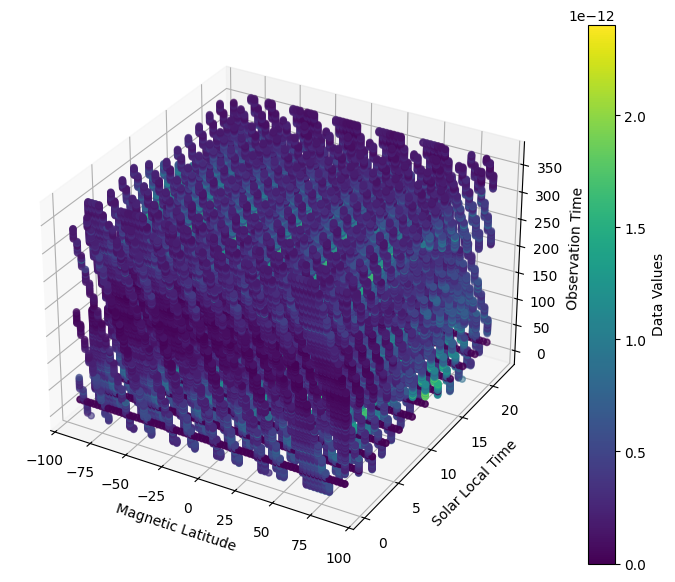

In [5]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

# Directory where your data files are located
data_dir = 'data/SAT_C/hgt453km'

# Define the range of dates for the year 2015
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

# Define grid parameters
latitudes = np.arange(-90, 90.1, 2.5)  # Magnetic latitude grid points
slts = np.arange(0, 24, 2)  # Solar Local Time grid points
time_intervals = np.arange(0, 366, 1)  # Daily grid points for a year

# Initialize the data cube with zeros
data_cube = np.zeros((len(latitudes), len(slts), len(time_intervals)))

# Loop through each day of the year 2015 to fill the data cube
current_date = start_date
time_index = 0

while current_date <= end_date:
    date_str = current_date.strftime('%Y-%m-%d')
    file_paths_2016 = []

    # Loop through all files in the directory to find the files for the current date
    for file in os.listdir(data_dir):
        if file.endswith('.nc') and date_str in file:
            file_paths_2016.append(os.path.join(data_dir, file))
    
    # If files are found, load and process them
    if file_paths_2016:
        daily_datasets = [xr.open_dataset(file) for file in file_paths_2016]
        combined_daily_ds = xr.concat(daily_datasets, dim='time')

        # Iterate over the Solar Local Time grid points
        for slt_index, slt in enumerate(slts):
            # Select data for the target Solar Local Time
            if slt in combined_daily_ds['solar_local_time']:
                density_slt = combined_daily_ds['density_hgt453km'].sel(solar_local_time=slt)

                # Assign values to the corresponding latitude and time indices in the data cube
                for lat_index, lat in enumerate(latitudes):
                    if lat in density_slt['qd_latitude']:
                        data_value = density_slt.sel(qd_latitude=lat).mean().values
                        data_cube[lat_index, slt_index, time_index] = data_value

    # Move to the next day and increase the time index
    current_date += datetime.timedelta(days=1)
    time_index += 1

# Step 3: Visualize the data cube
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Generate grid points for 3D plot
X, Y, Z = np.meshgrid(latitudes, slts, time_intervals)

# Flatten the arrays to plot the 3D scatter
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
values = data_cube.flatten()

# Plot the 3D scatter
sc = ax.scatter(X, Y, Z, c=values, cmap='viridis')

# Add labels
ax.set_xlabel('Magnetic Latitude')
ax.set_ylabel('Solar Local Time')
ax.set_zlabel('Observation Time')

# Show color bar
plt.colorbar(sc, label='Data Values')

# Show plot
plt.show()


In [2]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS

# Directory where your NetCDF data files are located
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km'
# Initialize an empty list to store file paths
nc_file_paths = []

# Collect NetCDF files
for file in os.listdir(data_dir):
    if file.endswith('.nc'):
        nc_file_paths.append(os.path.join(data_dir, file))

# Set the exact indices for Solar Local Time (12 PM) and Latitude (40° N)
target_slt = 12  # Solar Local Time (12 PM)
target_latitude = 40  # Latitude (40° N)

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Loop through each file and extract the desired data points
for file in nc_file_paths:
    # Load the dataset
    ds = xr.open_dataset(os.path.join(data_dir, file))
    
    # Get the indices for the exact Solar Local Time (12 PM) and Latitude (40° N)
    slt_index = np.where(ds['solar_local_time'] == target_slt)[0][0]
    lat_index = np.where(ds['qd_latitude'] == target_latitude)[0][0]

    # Use isel to extract the data at the specified grid point (slt_index, lat_index)
    selected_data = ds.isel(solar_local_time=slt_index, qd_latitude=lat_index)
    
    # Append the extracted data to the list
    selected_datasets.append(selected_data)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')

print(combined_ds)
# Convert the time values from the NetCDF data to a pandas datetime index
time_values = pd.to_datetime(combined_ds['time'].values)

# Ensure the time index has 90-minute resolution
time_series = pd.date_range(start=time_values.min(), end=time_values.max(), freq='90min')

# Reindex the selected_data to include the 90-minute frequency
combined_ds = combined_ds.reindex(time=time_series, method='nearest')

# Initialize an empty list to store aligned F10.7 values
f107_values_aligned = []

# Loop through each time point and get the corresponding F10.7 value
for time_point in time_series:
    day = time_point.to_pydatetime()  # Convert to a Python datetime object
    # Get F10.7 value using your function
    xr_f107_all = readSolarFluxCLS(day - datetime.timedelta(days=40), day + datetime.timedelta(days=40), 'adjusted', 'f10.7')
    
    try:
        f107_day = xr_f107_all['f10.7_c'].sel(time=np.datetime64(day, 'D')).values
        f107_values_aligned.append(f107_day)
    except KeyError:
        # Handle missing data
        f107_values_aligned.append(np.nan)

# Convert the aligned F10.7 values list to a numpy array
f107_values_aligned = np.array(f107_values_aligned)

# Ensure the F10.7 array has the same length as the time array
if len(f107_values_aligned) != len(combined_ds['density_hgt453km'].values):
    raise ValueError("The F10.7 values and density values arrays have different lengths.")

# Add the aligned F10.7 values as a new variable in the xarray Dataset
combined_ds = combined_ds.assign_coords(F10_7=('time', f107_values_aligned))

# Filter out any NaN values from both the density and F10.7 arrays
valid_indices = ~np.isnan(combined_ds['F10_7'].values) & ~np.isnan(combined_ds['density_hgt453km'].values)

density_values = combined_ds['density_hgt453km'].values[valid_indices]
f107_values_filtered = combined_ds['F10_7'].values[valid_indices]

# Plot the observed density versus F10.7 index
plt.figure(figsize=(12, 6))
plt.plot(f107_values_filtered, density_values, 'o-', alpha=0.5)  # Plot with markers and lines
plt.title('Observed Density vs F10.7 Index at 12 PM SLT, 40° N Latitude')
plt.xlabel('F10.7 Index')
plt.ylabel('Observed Density')
plt.grid(True)
plt.show()


<xarray.Dataset> Size: 1MB
Dimensions:                (time: 51408)
Coordinates:
  * time                   (time) datetime64[ns] 411kB 2014-02-01 ... 2023-07...
    qd_latitude            float64 8B 40.0
    solar_local_time       int64 8B 12
Data variables:
    density_hgt453km       (time) float64 411kB nan nan nan nan ... nan nan nan
    msis_density_hgt453km  (time) float64 411kB nan nan nan nan ... nan nan nan


In [11]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
from multiprocessing import Pool

sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS

# Directory where your NetCDF data files are located
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km'

# Set the exact indices for Solar Local Time (12 PM) and Latitude (40° N)
target_slt = 12  # Solar Local Time (12 PM)
target_latitude = 40  # Latitude (40° N)

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Loop through each file and extract the desired data points
for file in os.listdir(data_dir):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))
        
        # Get the indices for the exact Solar Local Time (12 PM) and Latitude (40° N)
        slt_index = np.where(ds['solar_local_time'].values == target_slt)[0][0]
        lat_index = np.where(ds['qd_latitude'].values == target_latitude)[0][0]

        # Use isel to extract the data at the specified grid point (slt_index, lat_index)
        selected_data = ds.isel(solar_local_time=slt_index, qd_latitude=lat_index)
        
        # Append the extracted data to the list
        selected_datasets.append(selected_data)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')

# Print the combined dataset to check structure
print(combined_ds)

# Convert the time values from the NetCDF data to a pandas datetime index
time_values = pd.to_datetime(combined_ds['time'].values)

def fetch_f107_for_date(day):
    """Fetch F10.7 values for a specific day."""
    xr_f107_all = readSolarFluxCLS(day - datetime.timedelta(days=40), day + datetime.timedelta(days=40), 'adjusted', 'f10.7')
    try:
        f107_day = xr_f107_all['f10.7_c'].sel(time=np.datetime64(day, 'D')).values
    except KeyError:
        f107_day = np.nan
    return f107_day

# Use multiprocessing to speed up F10.7 value fetching
with Pool(processes=4) as pool:
    f107_values_aligned = pool.map(fetch_f107_for_date, time_values.to_pydatetime())

# Convert the aligned F10.7 values list to a numpy array
f107_values_aligned = np.array(f107_values_aligned)

# Ensure the F10.7 array has the same length as the time array
if len(f107_values_aligned) != len(combined_ds['density_hgt453km'].values):
    raise ValueError("The F10.7 values and density values arrays have different lengths.")

# Add the aligned F10.7 values as a new variable in the xarray Dataset
combined_ds = combined_ds.assign_coords(F10_7=('time', f107_values_aligned))


# Filter out any NaN values from both the density and F10.7 arrays
valid_indices = ~np.isnan(combined_ds['F10_7'].values) & ~np.isnan(combined_ds['density_hgt453km'].values)

density_values = combined_ds['density_hgt453km'].values[valid_indices]
f107_values_filtered = combined_ds['F10_7'].values[valid_indices]

valid_data = combined_ds.where(~np.isnan(combined_ds['F10_7']) & ~np.isnan(combined_ds['density_hgt453km']), drop=True)

# Plot using xarray's built-in plot function for line plot
plt.figure(figsize=(12, 6))
valid_data.plot(x='time', y='density_hgt453km', label='Observed Density', color='blue')
plt.title('Observed Density over Time at 12 PM SLT, 40° N Latitude')
plt.xlabel('Time')
plt.ylabel('Observed Density')
plt.grid(True)
plt.show()

<xarray.Dataset> Size: 1MB
Dimensions:                (time: 51408)
Coordinates:
  * time                   (time) datetime64[ns] 411kB 2014-02-01 ... 2023-07...
    qd_latitude            float64 8B 40.0
    solar_local_time       int64 8B 12
Data variables:
    density_hgt453km       (time) float64 411kB nan nan nan nan ... nan nan nan
    msis_density_hgt453km  (time) float64 411kB nan nan nan nan ... nan nan nan


ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

<Figure size 1200x600 with 0 Axes>

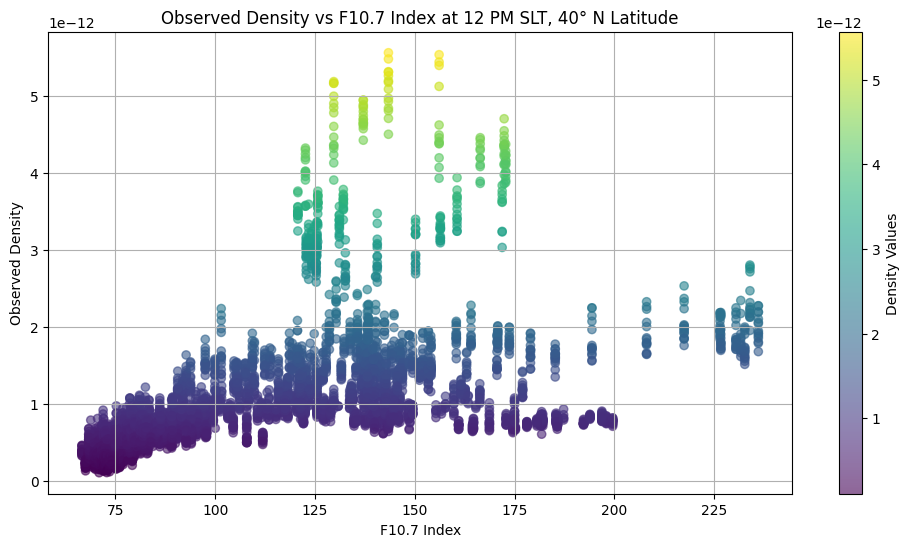

In [11]:
df = pd.DataFrame({
    'F10_7': f107_values_filtered,
    'Density': density_values
})

# Plot using Pandas scatter plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(df['F10_7'], df['Density'], c=df['Density'], cmap='viridis', alpha=0.6)
plt.title('Observed Density vs F10.7 Index at 12 PM SLT, 40° N Latitude')
plt.xlabel('F10.7 Index')
plt.ylabel('Observed Density')
plt.colorbar(scatter, label='Density Values')  # Add colorbar
plt.grid(True)
plt.show()

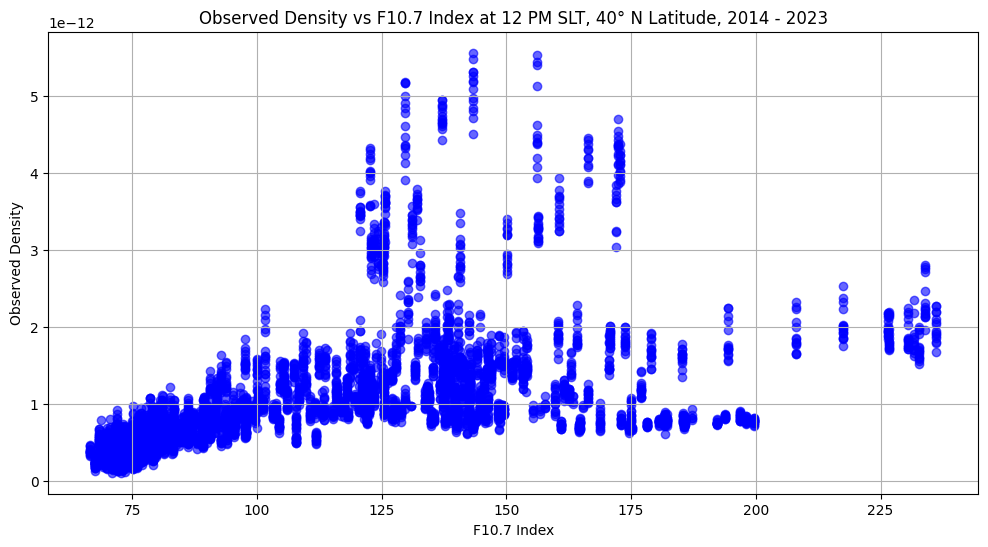

In [13]:
import pandas as pd
df = pd.DataFrame({
    'F10_7': f107_values_filtered,
    'Density': density_values
})

# Plot using Pandas scatter plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Set all points to the same color (e.g., blue) and remove the colorbar
scatter = ax.scatter(df['F10_7'], df['Density'], color='blue', alpha=0.6)

# Add title and labels
plt.title('Observed Density vs F10.7 Index at 12 PM SLT, 40° N Latitude, 2014 - 2023')
plt.xlabel('F10.7 Index')
plt.ylabel('Observed Density')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


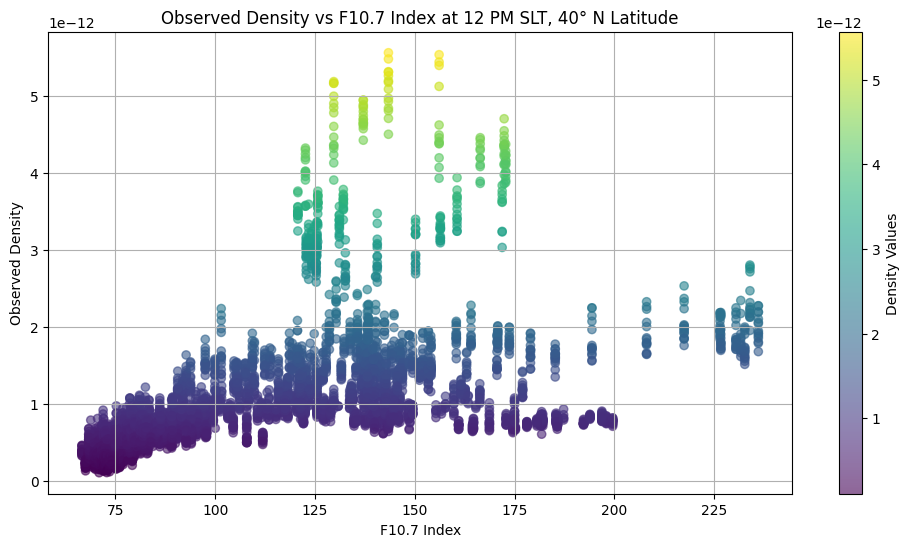

In [2]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(f107_values_filtered, density_values, c=density_values, cmap='viridis', alpha=0.6)
plt.title('Observed Density vs F10.7 Index at 12 PM SLT, 40° N Latitude')
plt.xlabel('F10.7 Index')
plt.ylabel('Observed Density')
plt.colorbar(scatter, label='Density Values')  # Add colorbar
plt.grid(True)
plt.show()

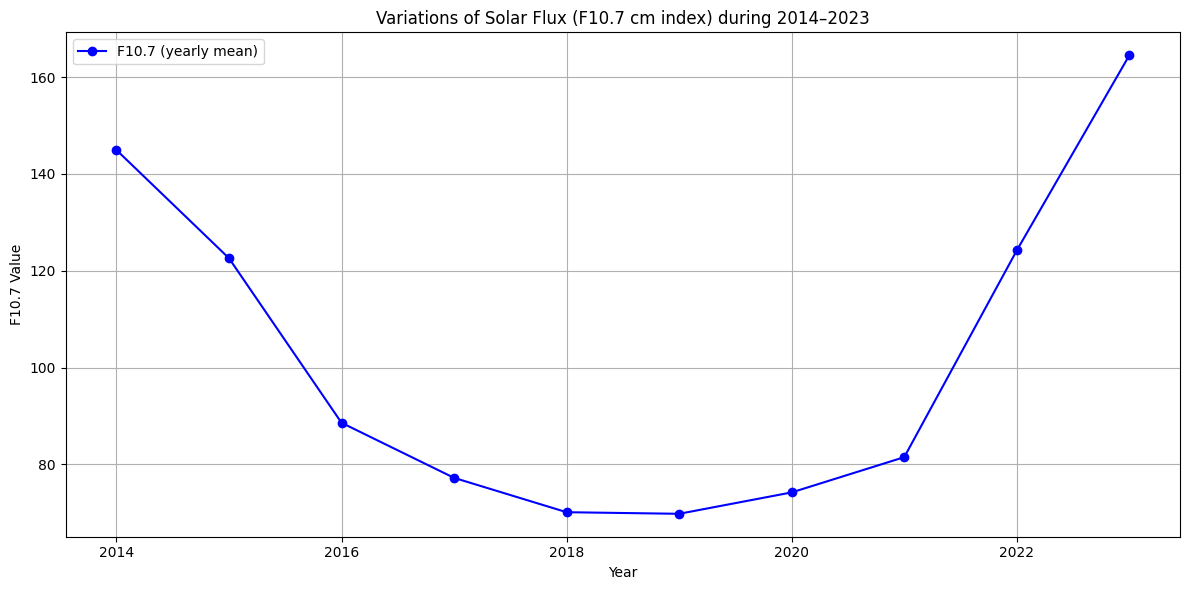

In [2]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from multiprocessing import Pool
import sys
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS
# Directory where your NetCDF data files are located
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km'



# Initialize an empty list to store datasets for each file
selected_datasets = []

# Loop through each file and load all the data
for file in os.listdir(data_dir):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))
        # Append the dataset to the list
        selected_datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')

# Convert the time values from the NetCDF data to a pandas datetime index
time_values = pd.to_datetime(combined_ds['time'].values)

def fetch_f107_for_date(day):
    """Fetch F10.7 values for a specific day."""
    xr_f107_all = readSolarFluxCLS(day - datetime.timedelta(days=40), day + datetime.timedelta(days=40), 'adjusted', 'f10.7')
    try:
        f107_day = xr_f107_all['f10.7_c'].sel(time=np.datetime64(day, 'D')).values
    except KeyError:
        f107_day = np.nan
    return f107_day

# Use multiprocessing to speed up F10.7 value fetching
with Pool(processes=4) as pool:
    f107_values_aligned = pool.map(fetch_f107_for_date, time_values.to_pydatetime())

# Convert the aligned F10.7 values list to a numpy array
f107_values_aligned = np.array(f107_values_aligned)

# Ensure the F10.7 array has the same length as the time array
if len(f107_values_aligned) != len(time_values):
    raise ValueError("The F10.7 values and time values arrays have different lengths.")

# Create a DataFrame for easier plotting
f107_df = pd.DataFrame({'time': time_values, 'F10.7': f107_values_aligned})

# Group by year and calculate the mean F10.7 value for each year
f107_df['year'] = f107_df['time'].dt.year
yearly_f107 = f107_df.groupby('year')['F10.7'].mean()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(yearly_f107.index, yearly_f107.values, marker='o', linestyle='-', color='b', label='F10.7 (yearly mean)')
plt.title('Variations of Solar Flux (F10.7 cm index) during 2014–2023')
plt.xlabel('Year')
plt.ylabel('F10.7 Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
from multiprocessing import Pool

sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS

# Directory where your NetCDF data files are located
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km'

# Initialize an empty list to store datasets for each day
datasets = []

# Loop through each file and load the datasets
for file in os.listdir(data_dir):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))
        
        # Append the dataset to the list
        datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(datasets, dim='time')

# Print the combined dataset to check structure
print(combined_ds)



<xarray.Dataset> Size: 721MB
Dimensions:                (time: 51408, qd_latitude: 73, solar_local_time: 12)
Coordinates:
  * time                   (time) datetime64[ns] 411kB 2014-02-01 ... 2023-07...
  * qd_latitude            (qd_latitude) float64 584B -90.0 -87.5 ... 87.5 90.0
  * solar_local_time       (solar_local_time) int64 96B 0 2 4 6 ... 16 18 20 22
Data variables:
    density_hgt453km       (time, qd_latitude, solar_local_time) float64 360MB ...
    msis_density_hgt453km  (time, qd_latitude, solar_local_time) float64 360MB ...


In [ ]:
import pandas as pd
# Convert the time values from the NetCDF data to a pandas datetime index
time_values = pd.to_datetime(combined_ds['time'].values)

def fetch_f107_for_date(day):
    """Fetch F10.7 values for a specific day."""
    xr_f107_all = readSolarFluxCLS(day - datetime.timedelta(days=40), day + datetime.timedelta(days=40), 'adjusted', 'f10.7')
    try:
        f107_day = xr_f107_all['f10.7_c'].sel(time=np.datetime64(day, 'D')).values
    except KeyError:
        f107_day = np.nan
    return f107_day

# Use multiprocessing to speed up F10.7 value fetching
with Pool(processes=4) as pool:
    f107_values_aligned = pool.map(fetch_f107_for_date, time_values.to_pydatetime())

# Convert the aligned F10.7 values list to a numpy array
f107_values_aligned = np.array(f107_values_aligned)

# Ensure the F10.7 array has the same length as the time array
if len(f107_values_aligned) != len(combined_ds['density_hgt453km'].values):
    raise ValueError("The F10.7 values and density values arrays have different lengths.")

# Add the aligned F10.7 values as a new variable in the xarray Dataset
combined_ds = combined_ds.assign_coords(F10_7=('time', f107_values_aligned))

# Determine high and low geomagnetic activity thresholds for F10.7
high_activity_threshold = np.percentile(f107_values_aligned, 75)  # Example: 75th percentile
low_activity_threshold = np.percentile(f107_values_aligned, 25)   # Example: 25th percentile

# Filter datasets based on geomagnetic activity
high_activity_data = combined_ds.where(combined_ds['F10_7'] >= high_activity_threshold, drop=True)
low_activity_data = combined_ds.where(combined_ds['F10_7'] <= low_activity_threshold, drop=True)

# Create heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# High geomagnetic activity heatmap
cax1 = axes[0].pcolormesh(high_activity_data['solar_local_time'], high_activity_data['qd_latitude'],
                          high_activity_data['density_hgt453km'], cmap='viridis', shading='auto')
axes[0].set_title('Density during High Geomagnetic Activity')
axes[0].set_xlabel('Solar Local Time')
axes[0].set_ylabel('Magnetic Latitude')
fig.colorbar(cax1, ax=axes[0], label='Density (kg/m³)')

# Low geomagnetic activity heatmap
cax2 = axes[1].pcolormesh(low_activity_data['solar_local_time'], low_activity_data['qd_latitude'],
                          low_activity_data['density_hgt453km'], cmap='viridis', shading='auto')
axes[1].set_title('Density during Low Geomagnetic Activity')
axes[1].set_xlabel('Solar Local Time')
axes[1].set_ylabel('Magnetic Latitude')
fig.colorbar(cax2, ax=axes[1], label='Density (kg/m³)')

plt.tight_layout()
plt.show()

In [ ]:
# Function to fetch F10.7 for each day
def fetch_f107_for_date(day):
    """Fetch F10.7 values for a specific day."""
    xr_f107_all = readSolarFluxCLS(day - datetime.timedelta(days=40), day + datetime.timedelta(days=40), 'adjusted', 'f10.7')
    try:
        f107_day = xr_f107_all['f10.7_c'].sel(time=np.datetime64(day, 'D')).values
    except KeyError:
        f107_day = np.nan
    return f107_day

# Function to fetch Kp index for each day with nearest neighbor matching
def fetch_kp_for_date(day):
    """Fetch Kp index values for a specific day."""
    kp_ds = readKpAp(day - datetime.timedelta(days=1), day + datetime.timedelta(days=1), 'Kp', fs='1.5H')  # Using 1.5 hours (90 minutes) frequency
    try:
        # Using 'nearest' method to match Kp index to the nearest time point
        kp_value = kp_ds.sel(time=np.datetime64(day, 'm'), method='nearest').values
    except KeyError:
        kp_value = np.nan
    return kp_value

# Use multiprocessing to speed up F10.7 and Kp index fetching
with Pool(processes=4) as pool:
    f107_values_aligned = pool.map(fetch_f107_for_date, time_values.to_pydatetime())
    kp_values_aligned = pool.map(fetch_kp_for_date, time_values.to_pydatetime())

# Convert the aligned F10.7 and Kp index lists to numpy arrays
f107_values_aligned = np.array(f107_values_aligned)
kp_values_aligned = np.array(kp_values_aligned)

# Ensure the arrays have the same length as the density array
if len(f107_values_aligned) != len(combined_ds['density_hgt453km'].values):
    raise ValueError("The F10.7 values and density values arrays have different lengths.")
if len(kp_values_aligned) != len(combined_ds['density_hgt453km'].values):
    raise ValueError("The Kp index values and density values arrays have different lengths.")

# Add the aligned F10.7 and Kp index values as new variables in the xarray Dataset
combined_ds = combined_ds.assign_coords(F10_7=('time', f107_values_aligned), Kp=('time', kp_values_aligned))

# Filter out any NaN values from the density, F10.7, and Kp arrays
valid_indices = (
    ~np.isnan(combined_ds['F10_7'].values) &
    ~np.isnan(combined_ds['density_hgt453km'].values) &
    ~np.isnan(combined_ds['Kp'].values)
)

density_values = combined_ds['density_hgt453km'].values[valid_indices]
f107_values_filtered = combined_ds['F10_7'].values[valid_indices]
kp_values_filtered = combined_ds['Kp'].values[valid_indices]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'F10_7': f107_values_filtered,
    'Density': density_values,
    'Kp': kp_values_filtered
})

# Plot using Pandas scatter plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(df['F10_7'], df['Density'], c=df['Kp'], cmap='plasma', alpha=0.6)
plt.title('Observed Density vs F10.7 Index at 12 PM SLT, 40° N Latitude')
plt.xlabel('F10.7 Index')
plt.ylabel('Observed Density')
plt.colorbar(scatter, label='Kp Index Values')  # Colorbar for Kp index values
plt.grid(True)
plt.show()

In [7]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
from multiprocessing import Pool
from tqdm import tqdm  # For progress bars

sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS
from readGeomagIndices import readKpAp

# Directory where your NetCDF data files are located
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km'

# Set the exact indices for Solar Local Time (12 PM) and Latitude (40° N)
target_slt = 12  # Solar Local Time (12 PM)
target_latitude = 40  # Latitude (40° N)

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Loop through each file and extract the desired data points with a progress bar
for file in tqdm(os.listdir(data_dir), desc="Processing files"):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))
        
        # Get the indices for the exact Solar Local Time (12 PM) and Latitude (40° N)
        slt_index = np.where(ds['solar_local_time'].values == target_slt)[0][0]
        lat_index = np.where(ds['qd_latitude'].values == target_latitude)[0][0]

        # Use isel to extract the data at the specified grid point (slt_index, lat_index)
        selected_data = ds.isel(solar_local_time=slt_index, qd_latitude=lat_index)
        selected_datasets.append(selected_data)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')

# Convert the time values from the NetCDF data to a pandas datetime index
time_values = pd.to_datetime(combined_ds['time'].values)

# Function to fetch F10.7 for each day
def fetch_f107_for_date(day):
    """Fetch F10.7 values for a specific day."""
    xr_f107_all = readSolarFluxCLS(day - datetime.timedelta(days=40), day + datetime.timedelta(days=40), 'adjusted', 'f10.7')
    try:
        f107_day = xr_f107_all['f10.7_c'].sel(time=np.datetime64(day, 'D')).values
    except KeyError:
        f107_day = np.nan
    return f107_day

# Function to fetch Kp index for each day with nearest neighbor matching
def fetch_kp_for_date(day):
    """Fetch Kp index values for a specific day."""
    kp_ds = readKpAp(day - datetime.timedelta(days=1), day + datetime.timedelta(days=1), 'Kp', 16)  # Using 1.5 hours (90 minutes) frequency
    try:
        # Using 'nearest' method to match Kp index to the nearest time point
        kp_value = kp_ds.sel(time=np.datetime64(day, 'm'), method='nearest').values
    except KeyError:
        kp_value = np.nan
    return kp_value

# Use multiprocessing to speed up F10.7 and Kp index fetching
with Pool(processes=4) as pool:
    print("Fetching F10.7 values...")
    f107_values_aligned = list(tqdm(pool.imap(fetch_f107_for_date, time_values.to_pydatetime()), total=len(time_values), desc="Fetching F10.7"))

    print("Fetching Kp index values...")
    kp_values_aligned = list(tqdm(pool.imap(fetch_kp_for_date, time_values.to_pydatetime()), total=len(time_values), desc="Fetching Kp Index"))

# Convert the aligned F10.7 and Kp index lists to numpy arrays
f107_values_aligned = np.array(f107_values_aligned)
kp_values_aligned = np.array(kp_values_aligned)

# Ensure the arrays have the same length as the density array
if len(f107_values_aligned) != len(combined_ds['density_hgt453km'].values):
    raise ValueError("The F10.7 values and density values arrays have different lengths.")
if len(kp_values_aligned) != len(combined_ds['density_hgt453km'].values):
    raise ValueError("The Kp index values and density values arrays have different lengths.")

# Add the aligned F10.7 and Kp index values as new variables in the xarray Dataset
combined_ds = combined_ds.assign_coords(F10_7=('time', f107_values_aligned), Kp=('time', kp_values_aligned))

# Filter out any NaN values from the density, F10.7, and Kp arrays
valid_indices = (
    ~np.isnan(combined_ds['F10_7'].values) &
    ~np.isnan(combined_ds['density_hgt453km'].values) &
    ~np.isnan(combined_ds['Kp'].values)
)

density_values = combined_ds['density_hgt453km'].values[valid_indices]
f107_values_filtered = combined_ds['F10_7'].values[valid_indices]
kp_values_filtered = combined_ds['Kp'].values[valid_indices]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'F10_7': f107_values_filtered,
    'Density': density_values,
    'Kp': kp_values_filtered
})

# Plot using Pandas scatter plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(df['F10_7'], df['Density'], c=df['Kp'], cmap='plasma', alpha=0.6)
plt.title('Observed Density vs F10.7 Index at 12 PM SLT, 40° N Latitude')
plt.xlabel('F10.7 Index')
plt.ylabel('Observed Density')
plt.colorbar(scatter, label='Kp Index Values')  # Colorbar for Kp index values
plt.grid(True)
plt.show()


Processing files: 100%|██████████| 3213/3213 [00:40<00:00, 78.78it/s]


Fetching F10.7 values...


Fetching F10.7: 100%|██████████| 51408/51408 [1:24:34<00:00, 10.13it/s]


Fetching Kp index values...


Fetching Kp Index:   0%|          | 0/51408 [00:00<?, ?it/s]


TypeError: 'str' object cannot be interpreted as an integer

In [7]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
from multiprocessing import Pool
from tqdm import tqdm  # For progress bars

sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS
from readGeomagIndices import readKpAp

# Directory where your NetCDF data files are located
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km'

# Set the exact indices for Solar Local Time (12 PM) and Latitude (40° N)
target_slt = 12  # Solar Local Time (12 PM)
target_latitude = 40  # Latitude (40° N)

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Loop through each file and extract the desired data points with a progress bar
for file in tqdm(os.listdir(data_dir), desc="Processing files"):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))
        
        # Get the indices for the exact Solar Local Time (12 PM) and Latitude (40° N)
        slt_index = np.where(ds['solar_local_time'].values == target_slt)[0][0]
        lat_index = np.where(ds['qd_latitude'].values == target_latitude)[0][0]

        # Use isel to extract the data at the specified grid point (slt_index, lat_index)
        selected_data = ds.isel(solar_local_time=slt_index, qd_latitude=lat_index)
        selected_datasets.append(selected_data)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')
start_date = datetime.datetime.fromisoformat(str(combined_ds.time[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time[-1]))
kp_ds = readKpAp(start_date, end_date, 'Kp', 12)
print(kp_ds)

Processing files: 100%|██████████| 3213/3213 [01:17<00:00, 41.60it/s]


ERROR readKpAp: datatype of input not correct
Empty DataFrame
Columns: []
Index: []


In [17]:
start_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[-1]))
fs = 24 // 1.5  # This results in 16 samples per day

# Read Kp data with the same 90-minute resolution (16 intervals per day)
kp_ds = readKpAp(start_date, end_date, 'Kp', int(fs)) 
kp_interp = kp_ds.interp(UT=combined_ds['time'], method='linear')

#kp_ds = readKpAp(start_date, end_date, 'Kp', 1.5)
print(kp_interp)
print(combined_ds)

xr_f107_all = readSolarFluxCLS(start_date, end_date, 'adjusted', 'f10.7')
print(xr_f107_all)



<xarray.DataArray (time: 51408)> Size: 411kB
array([0.   , 0.   , 0.   , ..., 0.667, 1.333, 1.333])
Coordinates:
    UT                (time) datetime64[ns] 411kB 2014-02-01 ... 2023-07-31T2...
  * time              (time) datetime64[ns] 411kB 2014-02-01 ... 2023-07-31T2...
    qd_latitude       float64 8B 40.0
    solar_local_time  int64 8B 12
Attributes:
    CATDESC:        Kp
    FILLVAL:        999
    VAR_TYPE:       data
    DEPEND_0:       time
    standard_name:  Kp
<xarray.Dataset> Size: 1MB
Dimensions:                (time: 51408)
Coordinates:
  * time                   (time) datetime64[ns] 411kB 2014-02-01 ... 2023-07...
    qd_latitude            float64 8B 40.0
    solar_local_time       int64 8B 12
Data variables:
    density_hgt453km       (time) float64 411kB nan nan nan nan ... nan nan nan
    msis_density_hgt453km  (time) float64 411kB nan nan nan nan ... nan nan nan
<xarray.Dataset> Size: 139kB
Dimensions:  (time: 3468)
Coordinates:
  * time     (time) datetime64[ns

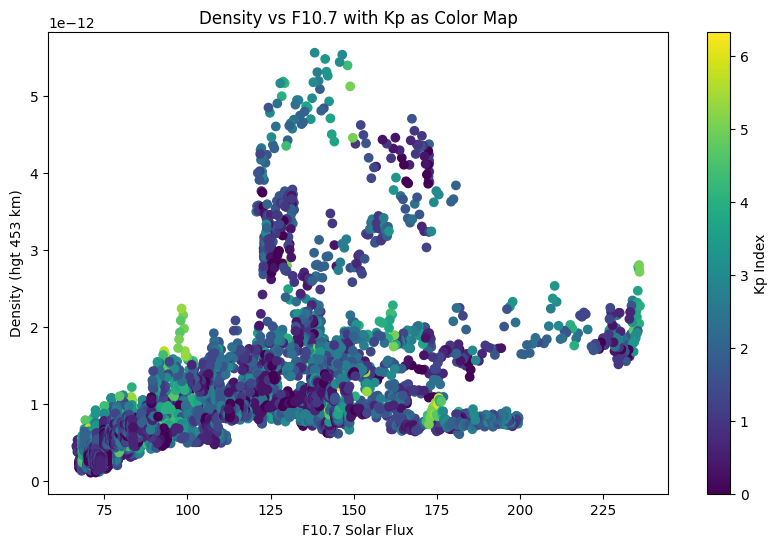

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract the data
# Density from combined_ds
density = combined_ds['density_hgt453km'].values

# F10.7 flux values from xr_f107_all (ensure it is aligned with time)
f107 = xr_f107_all['f10.7'].interp(time=combined_ds['time'], method='linear').values

# Kp index (already interpolated to match combined_ds time)
kp_values = kp_interp.values

# Step 2: Remove NaNs from the dataset (if any)
valid_idx = np.isfinite(density) & np.isfinite(f107) & np.isfinite(kp_values)
density = density[valid_idx]
f107 = f107[valid_idx]
kp_values = kp_values[valid_idx]

# Step 3: Plot using Matplotlib
plt.figure(figsize=(10, 6))
sc = plt.scatter(f107, density, c=kp_values, cmap='viridis', marker='o')

# Add color bar for Kp index
cbar = plt.colorbar(sc)
cbar.set_label('Kp Index')

# Add labels and title
plt.xlabel('F10.7 Solar Flux')
plt.ylabel('Density (hgt 453 km)')
plt.title('Density vs F10.7 with Kp as Color Map')

# Show the plot
plt.show()


In [10]:
print("Number of valid data points:", len(df))
print(df.head())


Number of valid data points: 0
Empty DataFrame
Columns: [F10_7, Density, Kp]
Index: []


In [12]:
# Test fetching for a single date
test_date = time_values.to_pydatetime()[0]
print("Test date:", test_date)
print("F10.7 value:", fetch_f107_for_date(test_date))
print("Kp value:", fetch_kp_for_date(test_date))


Test date: 2014-02-01 00:00:00
F10.7 value: 171.6
Kp value: nan


In [ ]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm  # For progress bars
import sys
# Import necessary functions (adjust the path as needed)
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS
from readGeomagIndices import readKpAp

# Directory where your NetCDF data files are located
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km'

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Loop through each file and extract the data points with a progress bar
for file in tqdm(os.listdir(data_dir), desc="Processing files"):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))

        # Append the dataset to the list
        selected_datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')
density = combined_ds['density_hgt453km']

# Define start and end dates
start_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[-1]))
fs = 24 // 1.5  # This results in 16 samples per day

# Read Kp data with the same 90-minute resolution (16 intervals per day)
kp_ds = readKpAp(start_date, end_date, 'Kp', int(fs)) 
kp_interp = kp_ds.interp(UT=combined_ds['time'], method='linear')

# Read solar flux data
xr_f107_all = readSolarFluxCLS(start_date, end_date, 'adjusted', 'f10.7')
f107 = xr_f107_all['f10.7'].interp(time=combined_ds['time'], method='linear')

# Interpolate Kp index to match the combined dataset time
kp_values = kp_interp.values

# Classify geomagnetic conditions: quiet (Kp <= 3) and disturbed (Kp > 3)
quiet_cond = kp_values <= 3
disturbed_cond = kp_values > 3

# Get solar local time and magnetic latitude values
slt = combined_ds['solar_local_time'].values
latitude = combined_ds['qd_latitude'].values

# Initialize arrays to hold averages for quiet and disturbed conditions
density_quiet = np.full((len(np.unique(latitude)), len(np.unique(slt))), np.nan)
density_disturbed = np.full((len(np.unique(latitude)), len(np.unique(slt))), np.nan)

# Compute averages for quiet and disturbed conditions
for lat_idx, lat in enumerate(np.unique(latitude)):
    for slt_idx, slt_val in enumerate(np.unique(slt)):
        # Mask the data for the current latitude and solar local time
        mask = (latitude == lat) & (slt == slt_val)
        
        # Quiet conditions
        if np.any(mask & quiet_cond):
            density_quiet[lat_idx, slt_idx] = density.where(mask & quiet_cond, drop=True).mean().values
        
        # Disturbed conditions
        if np.any(mask & disturbed_cond):
            density_disturbed[lat_idx, slt_idx] = density.where(mask & disturbed_cond, drop=True).mean().values

# Plot density for quiet conditions
plt.figure(figsize=(10, 6))
plt.contourf(np.unique(slt), np.unique(latitude), density_quiet, cmap='viridis', levels=15)
plt.colorbar(label='Density (quiet conditions)')
plt.title('Thermospheric Density (Quiet Conditions, Kp ≤ 3)')
plt.xlabel('Solar Local Time (hours)')
plt.ylabel('Magnetic Latitude (degrees)')
plt.show()

# Plot density for disturbed conditions
plt.figure(figsize=(10, 6))
plt.contourf(np.unique(slt), np.unique(latitude), density_disturbed, cmap='plasma', levels=15)
plt.colorbar(label='Density (disturbed conditions)')
plt.title('Thermospheric Density (Disturbed Conditions, Kp > 3)')
plt.xlabel('Solar Local Time (hours)')
plt.ylabel('Magnetic Latitude (degrees)')
plt.show()


Processing files: 100%|██████████| 3213/3213 [00:46<00:00, 68.48it/s]


In [1]:
density = combined_ds['density_hgt453km']

# Define start and end dates
start_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[-1]))
fs = 24 // 1.5  # This results in 16 samples per day

# Read Kp data with the same 90-minute resolution (16 intervals per day)
kp_ds = readKpAp(start_date, end_date, 'Kp', int(fs)) 
kp_interp = kp_ds.interp(UT=combined_ds['time'], method='linear')

# Read solar flux data
xr_f107_all = readSolarFluxCLS(start_date, end_date, 'adjusted', 'f10.7')
f107 = xr_f107_all['f10.7'].interp(time=combined_ds['time'], method='linear')

# Interpolate Kp index to match the combined dataset time
kp_values = kp_interp.values

# Classify geomagnetic conditions: quiet (Kp <= 3) and disturbed (Kp > 3)
quiet_cond = kp_values <= 3
disturbed_cond = kp_values > 3

# Get solar local time and magnetic latitude values
slt = combined_ds['solar_local_time'].values
latitude = combined_ds['qd_latitude'].values

# Initialize arrays to hold averages for quiet and disturbed conditions
density_quiet = np.full((len(np.unique(latitude)), len(np.unique(slt))), np.nan)
density_disturbed = np.full((len(np.unique(latitude)), len(np.unique(slt))), np.nan)

# Compute averages for quiet and disturbed conditions
for lat_idx, lat in enumerate(np.unique(latitude)):
    for slt_idx, slt_val in enumerate(np.unique(slt)):
        # Mask the data for the current latitude and solar local time
        mask = (latitude == lat) & (slt == slt_val)
        
        # Quiet conditions
        if np.any(mask & quiet_cond):
            density_quiet[lat_idx, slt_idx] = density.where(mask & quiet_cond, drop=True).mean().values
        
        # Disturbed conditions
        if np.any(mask & disturbed_cond):
            density_disturbed[lat_idx, slt_idx] = density.where(mask & disturbed_cond, drop=True).mean().values

# Plot density for quiet conditions
plt.figure(figsize=(10, 6))
plt.contourf(np.unique(slt), np.unique(latitude), density_quiet, cmap='viridis', levels=15)
plt.colorbar(label='Density (quiet conditions)')
plt.title('Thermospheric Density (Quiet Conditions, Kp ≤ 3)')
plt.xlabel('Solar Local Time (hours)')
plt.ylabel('Magnetic Latitude (degrees)')
plt.show()

# Plot density for disturbed conditions
plt.figure(figsize=(10, 6))
plt.contourf(np.unique(slt), np.unique(latitude), density_disturbed, cmap='plasma', levels=15)
plt.colorbar(label='Density (disturbed conditions)')
plt.title('Thermospheric Density (Disturbed Conditions, Kp > 3)')
plt.xlabel('Solar Local Time (hours)')
plt.ylabel('Magnetic Latitude (degrees)')
plt.show()


NameError: name 'combined_ds' is not defined

In [ ]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm

# Directory where your NetCDF data files are located
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/hgt453km'

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Loop through each file and extract the data points with a progress bar
for file in tqdm(os.listdir(data_dir), desc="Processing files"):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))

        # Append the dataset to the list
        selected_datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')
# Define constants
density_scale_factor = 1e12  # To convert density units to 10^(-12) kg/m³

# Assuming combined_ds is the dataset you have, with Swarm observations and NRLMSIS model data
observed_density = combined_ds['density_hgt453km'].values * density_scale_factor  # Convert units
nrlmsis_model_density = combined_ds['msis_density_hgt453km'].values * density_scale_factor  # Convert units

# Remove any NaN values
valid_idx = np.isfinite(observed_density) & np.isfinite(nrlmsis_model_density)
observed_density = observed_density[valid_idx]
nrlmsis_model_density = nrlmsis_model_density[valid_idx]

# Create a scatter plot comparing the observed density (Swarm) vs. NRLMSIS model density
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(observed_density, nrlmsis_model_density, alpha=0.5, color='b', label='Data Points')

# Plot a 1:1 reference line
max_density = max(np.max(observed_density), np.max(nrlmsis_model_density))
plt.plot([0, max_density], [0, max_density], 'k--', label='1:1 Line')

# Linear regression for the NRLMSIS model vs Swarm observations
slope, intercept, r_value, _, _ = linregress(observed_density, nrlmsis_model_density)
plt.plot(observed_density, intercept + slope * observed_density, 'r-', label=f'Trend line (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Observed Density (Swarm) ($10^{-12}$ kg/m³)')
plt.ylabel('NRLMSIS Model Density ($10^{-12}$ kg/m³)')
plt.title('NRLMSIS Model vs Swarm Observed Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print statistical metrics for NRLMSIS model
bias = np.mean(nrlmsis_model_density - observed_density)
rmse = np.sqrt(np.mean((nrlmsis_model_density - observed_density) ** 2))
print(f"NRLMSIS Model Bias: {bias:.4e}")
print(f"NRLMSIS Model RMSE: {rmse:.4e}")
print(f"NRLMSIS Model R²: {r_value**2:.4f}")


Processing files: 100%|██████████| 3213/3213 [00:49<00:00, 65.53it/s]


In [22]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm  # For progress bars
import sys
# Import necessary functions (adjust the path as needed)
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS
from readGeomagIndices import readKpAp
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/CorrectedGridData'

from scipy.stats import linregress

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Loop through each file and extract the data points with a progress bar
for file in tqdm(os.listdir(data_dir), desc="Processing files"):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))

        # Append the dataset to the list
        selected_datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')

density = combined_ds['density']
# Define start and end dates
start_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[-1]))
fs = 24 // 1.5  # This results in 16 samples per day

# Read Kp data with the same 90-minute resolution (16 intervals per day)
kp_ds = readKpAp(start_date, end_date, 'Kp', int(fs)) 
kp_interp = kp_ds.interp(UT=combined_ds['time'], method='linear')
# Load the necessary Kp data and observations
kp_values = kp_interp.values  # Assuming this holds the interpolated Kp data

# Define low geomagnetic activity (Kp ~ 0.2)
tolerance = 0.2
low_kp_condition = np.isclose(kp_values, 0.2, atol=tolerance)

# Get observed and model densities
observed_density = combined_ds['density'].values
model_density = combined_ds['msis_density'].values

# Filter data where Kp is low
observed_low_kp = observed_density[low_kp_condition]
model_low_kp = model_density[low_kp_condition]
# Remove NaN values and filter data within thresholds
valid_idx = np.isfinite(observed_low_kp) & np.isfinite(model_low_kp)
observed_low_kp = observed_low_kp[valid_idx]
model_low_kp = model_low_kp[valid_idx]

# Apply density thresholds to remove outliers
lower_threshold = 1e-13
upper_threshold = 1e-11
valid_data = (observed_low_kp > lower_threshold) & (observed_low_kp < upper_threshold) & (model_low_kp > lower_threshold) & (model_low_kp < upper_threshold)

observed_low_kp_filtered = observed_low_kp[valid_data]
model_low_kp_filtered = model_low_kp[valid_data]

# Scatter plot with logarithmic scale
plt.figure(figsize=(8, 6))
plt.scatter(observed_low_kp_filtered, model_low_kp_filtered, alpha=0.5, label='Data Points', color='b')

# Logarithmic scale
plt.xscale('log')
plt.yscale('log')

# 1:1 reference line
max_density = max(np.max(observed_low_kp_filtered), np.max(model_low_kp_filtered))
plt.plot([1e-13, max_density], [1e-13, max_density], 'k--', label='1:1 Line')

# Linear regression
slope, intercept, r_value, _, _ = linregress(observed_low_kp_filtered, model_low_kp_filtered)
plt.plot(observed_low_kp_filtered, intercept + slope * observed_low_kp_filtered, 'r-', label=f'Trend line (r={r_value:.2f})')

# Add labels and title
plt.xlabel('Observed Density (kg/m³)')
plt.ylabel('Model Density (kg/m³)')
plt.title('Comparison of Observed vs. NRLMSIS-00 Model Densities (Kp ≈ 0.2)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Statistical metrics
bias = np.mean(model_low_kp_filtered - observed_low_kp_filtered)
rmse = np.sqrt(np.mean((model_low_kp_filtered - observed_low_kp_filtered) ** 2))

# Print metrics including correlation coefficient r
print(f"Bias (Model - Observation): {bias:.4e}")
print(f"RMSE: {rmse:.4e}")
print(f"Correlation coefficient (r): {r_value:.4f}")



Processing files: 100%|██████████| 3213/3213 [04:42<00:00, 11.37it/s]


KeyError: "No variable named 'density_hgt453km'. Variables on the dataset include ['density', 'msis_density', 'time', 'qd_latitude', 'solar_local_time', 'altitude']"

Processing files: 100%|██████████| 3213/3213 [03:48<00:00, 14.06it/s]


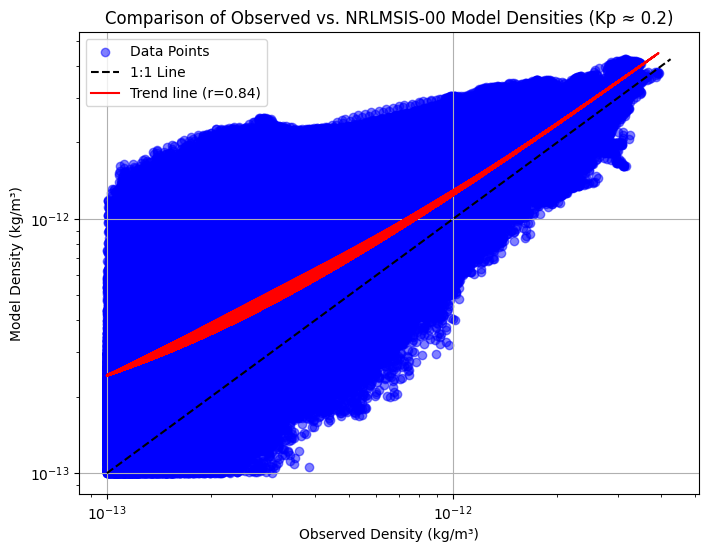

Bias (Model - Observation): 1.7601e-13
RMSE: 3.3754e-13
Correlation coefficient (r): 0.8429


In [3]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm  # For progress bars
import sys
# Import necessary functions (adjust the path as needed)
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS
from readGeomagIndices import readKpAp
data_dir = '/home/jose_ne/Documents/thermosphere/data/SAT_C/CorrectedGridData'

from scipy.stats import linregress

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Loop through each file and extract the data points with a progress bar
for file in tqdm(os.listdir(data_dir), desc="Processing files"):
    if file.endswith('.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))

        # Append the dataset to the list
        selected_datasets.append(ds)

combined_ds = xr.concat(selected_datasets, dim='time')

density = combined_ds['density']
# Define start and end dates
start_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[-1]))
fs = 24 // 1.5  # This results in 16 samples per day

# Read Kp data with the same 90-minute resolution (16 intervals per day)
kp_ds = readKpAp(start_date, end_date, 'Kp', int(fs)) 
kp_interp = kp_ds.interp(UT=combined_ds['time'], method='linear')
# Load the necessary Kp data and observations
kp_values = kp_interp.values  # Assuming this holds the interpolated Kp data

# Define low geomagnetic activity (Kp ~ 0.2)
tolerance = 0.2
low_kp_condition = np.isclose(kp_values, 0.2, atol=tolerance)

# Get observed and model densities
observed_density = combined_ds['density'].values
model_density = combined_ds['msis_density'].values

# Filter data where Kp is low
observed_low_kp = observed_density[low_kp_condition]
model_low_kp = model_density[low_kp_condition]
# Remove NaN values and filter data within thresholds
valid_idx = np.isfinite(observed_low_kp) & np.isfinite(model_low_kp)
observed_low_kp = observed_low_kp[valid_idx]
model_low_kp = model_low_kp[valid_idx]

# Apply density thresholds to remove outliers
lower_threshold = 1e-13
upper_threshold = 1e-11
valid_data = (observed_low_kp > lower_threshold) & (observed_low_kp < upper_threshold) & (model_low_kp > lower_threshold) & (model_low_kp < upper_threshold)

observed_low_kp_filtered = observed_low_kp[valid_data]
model_low_kp_filtered = model_low_kp[valid_data]

# Scatter plot with logarithmic scale
plt.figure(figsize=(8, 6))
plt.scatter(observed_low_kp_filtered, model_low_kp_filtered, alpha=0.5, label='Data Points', color='b')

# Logarithmic scale
plt.xscale('log')
plt.yscale('log')

# 1:1 reference line
max_density = max(np.max(observed_low_kp_filtered), np.max(model_low_kp_filtered))
plt.plot([1e-13, max_density], [1e-13, max_density], 'k--', label='1:1 Line')

# Linear regression
slope, intercept, r_value, _, _ = linregress(observed_low_kp_filtered, model_low_kp_filtered)
plt.plot(observed_low_kp_filtered, intercept + slope * observed_low_kp_filtered, 'r-', label=f'Trend line (r={r_value:.2f})')

# Add labels and title
plt.xlabel('Observed Density (kg/m³)')
plt.ylabel('Model Density (kg/m³)')
plt.title('Comparison of Observed vs. NRLMSIS-00 Model Densities (Kp ≈ 0.2)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Statistical metrics
bias = np.mean(model_low_kp_filtered - observed_low_kp_filtered)
rmse = np.sqrt(np.mean((model_low_kp_filtered - observed_low_kp_filtered) ** 2))

# Print metrics including correlation coefficient r
print(f"Bias (Model - Observation): {bias:.4e}")
print(f"RMSE: {rmse:.4e}")
print(f"Correlation coefficient (r): {r_value:.4f}")



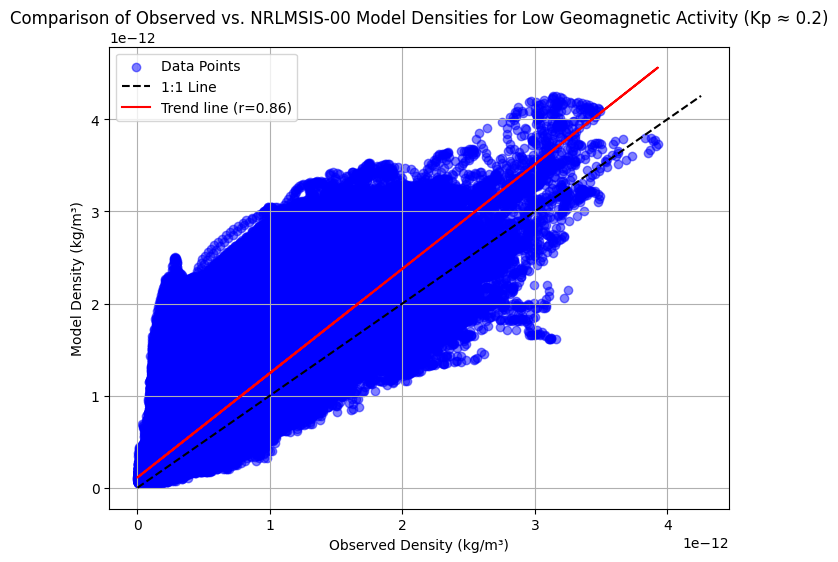

Bias (Model - Observation): 1.5531e-13
RMSE: 3.0274e-13
Correlation coefficient (r): 0.8609


In [4]:
import matplotlib.pyplot as plt

# Get density data
density = combined_ds['density']
model_density = combined_ds['msis_density'] 
start_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[-1]))
fs = 24 // 1.5  # This results in 16 samples per day

# Read Kp data with the same 90-minute resolution (16 intervals per day)
kp_ds = readKpAp(start_date, end_date, 'Kp', int(fs))
kp_interp = kp_ds.interp(UT=combined_ds['time'], method='linear')

# Load the necessary Kp data and observations
kp_values = kp_interp.values  # Assuming this holds the interpolated Kp data

# Define low geomagnetic activity (Kp ~ 3.2)
tolerance = 0.2  # Adjust tolerance as needed
low_kp_condition = kp_values < 0.2 + tolerance

# Filter data where Kp is low
observed_low_kp = density.values[low_kp_condition]
model_low_kp = model_density.values[low_kp_condition]

# Remove any NaN values in the filtered data
valid_idx = np.isfinite(observed_low_kp) & np.isfinite(model_low_kp)
observed_low_kp = observed_low_kp[valid_idx]
model_low_kp = model_low_kp[valid_idx]

# Step 3: Scatter plot of model vs observation
plt.figure(figsize=(8, 6))
plt.scatter(observed_low_kp, model_low_kp, alpha=0.5, label='Data Points', color='blue')

# Plot a 1:1 line for reference
max_density = max(np.max(observed_low_kp), np.max(model_low_kp))
plt.plot([0, max_density], [0, max_density], 'k--', label='1:1 Line')

# Perform linear regression to show trend line
slope, intercept, r_value, _, _ = linregress(observed_low_kp, model_low_kp)
plt.plot(observed_low_kp, intercept + slope * observed_low_kp, 'r-', label=f'Trend line (r={r_value:.2f})')

# Add labels and title
plt.xlabel('Observed Density (kg/m³)')
plt.ylabel('Model Density (kg/m³)')
plt.title('Comparison of Observed vs. NRLMSIS-00 Model Densities for Low Geomagnetic Activity (Kp ≈ 0.2)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Step 4: Print statistical metrics
bias = np.mean(model_low_kp - observed_low_kp)
rmse = np.sqrt(np.mean((model_low_kp - observed_low_kp) ** 2))

# Print correlation coefficient r, not r^2
print(f"Bias (Model - Observation): {bias:.4e}")
print(f"RMSE: {rmse:.4e}")
print(f"Correlation coefficient (r): {r_value:.4f}")

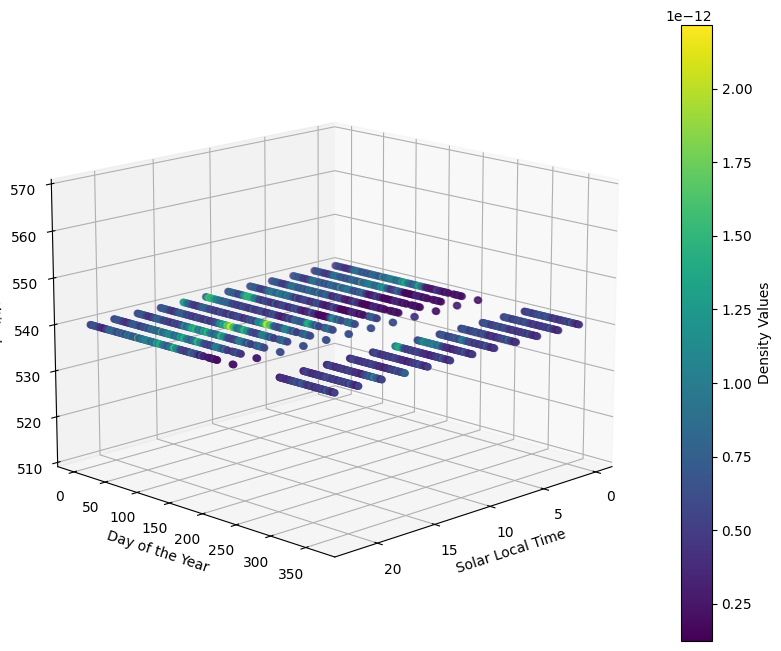

In [19]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

# Directory where your data files are located
data_dir = 'data/SAT_C/CorrectedGridData'

# Define the range of dates for the year 2016
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2015, 12, 31)

# Define grid parameters
altitudes = np.arange(420, 550, 10)  # Magnetic latitude grid points
slts = np.arange(0, 24, 2)  # Solar Local Time grid points
time_intervals = np.arange(0, 366, 1)  # Daily grid points for a year

# Initialize the data cube with zeros
data_cube = np.full((len(altitudes), len(slts), len(time_intervals)), np.nan)  # Initialize with NaN

# Loop through each day of the year 2016 to fill the data cube
current_date = start_date
time_index = 0

while current_date <= end_date:
    date_str = current_date.strftime('%Y-%m-%d')
    file_paths = []

    # Loop through all files in the directory to find the files for the current date
    for file in os.listdir(data_dir):
        if file.endswith('.nc') and date_str in file:
            file_paths.append(os.path.join(data_dir, file))
    
    # If files are found, load and process them
    if file_paths:
        daily_datasets = [xr.open_dataset(file) for file in file_paths]
        combined_daily_ds = xr.concat(daily_datasets, dim='time')

        # Iterate over the Solar Local Time grid points
        for slt_index, slt in enumerate(slts):
            if slt in combined_daily_ds['solar_local_time']:
                density_slt = combined_daily_ds['density'].sel(solar_local_time=slt)

                # Assign values to the corresponding Altitude and time indices in the data cube
                for alt_index, alt in enumerate(altitudes):
                    if alt in density_slt['altitude']:
                        data_value = density_slt.sel(altitude=alt).mean().values
                        data_cube[alt_index, slt_index, time_index] = data_value

    # Move to the next day and increase the time index
    current_date += datetime.timedelta(days=1)
    time_index += 1

# Step 3: Visualize the data cube
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate grid points for 3D plot
X, Z, Y = np.meshgrid(slts, altitudes, time_intervals)

# Flatten the arrays to plot the 3D scatter
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
values = data_cube.flatten()

# Filter out the NaN values from the data
valid_mask = ~np.isnan(values)  # Create a mask for valid values (i.e., not NaN)

X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
Z_valid = Z[valid_mask]
values_valid = values[valid_mask]

# Plot the 3D scatter with valid values only
sc = ax.scatter(X_valid, Y_valid, Z_valid, c=values_valid, cmap='viridis')

# Add labels
ax.set_xlabel('Solar Local Time')
ax.set_ylabel('Day of the Year')
ax.set_zlabel('Altitude')

# Set the viewing angle
ax.view_init(elev=15, azim=45)  # Adjust this angle for a better view

# Show color bar
plt.colorbar(sc, label='Density Values')

# Show plot
plt.show()

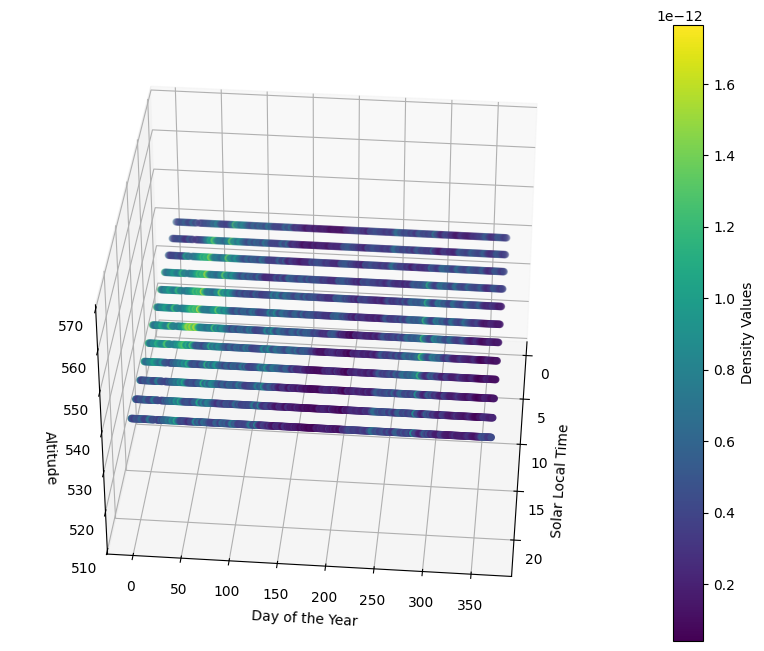

In [6]:
# Step 3: Visualize the data cube
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate grid points for 3D plot
X, Z, Y = np.meshgrid(slts, altitudes, time_intervals)

# Flatten the arrays to plot the 3D scatter
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
values = data_cube.flatten()

# Filter out the NaN values from the data
valid_mask = ~np.isnan(values)  # Create a mask for valid values (i.e., not NaN)

X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
Z_valid = Z[valid_mask]
values_valid = values[valid_mask]

# Plot the 3D scatter with valid values only
sc = ax.scatter(X_valid, Y_valid, Z_valid, c=values_valid, cmap='viridis')

# Add labels
ax.set_xlabel('Solar Local Time')
ax.set_ylabel('Day of the Year')
ax.set_zlabel('Altitude')

# Set the viewing angle
ax.view_init(elev=35, azim=5)  # Adjust this angle for a better view

# Show color bar
plt.colorbar(sc, label='Density Values')

# Show plot
plt.show()


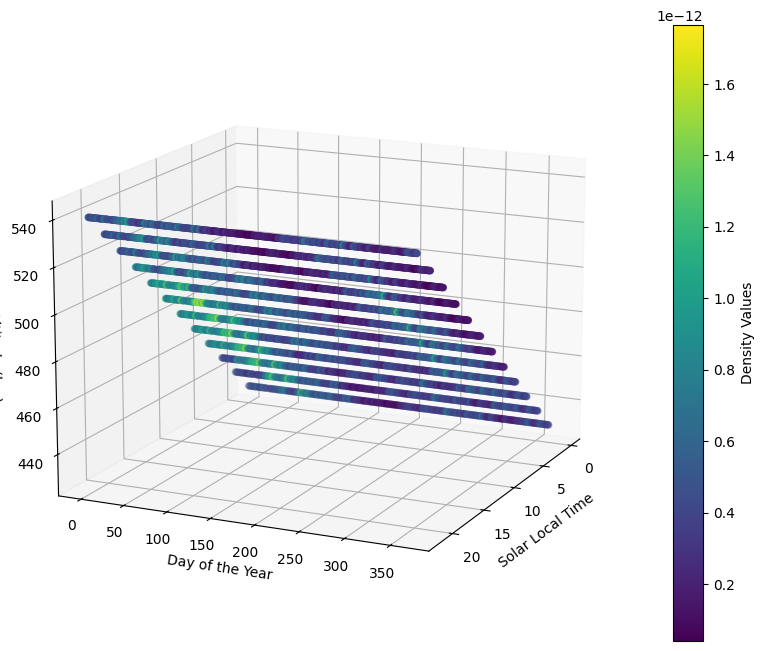

In [18]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

# Directory where your data files are located
data_dir = 'data/SAT_C/CorrectedGridData'

# Define the range of dates for the year 2016
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

# Define grid parameters for latitude, time, and altitude
slts = np.arange(0, 24, 2)  # Magnetic latitude grid points
altitudes = np.arange(420, 550, 10)  # Altitude levels (for example: 100 km to 500 km in 50 km increments)
time_intervals = np.arange(0, 366, 1)  # Daily grid points for a year

# Initialize the data cube with NaN
data_cube = np.full((len(slts), len(altitudes), len(time_intervals)), np.nan)

# Loop through each day of the year 2016 to fill the data cube
current_date = start_date
time_index = 0

while current_date <= end_date:
    date_str = current_date.strftime('%Y-%m-%d')
    file_paths = []

    # Loop through all files in the directory to find the files for the current date
    for file in os.listdir(data_dir):
        if file.endswith('.nc') and date_str in file:
            file_paths.append(os.path.join(data_dir, file))
    
    # If files are found, load and process them
    if file_paths:
        daily_datasets = [xr.open_dataset(file) for file in file_paths]
        combined_daily_ds = xr.concat(daily_datasets, dim='time')

        # Iterate over the altitude grid points
        for alt_index, altitude in enumerate(altitudes):
            if 'altitude' in combined_daily_ds and altitude in combined_daily_ds['altitude']:
                # Select density at the specific altitude level
                density_alt = combined_daily_ds['density'].sel(altitude=altitude)

                # Assign values to the corresponding latitude and time indices in the data cube
                for slt_index, slt in enumerate(slts):
                    if slt in density_alt['solar_local_time']:
                        data_value = density_alt.sel(solar_local_time=slt).mean().values
                        data_cube[slt_index, alt_index, time_index] = data_value

    # Move to the next day and increase the time index
    current_date += datetime.timedelta(days=1)
    time_index += 1

# Step 3: Visualize the data cube with altitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate grid points for 3D plot
X, Z, Y = np.meshgrid(slts,altitudes, time_intervals)

# Flatten the arrays to plot the 3D scatter
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
values = data_cube.flatten()

# Filter out the NaN values from the data
valid_mask = ~np.isnan(values)  # Create a mask for valid values (i.e., not NaN)

X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
Z_valid = Z[valid_mask]
values_valid = values[valid_mask]

# Plot the 3D scatter with valid values only
sc = ax.scatter(X_valid, Y_valid, Z_valid, c=values_valid, cmap='viridis')

# Add labels
ax.set_xlabel('Solar Local Time ')
ax.set_ylabel('Day of the Year')
ax.set_zlabel('Altitude (km)')

# Set the viewing angle
ax.view_init(elev=15, azim=25)  # Adjust this angle for a better view

# Show color bar
plt.colorbar(sc, label='Density Values')

# Show plot
plt.show()


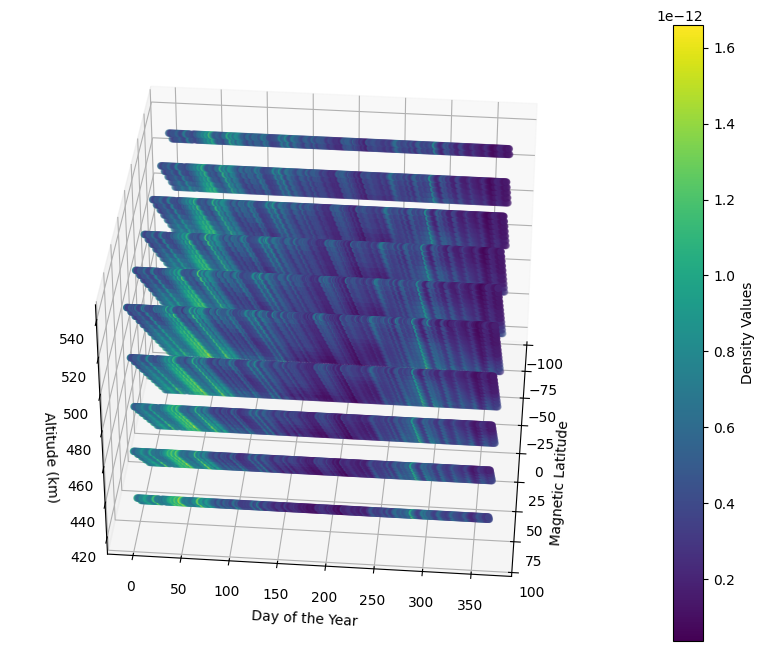

In [13]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

# Directory where your data files are located
data_dir = 'data/SAT_C/CorrectedGridData'

# Define the range of dates for the year 2016
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

# Define grid parameters for latitude, time, and altitude
latitudes = np.arange(-90, 90.1, 2.5)  # Magnetic latitude grid points
altitudes = np.arange(420, 550, 10)  # Altitude levels (for example: 100 km to 500 km in 50 km increments)
time_intervals = np.arange(0, 366, 1)  # Daily grid points for a year

# Initialize the data cube with NaN
data_cube = np.full((len(latitudes), len(altitudes), len(time_intervals)), np.nan)

# Loop through each day of the year 2016 to fill the data cube
current_date = start_date
time_index = 0

while current_date <= end_date:
    date_str = current_date.strftime('%Y-%m-%d')
    file_paths = []

    # Loop through all files in the directory to find the files for the current date
    for file in os.listdir(data_dir):
        if file.endswith('.nc') and date_str in file:
            file_paths.append(os.path.join(data_dir, file))
    
    # If files are found, load and process them
    if file_paths:
        daily_datasets = [xr.open_dataset(file) for file in file_paths]
        combined_daily_ds = xr.concat(daily_datasets, dim='time')

        # Iterate over the altitude grid points
        for alt_index, altitude in enumerate(altitudes):
            if 'altitude' in combined_daily_ds and altitude in combined_daily_ds['altitude']:
                # Select density at the specific altitude level
                density_alt = combined_daily_ds['density'].sel(altitude=altitude)

                # Assign values to the corresponding latitude and time indices in the data cube
                for lat_index, lat in enumerate(latitudes):
                    if lat in density_alt['qd_latitude']:
                        data_value = density_alt.sel(qd_latitude=lat).mean().values
                        data_cube[lat_index, alt_index, time_index] = data_value

    # Move to the next day and increase the time index
    current_date += datetime.timedelta(days=1)
    time_index += 1

# Step 3: Visualize the data cube with altitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate grid points for 3D plot
X, Z, Y = np.meshgrid(latitudes,altitudes, time_intervals)

# Flatten the arrays to plot the 3D scatter
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
values = data_cube.flatten()

# Filter out the NaN values from the data
valid_mask = ~np.isnan(values)  # Create a mask for valid values (i.e., not NaN)

X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
Z_valid = Z[valid_mask]
values_valid = values[valid_mask]

# Plot the 3D scatter with valid values only
sc = ax.scatter(X_valid, Y_valid, Z_valid, c=values_valid, cmap='viridis')

# Add labels
ax.set_xlabel('Magnetic Latitude ')
ax.set_ylabel('Day of the Year')
ax.set_zlabel('Altitude (km)')

# Set the viewing angle
ax.view_init(elev=35, azim=5)  # Adjust this angle for a better view

# Show color bar
plt.colorbar(sc, label='Density Values')

# Show plot
plt.show()


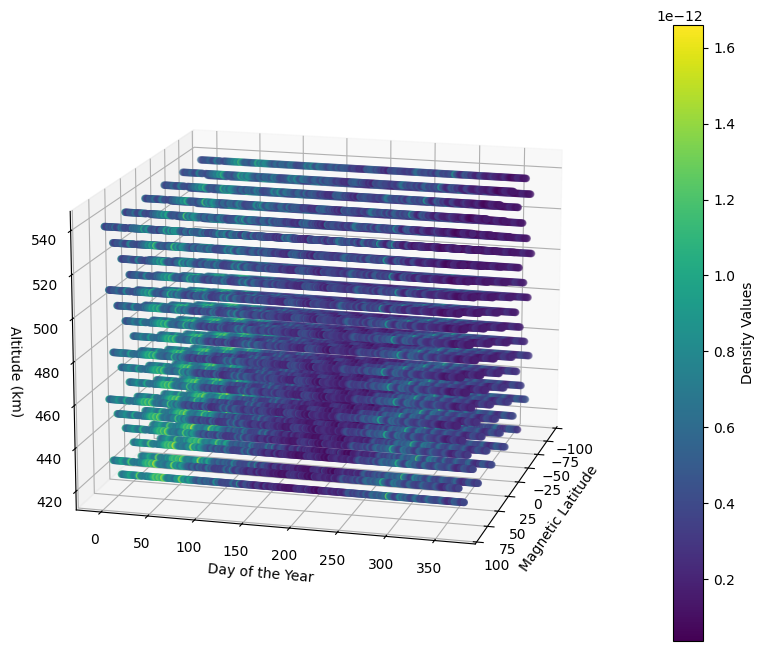

In [22]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

# Directory where your data files are located
data_dir = 'data/SAT_C/CorrectedGridData'

# Define the range of dates for the year 2016
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

# Define grid parameters for latitude, time, and altitude
latitudes = np.arange(-90, 90.1, 2.5)  # Magnetic latitude grid points
altitudes = np.arange(420, 550, 10)  # Altitude levels (for example: 100 km to 500 km in 50 km increments)
time_intervals = np.arange(0, 366, 1)  # Daily grid points for a year

# Initialize the data cube with NaN
data_cube = np.full((len(latitudes), len(altitudes), len(time_intervals)), np.nan)

# Loop through each day of the year 2016 to fill the data cube
current_date = start_date
time_index = 0

while current_date <= end_date:
    date_str = current_date.strftime('%Y-%m-%d')
    file_paths = []

    # Loop through all files in the directory to find the files for the current date
    for file in os.listdir(data_dir):
        if file.endswith('.nc') and date_str in file:
            file_paths.append(os.path.join(data_dir, file))
    
    # If files are found, load and process them
    if file_paths:
        daily_datasets = [xr.open_dataset(file) for file in file_paths]
        combined_daily_ds = xr.concat(daily_datasets, dim='time')

        # Iterate over the altitude grid points
        for alt_index, altitude in enumerate(altitudes):
            if 'altitude' in combined_daily_ds and altitude in combined_daily_ds['altitude']:
                # Select density at the specific altitude level
                density_alt = combined_daily_ds['density'].sel(altitude=altitude)

                # Assign values to the corresponding latitude and time indices in the data cube
                for lat_index, lat in enumerate(latitudes):
                    if lat in density_alt['qd_latitude']:
                        data_value = density_alt.sel(qd_latitude=lat).mean().values
                        data_cube[lat_index, alt_index, time_index] = data_value

    # Move to the next day and increase the time index
    current_date += datetime.timedelta(days=1)
    time_index += 1


# Step 3: Visualize the data cube with altitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate grid points for 3D plot
X, Z, Y = np.meshgrid(latitudes,altitudes, time_intervals)

# Flatten the arrays to plot the 3D scatter
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
values = data_cube.flatten()

# Filter out the NaN values from the data
valid_mask = ~np.isnan(values)  # Create a mask for valid values (i.e., not NaN)

X_valid = X[valid_mask]
Y_valid = Y[valid_mask]
Z_valid = Z[valid_mask]
values_valid = values[valid_mask]

# Plot the 3D scatter with valid values only
sc = ax.scatter(X_valid, Y_valid, Z_valid, c=values_valid, cmap='viridis')

# Add labels
ax.set_xlabel('Magnetic Latitude ')
ax.set_ylabel('Day of the Year')
ax.set_zlabel('Altitude (km)')

# Set the viewing angle
ax.view_init(elev=15, azim=15)  # Adjust this angle for a better view

# Show color bar
plt.colorbar(sc, label='Density Values')

# Show plot
plt.show()

In [ ]:
import datetime
import xarray as xr
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
sys.path.append('/home/jose_ne/Documents/swe_data_processing_routines')

# Step 2: Import the functions you need
from readESASwarm import readDNS
from processESASwarm import calculateNormalisedDNS


# Set the start and end dates
start_date = datetime.datetime(2014, 2, 1)
end_date = datetime.datetime(2023, 12, 31)

# Set satellite and instrument
satellite = 'SAT_C'
instrument = 'ACC'



# Read the Swarm data
ds = readDNS(start_date, end_date, satellite, instrument,download_missing_data=False)

# Normalize the density data

# Load the normalized data
ds_norm = calculateNormalisedDNS(start_date, end_date, satellite, instrument, alt_norm_km=453)

# Create contour plots
variables = ['msis_density_orbit', 'msis_density_hgt453km', 'density_hgt453km', 'density']
for var in variables:
    plt.figure()
    ds_norm[var].plot.contourf(x='time', y='latitude')
    plt.xlabel('Time')
    plt.ylabel('Latitude')
    plt.title(f'Contour plot of {var}')
    plt.show()

readESASwarm.readDNS read  2014-02-01 00:00:00
readESASwarm.readDNS read  2014-02-02 00:00:00
readESASwarm.readDNS read  2014-02-03 00:00:00
readESASwarm.readDNS read  2014-02-04 00:00:00
readESASwarm.readDNS read  2014-02-05 00:00:00
readESASwarm.readDNS read  2014-02-06 00:00:00
readESASwarm.readDNS read  2014-02-07 00:00:00
readESASwarm.readDNS read  2014-02-08 00:00:00
readESASwarm.readDNS read  2014-02-09 00:00:00
readESASwarm.readDNS read  2014-02-10 00:00:00
readESASwarm.readDNS read  2014-02-11 00:00:00
readESASwarm.readDNS read  2014-02-12 00:00:00
readESASwarm.readDNS read  2014-02-13 00:00:00
readESASwarm.readDNS read  2014-02-14 00:00:00
readESASwarm.readDNS read  2014-02-15 00:00:00
readESASwarm.readDNS read  2014-02-16 00:00:00
readESASwarm.readDNS read  2014-02-17 00:00:00
readESASwarm.readDNS read  2014-02-18 00:00:00
readESASwarm.readDNS read  2014-02-19 00:00:00
readESASwarm.readDNS read  2014-02-20 00:00:00
readESASwarm.readDNS read  2014-02-21 00:00:00
readESASwarm.

In [ ]:
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sys

# Paths to the two directories with your function files
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
sys.path.append('/home/jose_ne/Documents/swe_data_processing_routines')

# Import the readDNS and calculateNormalisedDNS functions
from readESASwarm import readDNS
from processESASwarm import calculateNormalisedDNS

# Define parameters
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2023, 12, 31)
satellite = 'SAT_C'  # or another satellite as needed
instrument = 'ACC'  # accelerometer data
normalization_altitude = 453  # altitude to normalize to

# Read and normalize data over the entire period
all_data = []
for year in range(2014, 2024):  # Loop over each year
    # Define start and end of the year
    dstart = datetime.datetime(year, 1, 1)
    dend = datetime.datetime(year, 12, 31)
    
    # Step 1: Read DNS data
    dns_data = readDNS(dstart, dend, satellite, instrument,download_missing_data=False)
    
    # Step 2: Normalize the DNS data
    normalized_data = calculateNormalisedDNS(dstart, dend,satellite, instrument, normalization_altitude)
    
    # Append normalized data to list
    all_data.append(normalized_data)

# Combine all yearly datasets into one large xarray dataset
combined_data = xr.concat(all_data, dim='time')

# Variables to plot and the normalization altitude
variables_to_plot = ['msis_density_orbit', 'msis_density_hgt453km', 'density_hgt453km', 'density']

# Step 3: Plot contour plots for each variable
for var in variables_to_plot:
    if var in combined_data:
        plt.figure(figsize=(12, 6))
        # Plot contour with latitude as Y-axis and time as X-axis
        combined_data[var].plot.contourf(x='time', y='latitude', levels=50, cmap='viridis')
        plt.title(f"Contour plot of {var} over time and latitude")
        plt.xlabel('Time')
        plt.ylabel('Latitude')
        plt.colorbar(label=var)
        plt.show()
    else:
        print(f"Variable '{var}' not found in the dataset.")


readESASwarm.readDNS read  2014-01-01 00:00:00
readESASwarm.readDNS missing file  2014-01-01 00:00:00
readESASwarm.readDNS read  2014-01-02 00:00:00
readESASwarm.readDNS missing file  2014-01-02 00:00:00
readESASwarm.readDNS read  2014-01-03 00:00:00
readESASwarm.readDNS missing file  2014-01-03 00:00:00
readESASwarm.readDNS read  2014-01-04 00:00:00
readESASwarm.readDNS missing file  2014-01-04 00:00:00
readESASwarm.readDNS read  2014-01-05 00:00:00
readESASwarm.readDNS missing file  2014-01-05 00:00:00
readESASwarm.readDNS read  2014-01-06 00:00:00
readESASwarm.readDNS missing file  2014-01-06 00:00:00
readESASwarm.readDNS read  2014-01-07 00:00:00
readESASwarm.readDNS missing file  2014-01-07 00:00:00
readESASwarm.readDNS read  2014-01-08 00:00:00
readESASwarm.readDNS missing file  2014-01-08 00:00:00
readESASwarm.readDNS read  2014-01-09 00:00:00
readESASwarm.readDNS missing file  2014-01-09 00:00:00
readESASwarm.readDNS read  2014-01-10 00:00:00
readESASwarm.readDNS missing file  

In [ ]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm  # For progress bars
import sys
from scipy.stats import linregress

# Import necessary functions (adjust the path as needed)
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS
from readGeomagIndices import readKpAp

# Set data directory and other parameters
data_dir = '/mnt/sofs01/workcache/SO-Shared/SWARM-DISS/DNS/ACC/SAT_C/normalt_453km'
desired_slt = 12  # Solar Local Time (in hours)
desired_lat = 40  # Latitude in degrees

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Load each file and add data points with a progress bar
for file in tqdm(os.listdir(data_dir), desc="Processing files"):
    if file.endswith('fs16.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))
        
        # Filter by Solar Local Time around 12 PM and Latitude around 40° N
        slt_near_desired = np.abs(ds['solar_local_time'] - desired_slt) < 0.5  # 30 min tolerance
        lat_near_desired = np.abs(ds['qd_latitude'] - desired_lat) < 2.5       # 2.5° tolerance
        
        # Select data meeting both conditions
        filtered_ds = ds.where(slt_near_desired & lat_near_desired, drop=True)
        
        # Append the filtered dataset to the list if it's non-empty
        if filtered_ds.time.size > 0:
            selected_datasets.append(filtered_ds)

# Concatenate all selected datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')

# Get density data (filtered by SLT and latitude)
density = combined_ds['density_hgt453km']
model_density = combined_ds['msis_density_hgt453km']
start_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[-1]))
fs = 24 // 1.5  # Results in 16 samples per day

# Read Kp data with the same 90-minute resolution (16 intervals per day)
kp_ds = readKpAp(start_date, end_date, 'Kp', int(fs))
kp_interp = kp_ds.interp(UT=combined_ds['time'], method='linear')

# Extract the Kp values for each time step
kp_values = kp_interp.values

# Check the dimensions of density and Kp values
print(f"Shape of density: {density.shape}")
print(f"Shape of model_density: {model_density.shape}")
print(f"Shape of Kp values: {kp_values.shape}")

# Filter out NaN values across all arrays
valid_idx = np.isfinite(density) & np.isfinite(model_density) & np.isfinite(kp_values)

# Filter the data to remove NaN values
observed_density = density.values[valid_idx]
model_density_values = model_density.values[valid_idx]
kp_values_filtered = kp_values[valid_idx]

# Scatter plot of model vs observation with Kp values as color bar
plt.figure(figsize=(8, 6))
sc = plt.scatter(observed_density, model_density_values, c=kp_values_filtered, cmap='viridis', alpha=0.5, label='Data Points')
plt.colorbar(sc, label='Kp Index')  # Add color bar for Kp values

# Plot a 1:1 line for reference
max_density = max(np.max(observed_density), np.max(model_density_values))
plt.plot([0, max_density], [0, max_density], 'k--', label='1:1 Line')

# Perform linear regression to show trend line
slope, intercept, r_value, _, _ = linregress(observed_density, model_density_values)
plt.plot(observed_density, intercept + slope * observed_density, 'r-', label=f'Trend line (r={r_value:.2f})')

# Add labels and title
plt.xlabel('Observed Density (kg/m³)')
plt.ylabel('Model Density (kg/m³)')
plt.title('Observed vs. Model Densities with Kp Values as Color Bar')
plt.legend()
plt.grid(True)
plt.show()

# Calculate statistical metrics
bias = np.mean(model_density_values - observed_density)
rmse = np.sqrt(np.mean((model_density_values - observed_density) ** 2))

# Print bias, RMSE, and correlation coefficient
print(f"Bias (Model - Observation): {bias:.4e}")
print(f"RMSE: {rmse:.4e}")
print(f"Correlation coefficient (r): {r_value:.4f}")

Processing files: 100%|██████████| 6753/6753 [01:07<00:00, 99.46it/s]   


Shape of density: (54016, 1, 1)
Shape of model_density: (54016, 1, 1)
Shape of Kp values: (54016,)


In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm  # For progress bars
import sys
# Import necessary functions (adjust the path as needed)
sys.path.append('/home/jose_ne/Documents/swe_data_reading_routines')
from readSolarFlux import readSolarFluxCLS
from readGeomagIndices import readKpAp
data_dir = '/mnt/sofs01/workcache/SO-Shared/SWARM-DISS/DNS/ACC/SAT_C/normalt_453km'
from scipy.stats import linregress

# Define data directory and load necessary parameters
data_dir = '/mnt/sofs01/workcache/SO-Shared/SWARM-DISS/DNS/ACC/SAT_C/normalt_453km'

# Initialize an empty list to store datasets for each day
selected_datasets = []

# Load each NetCDF file and extract data points
for file in tqdm(os.listdir(data_dir), desc="Processing files"):
    if file.endswith('fs16.nc'):
        # Load the dataset
        ds = xr.open_dataset(os.path.join(data_dir, file))
        # Append the dataset to the list
        selected_datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_ds = xr.concat(selected_datasets, dim='time')

# Get density data from combined dataset
density = combined_ds['density_hgt453km']
model_density = combined_ds['msis_density_hgt453km']
start_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[0]))
end_date = datetime.datetime.fromisoformat(str(combined_ds.time.values[-1]))

# Read Kp data
fs = 24 // 1.5  # Sampling frequency: 16 samples per day (90-minute intervals)
kp_ds = readKpAp(start_date, end_date, 'Kp', int(fs))
kp_interp = kp_ds.interp(UT=combined_ds['time'], method='linear')
kp_values = kp_interp.values  # Interpolated Kp data
tolerance = 0.2

# Convert kp_values to an xarray DataArray with the same dimensions as density
kp_condition = xr.DataArray(
    kp_values < 0.2 + tolerance,
    dims=["time"],
    coords={"time": combined_ds["time"]}
)

# Filter density data where Kp is low
density_low_kp = density.where(kp_condition, drop=True)
model_density_low_kp = model_density.where(kp_condition, drop=True)

# Get grid coordinates
qd_latitude = combined_ds['qd_latitude'].values
solar_local_time = combined_ds['solar_local_time'].values

# Initialize arrays for Bias, RMSE, and Correlation for each grid point
bias_grid = np.empty((len(qd_latitude), len(solar_local_time)))
rmse_grid = np.empty((len(qd_latitude), len(solar_local_time)))
correlation_grid = np.empty((len(qd_latitude), len(solar_local_time)))

# Loop through each grid point in latitude and solar local time
for i, lat in enumerate(qd_latitude):
    for j, slt in enumerate(solar_local_time):
        # Get observed and model densities for the current grid point
        observed_values = density_low_kp[:, i, j].values
        model_values = model_density_low_kp[:, i, j].values

        # Remove NaN values
        valid_idx = np.isfinite(observed_values) & np.isfinite(model_values)
        observed_values = observed_values[valid_idx]
        model_values = model_values[valid_idx]

        # Compute Bias, RMSE, and Correlation if there are valid data points
        if len(observed_values) > 0:
            bias_grid[i, j] = np.mean(model_values - observed_values)
            rmse_grid[i, j] = np.sqrt(np.mean((model_values - observed_values) ** 2))
            slope, intercept, r_value, _, _ = linregress(observed_values, model_values)
            correlation_grid[i, j] = r_value  # Store correlation coefficient (r)
        else:
            bias_grid[i, j] = np.nan
            rmse_grid[i, j] = np.nan
            correlation_grid[i, j] = np.nan

# Scale bias values for visualization purposes
scaled_bias_grid = bias_grid * 1e12  # Scale to the order of 10^0

# Plotting Bias, RMSE, and Correlation maps with scaled bias
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot Bias map with scaled data
c1 = axes[0].pcolormesh(solar_local_time, qd_latitude, scaled_bias_grid, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(c1, ax=axes[0], label='Bias (Model - Observation) x 1e-12 (kg/m³)')
axes[0].set_title('Bias')
axes[0].set_xlabel('Solar Local Time (hours)')
axes[0].set_ylabel('Magnetic Latitude (°)')

# Plot RMSE map
c2 = axes[1].pcolormesh(solar_local_time, qd_latitude, rmse_grid, shading='auto', cmap='viridis')
fig.colorbar(c2, ax=axes[1], label='RMSE (kg/m³)')
axes[1].set_title('RMSE')
axes[1].set_xlabel('Solar Local Time (hours)')
axes[1].set_ylabel('Magnetic Latitude (°)')

# Plot Correlation map
c3 = axes[2].pcolormesh(solar_local_time, qd_latitude, correlation_grid, shading='auto', cmap='coolwarm')
fig.colorbar(c3, ax=axes[2], label='Correlation (r)')
axes[2].set_title('Correlation')
axes[2].set_xlabel('Solar Local Time (hours)')
axes[2].set_ylabel('Magnetic Latitude (°)')

# Show the plots
plt.show()


Processing files: 100%|██████████| 6753/6753 [00:52<00:00, 127.93it/s]  


NameError: name 'tolerance' is not defined

/home/jose_ne/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:10919: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/jose_ne/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:10933: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/jose_ne/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:10936: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


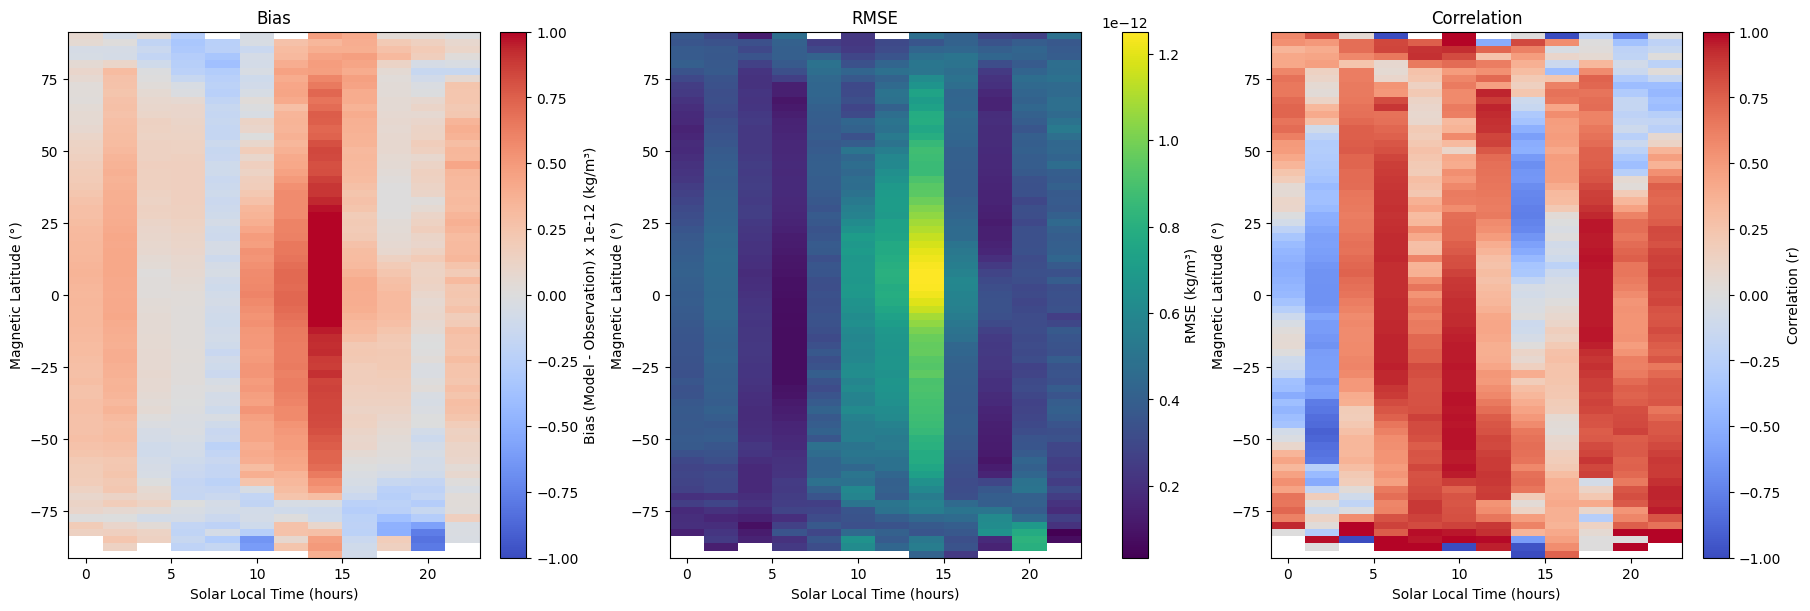

In [3]:
tolerance = 0.2

# Convert kp_values to an xarray DataArray with the same dimensions as density
kp_condition = xr.DataArray(
    kp_values < 0.2 + tolerance,
    dims=["time"],
    coords={"time": combined_ds["time"]}
)

# Filter density data where Kp is low
density_low_kp = density.where(kp_condition, drop=True)
model_density_low_kp = model_density.where(kp_condition, drop=True)

# Get grid coordinates
qd_latitude = combined_ds['qd_latitude'].values
solar_local_time = combined_ds['solar_local_time'].values

# Initialize arrays for Bias, RMSE, and Correlation for each grid point
bias_grid = np.empty((len(qd_latitude), len(solar_local_time)))
rmse_grid = np.empty((len(qd_latitude), len(solar_local_time)))
correlation_grid = np.empty((len(qd_latitude), len(solar_local_time)))

# Loop through each grid point in latitude and solar local time
for i, lat in enumerate(qd_latitude):
    for j, slt in enumerate(solar_local_time):
        # Get observed and model densities for the current grid point
        observed_values = density_low_kp[:, i, j].values
        model_values = model_density_low_kp[:, i, j].values

        # Remove NaN values
        valid_idx = np.isfinite(observed_values) & np.isfinite(model_values)
        observed_values = observed_values[valid_idx]
        model_values = model_values[valid_idx]

        # Compute Bias, RMSE, and Correlation if there are valid data points
        if len(observed_values) > 0:
            bias_grid[i, j] = np.mean(model_values - observed_values)
            rmse_grid[i, j] = np.sqrt(np.mean((model_values - observed_values) ** 2))
            slope, intercept, r_value, _, _ = linregress(observed_values, model_values)
            correlation_grid[i, j] = r_value  # Store correlation coefficient (r)
        else:
            bias_grid[i, j] = np.nan
            rmse_grid[i, j] = np.nan
            correlation_grid[i, j] = np.nan

# Scale bias values for visualization purposes
scaled_bias_grid = bias_grid * 1e12  # Scale to the order of 10^0

# Plotting Bias, RMSE, and Correlation maps with scaled bias
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot Bias map with scaled data
c1 = axes[0].pcolormesh(solar_local_time, qd_latitude, scaled_bias_grid, shading='auto', cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(c1, ax=axes[0], label='Bias (Model - Observation) x 1e-12 (kg/m³)')
axes[0].set_title('Bias')
axes[0].set_xlabel('Solar Local Time (hours)')
axes[0].set_ylabel('Magnetic Latitude (°)')

# Plot RMSE map
c2 = axes[1].pcolormesh(solar_local_time, qd_latitude, rmse_grid, shading='auto', cmap='viridis')
fig.colorbar(c2, ax=axes[1], label='RMSE (kg/m³)')
axes[1].set_title('RMSE')
axes[1].set_xlabel('Solar Local Time (hours)')
axes[1].set_ylabel('Magnetic Latitude (°)')

# Plot Correlation map
c3 = axes[2].pcolormesh(solar_local_time, qd_latitude, correlation_grid, shading='auto', cmap='coolwarm')
fig.colorbar(c3, ax=axes[2], label='Correlation (r)')
axes[2].set_title('Correlation')
axes[2].set_xlabel('Solar Local Time (hours)')
axes[2].set_ylabel('Magnetic Latitude (°)')

# Show the plots
plt.show()
